In [3]:
childDistVec1=[]
scoreVec1=[]
scoreVecVec=[]
childDistVecVec=[]

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import gene_functions as gf
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout
from ipywidgets import interact, IntSlider
qVec=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
ECrandDict=dict()
ECevoDict=dict()
ICSrandDict=dict()
ICSevoDict=dict()
S3randDict=dict()
S3evoDict=dict()
qVec=[0.2]
seedSize=20
for qCon in qVec:
    for qMod in qVec:
        for steps in range(0,15):
            print(qCon,qMod,steps)
            ECrandDict[(qCon,qMod,steps)]=[]
            ECevoDict[(qCon,qMod,steps)]=[]
            ICSrandDict[(qCon,qMod,steps)]=[]
            ICSevoDict[(qCon,qMod,steps)]=[]
            S3randDict[(qCon,qMod,steps)]=[]
            S3evoDict[(qCon,qMod,steps)]=[]
            n=steps
            for m in range(0,100):
                    print(m)
                    G1_god=gf.gnp_random_graph(seedSize,p=0.4,directed=True)
                    G1=gf.dmc_single_lineage(G1_god,n,qCon,qMod,iteration = 0)
                    G2_god=gf.gnp_random_graph(seedSize,p=0.4,directed=True)
                    
                    G2=gf.dmc_single_lineage(G2_god,n,qCon,qMod,iteration = 0)
                    
                    
                    
                    G1=gf.label_conserver(G1)
                    G2=gf.label_conserver(G2)

                    G1_orig=copy.deepcopy(G1)
                    G2_orig=copy.deepcopy(G2)
                
                    G1=nx.convert_node_labels_to_integers(G1_orig)
                    G2=nx.convert_node_labels_to_integers(G2_orig)
                    alignVec,mapped=gf.NF_many_to_one_alt(G1,G2,32,0.8)
                    mapping = dict(alignVec)

                    G1_mapped=nx.induced_subgraph(G1,list(mapped))
                    G1_mapped=nx.relabel_nodes(G1_mapped,mapping)

                    sourceEdges= len(list(G1_mapped.edges()))
                    
                    conservedEdge=0
                    for x in range(0,max(len(list(G1_mapped.nodes)),len(list(G2.nodes)))):
                        for y in range(0,max(len(list(G1_mapped.nodes)),len(list(G2.nodes)))):
                            if (x,y) in list(G1_mapped.edges) and (x,y) in list(G2.edges):
                                conservedEdge=conservedEdge+1
                    EC=conservedEdge/sourceEdges
                    
                    G2_ind = nx.induced_subgraph(G2,list(G1_mapped.nodes))
                    inducedEdges=len(list(G2_ind.edges))
                    ICS=conservedEdge/inducedEdges
                    S3=conservedEdge/(sourceEdges+inducedEdges-conservedEdge)
                    ECrandDict[(qCon,qMod,steps)].append(EC)
                    ICSrandDict[(qCon,qMod,steps)].append(ICS)
                    S3randDict[(qCon,qMod,steps)].append(S3)
                

                    #-----------------------------------------------------------------------------------------------------
                    G1_god=gf.gnp_random_graph(seedSize,p=0.4,directed=True)
                    G1=gf.dmc_single_lineage(G1_god,n,qCon,qMod,iteration = 0)
                    
                    G2_god=G1_god
                    G2=gf.dmc_single_lineage(G2_god,n,qCon,qMod,iteration = 0)
                    
                    
                    G1=gf.label_conserver(G1)
                    G2=gf.label_conserver(G2)

                    
                    G1_orig=copy.deepcopy(G1)
                    G2_orig=copy.deepcopy(G2)
                
                    
                    G1=nx.convert_node_labels_to_integers(G1_orig)
                    G2=nx.convert_node_labels_to_integers(G2_orig)
                    alignVec,mapped=gf.NF_many_to_one_alt(G1,G2,32,0.8)
                    mapping = dict(alignVec)

                    G1_mapped=nx.induced_subgraph(G1,list(mapped))
                    G1_mapped=nx.relabel_nodes(G1_mapped,mapping)

                
                    sourceEdges= len(list(G1_mapped.edges()))
                    
                    conservedEdge=0
                    for x in range(0,max(len(list(G1_mapped.nodes)),len(list(G2.nodes)))):
                        for y in range(0,max(len(list(G1_mapped.nodes)),len(list(G2.nodes)))):
                            if (x,y) in list(G1_mapped.edges) and (x,y) in list(G2.edges):
                                conservedEdge=conservedEdge+1
                    EC=conservedEdge/sourceEdges
                    G2_ind = nx.induced_subgraph(G2,list(G1_mapped.nodes))
                    inducedEdges=len(list(G2_ind.edges))
                    ICS=conservedEdge/inducedEdges
                    S3=conservedEdge/(sourceEdges+inducedEdges-conservedEdge)
                    
                
                    ECevoDict[(qCon,qMod,steps)].append(EC)
                    ICSevoDict[(qCon,qMod,steps)].append(ICS)
                    S3evoDict[(qCon,qMod,steps)].append(S3)
                    
with open('ECrandDict.txt', 'w') as f:
    print(ECrandDict, file=f)
with open('ECevoDict.txt', 'w') as f:
    print(ECevoDict, file=f)
with open('ICSrandDict.txt', 'w') as f:
    print(ICSrandDict, file=f)
with open('ICSevoDict.txt', 'w') as f:
    print(ICSevoDict, file=f)
with open('S3randDict.txt', 'w') as f:
    print(S3randDict, file=f)
with open('S3evoDict.txt', 'w') as f:
    print(S3evoDict, file=f)


0.2 0.2 0
0


AttributeError: module 'Genetc.gene_functions' has no attribute 'NF_many_to_one_alt'

In [6]:
with open('ECrandDict.txt', 'w') as f:
    print(ECrandDict, file=f)
with open('ECevoDict.txt', 'w') as f:
    print(ECevoDict, file=f)

In [1]:
import ast
with open('ECrandDict.txt', 'r') as f:
    ECrandDict=ast.literal_eval(f.read())
with open('ECevoDict.txt', 'r') as f:
    ECevoDict=ast.literal_eval(f.read())
print(ECrandDict)

{(0.2, 0.2, 0): [0.475, 0.4235294117647059, 0.5, 0.5853658536585366, 0.5222222222222223, 0.6052631578947368, 0.5316455696202531, 0.4722222222222222, 0.5535714285714286, 0.4880952380952381, 0.5945945945945946, 0.5333333333333333, 0.5060240963855421, 0.5352112676056338, 0.504950495049505, 0.44, 0.5774647887323944, 0.4642857142857143, 0.4732142857142857, 0.48739495798319327, 0.5256410256410257, 0.49333333333333335, 0.5238095238095238, 0.45901639344262296, 0.5263157894736842, 0.4864864864864865, 0.4953271028037383, 0.4672897196261682, 0.6170212765957447, 0.5102040816326531, 0.48863636363636365, 0.5148514851485149, 0.47474747474747475, 0.55, 0.4659090909090909, 0.4827586206896552, 0.49038461538461536, 0.5465116279069767, 0.45977011494252873, 0.44, 0.4791666666666667, 0.5625, 0.43617021276595747, 0.4444444444444444, 0.5294117647058824, 0.5544554455445545, 0.5405405405405406, 0.6071428571428571, 0.5054945054945055, 0.5368421052631579, 0.4444444444444444, 0.49333333333333335, 0.455223880597014

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import gene_functions as gf
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout
from ipywidgets import interact, IntSlider
import ast
qCon = IntSlider(value=0, min=0, max=10,step=1, description='qCon')
qMod = IntSlider(value=0, min=0, max=10,step=1,description='qMod')
steps= IntSlider(value=0, min=0, max=50,step=1,description='steps')
@interact(qCon=qCon,qMod=qMod,steps=steps)
def evo_comparison(qCon,qMod,steps):
    qCon=qCon/10
    qMod=qMod/10
    data1=ECrandDict[(qCon,qMod,steps)]
    data2=ECevoDict[(qCon,qMod,steps)]
    # fixed bin size
    bins = np.arange(0, 1, 0.05) # fixed bin size

    plt.xlim([0, 1])

    plt.hist(data1, bins=bins, alpha=0.5)
    plt.hist(data2, bins=bins, alpha=0.5)
    plt.title('')
    plt.xlabel('EC (bin size = 0.05)')
    plt.ylabel('count')

    plt.show()

interactive(children=(IntSlider(value=0, description='qCon', max=10), IntSlider(value=0, description='qMod', m…

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


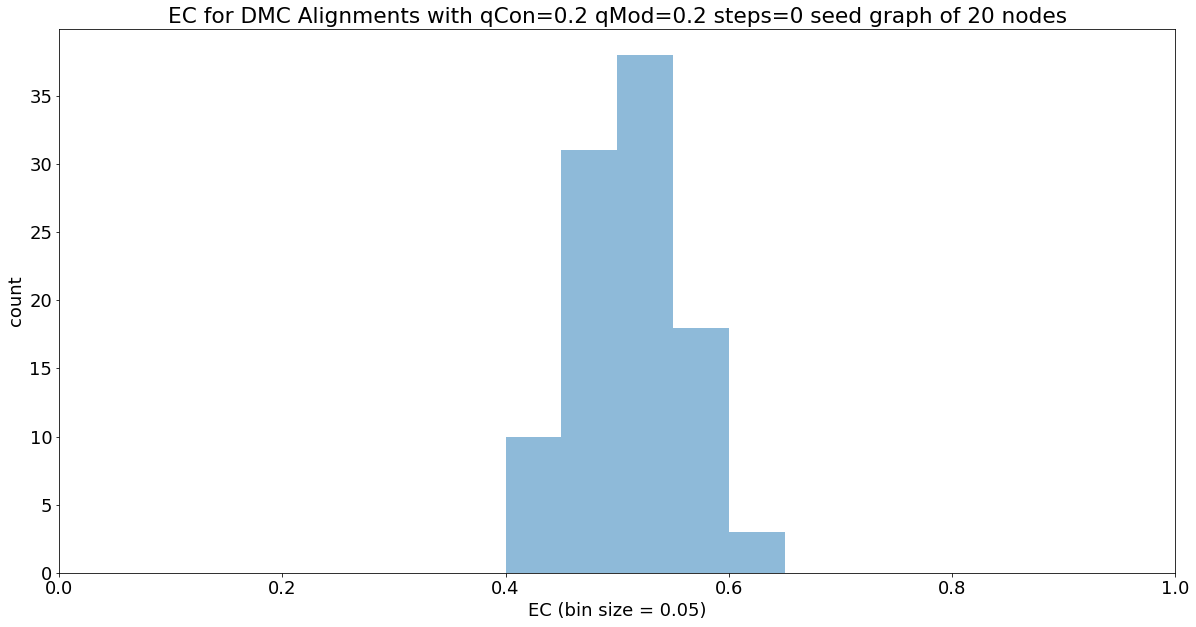

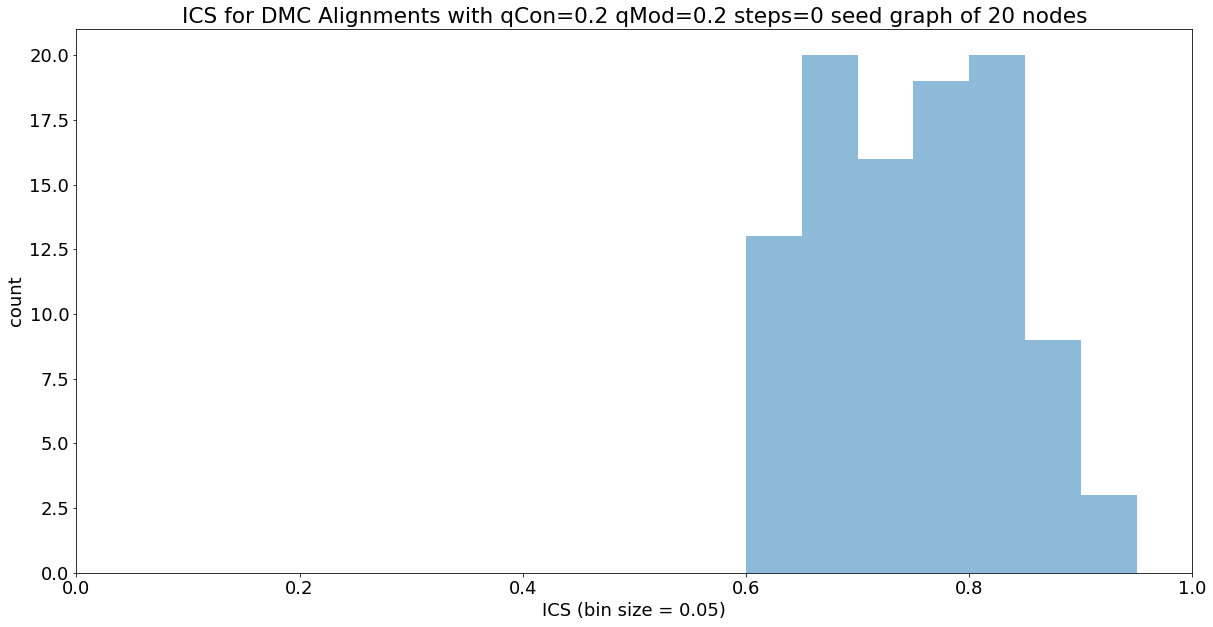

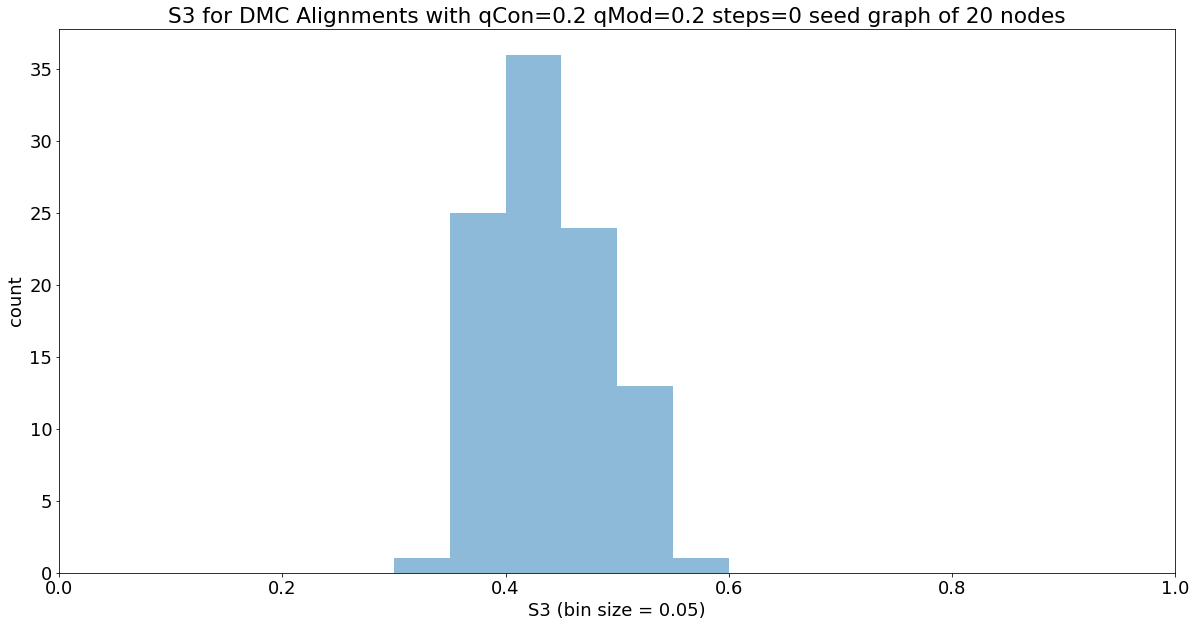

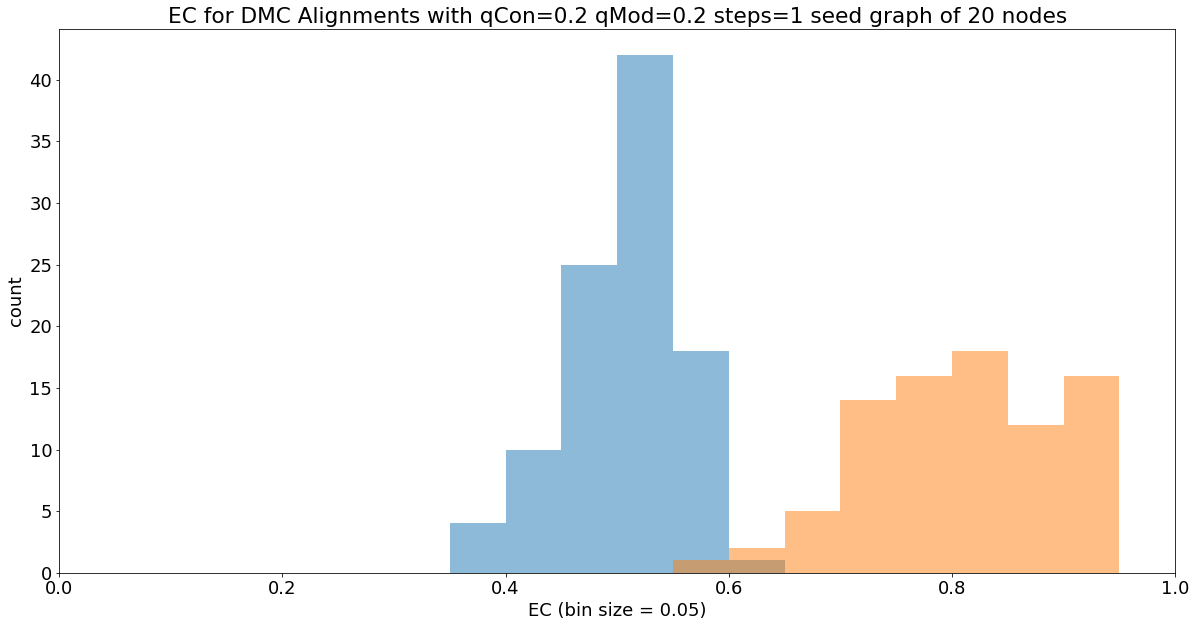

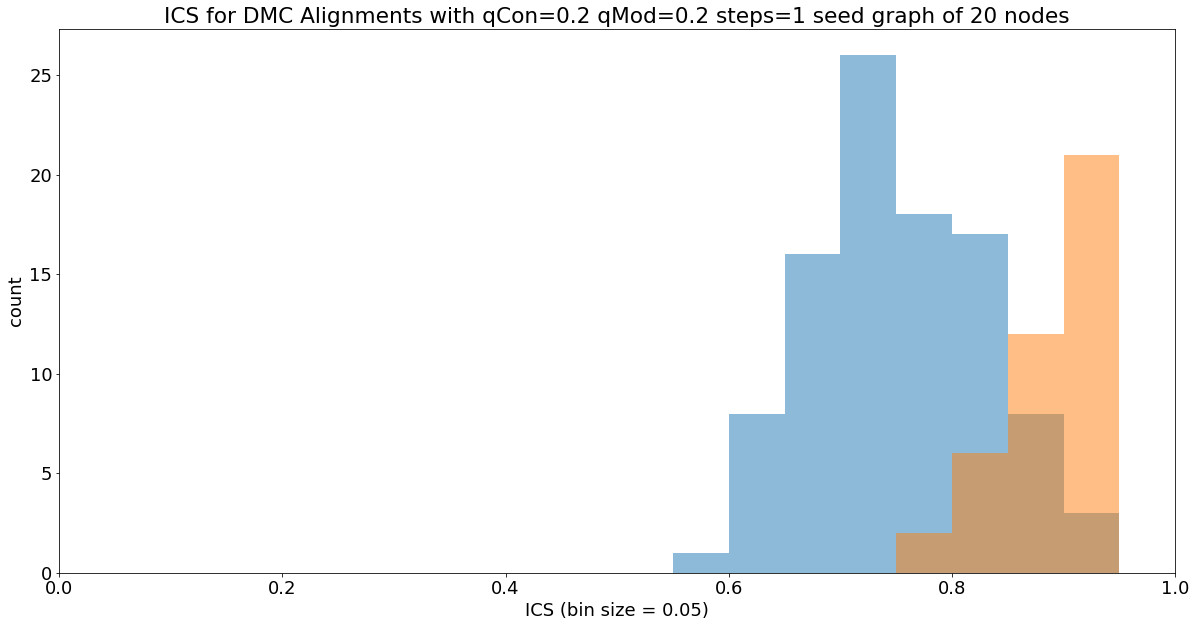

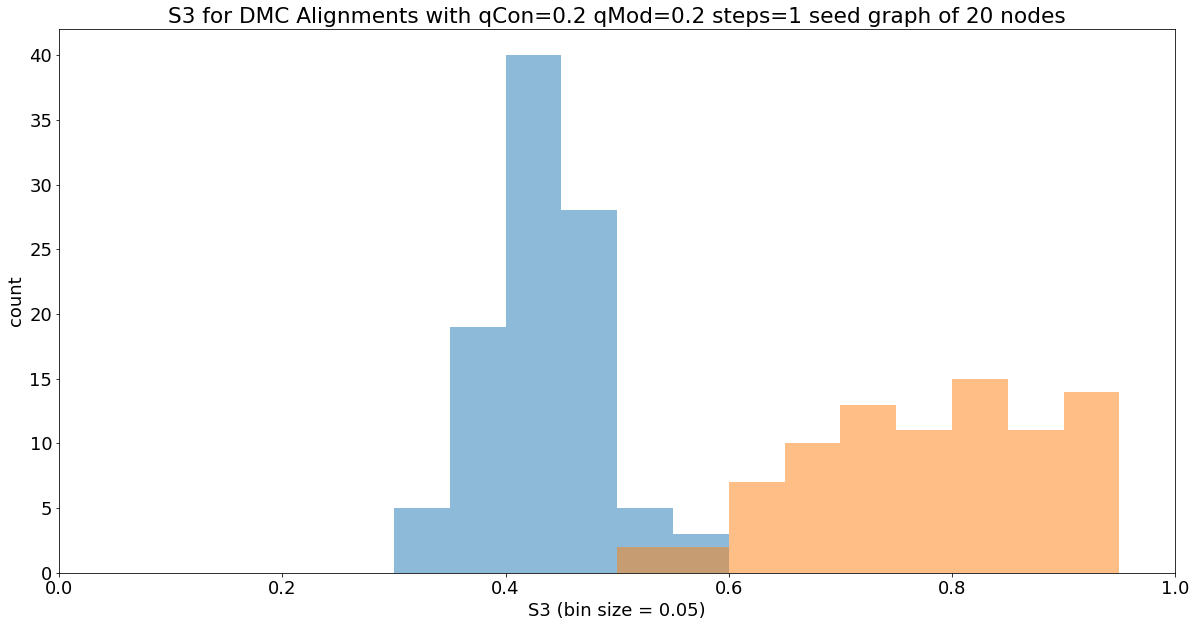

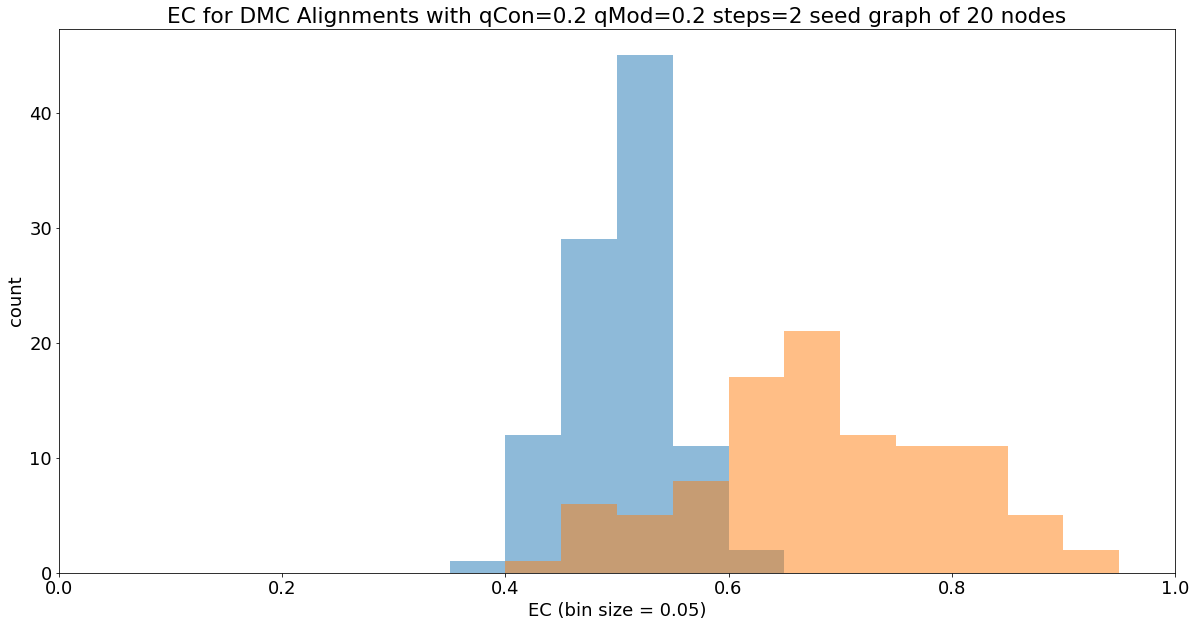

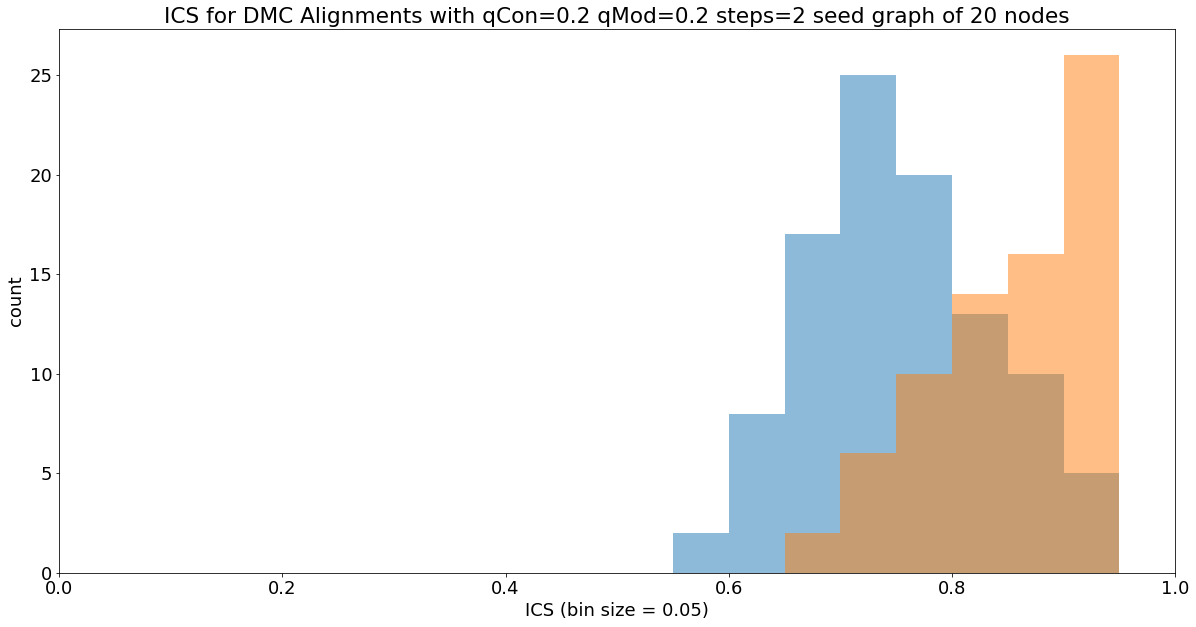

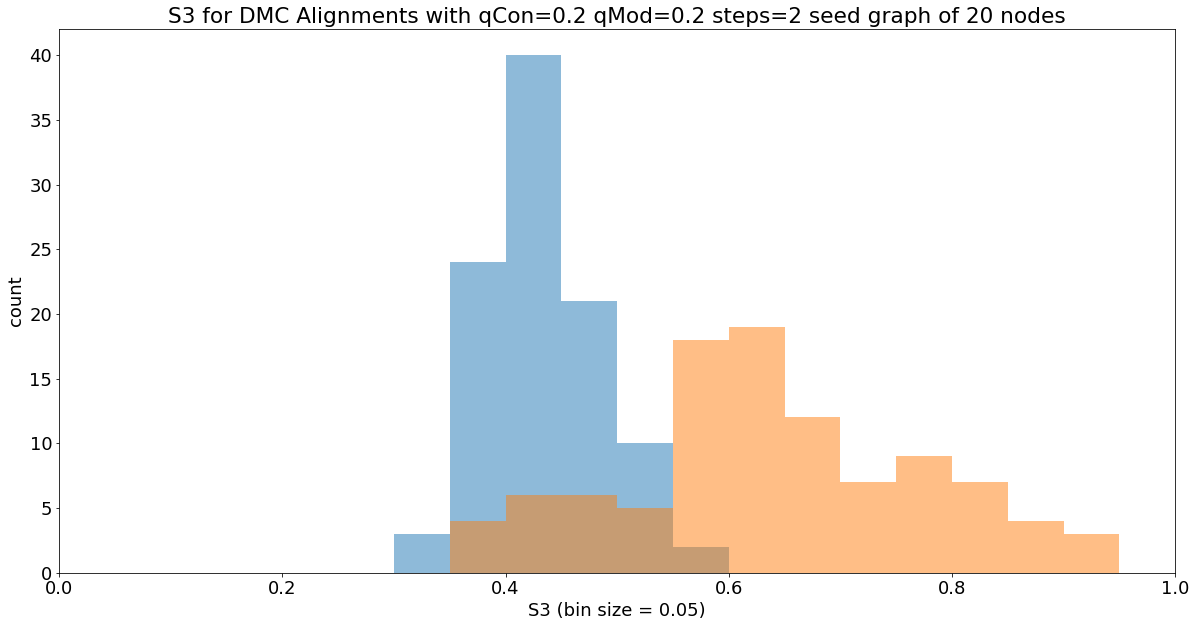

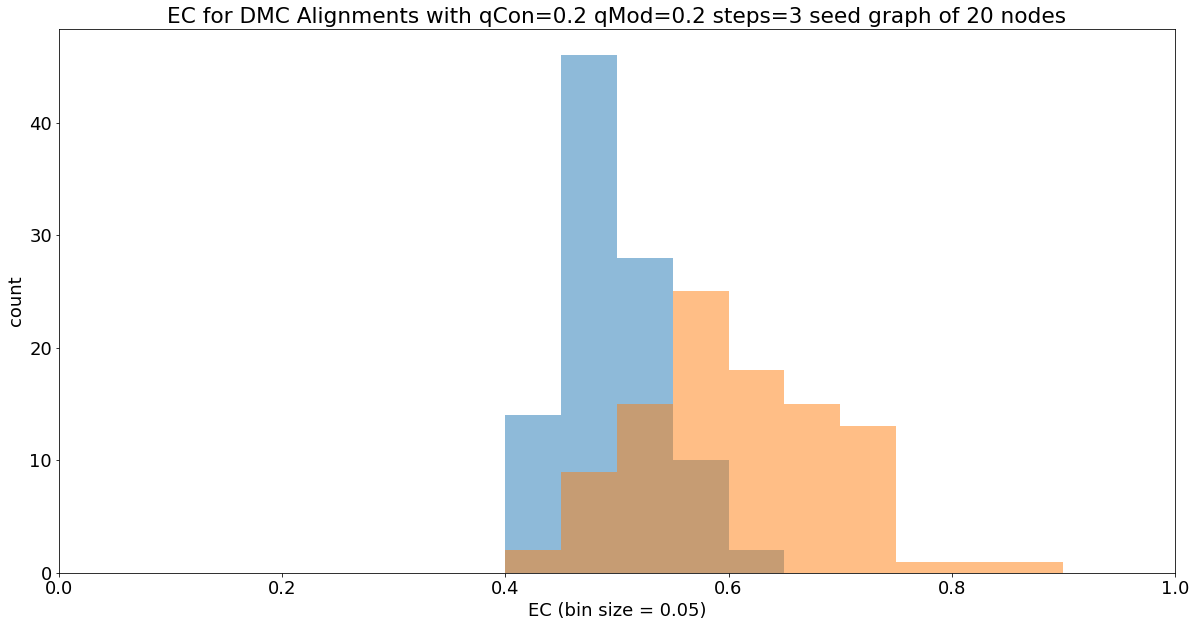

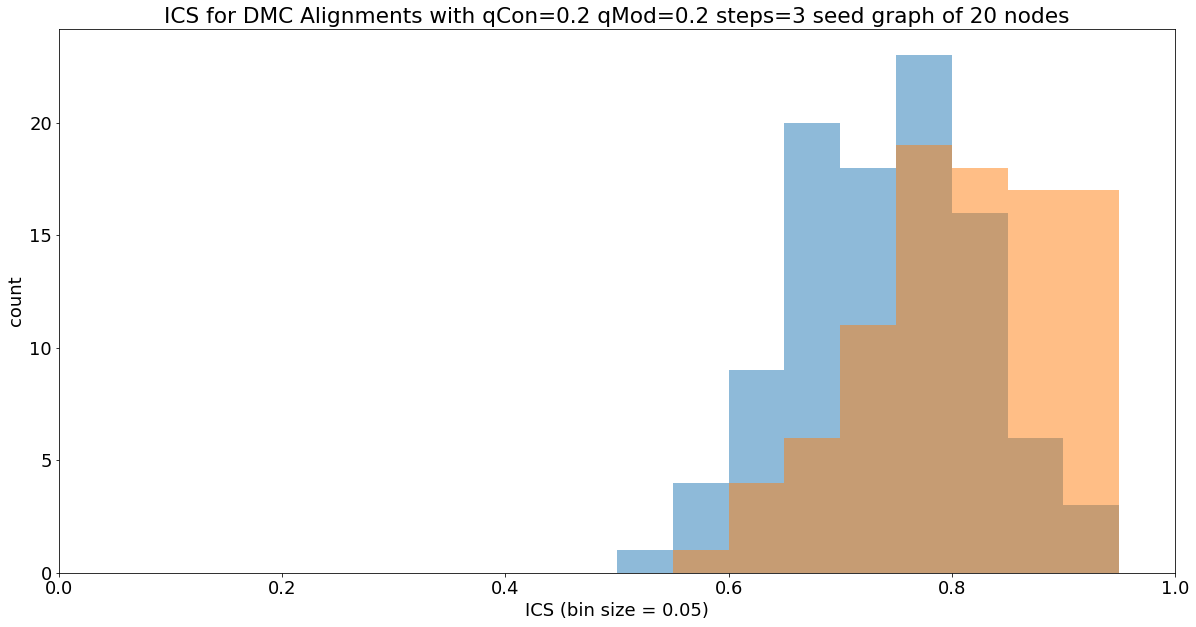

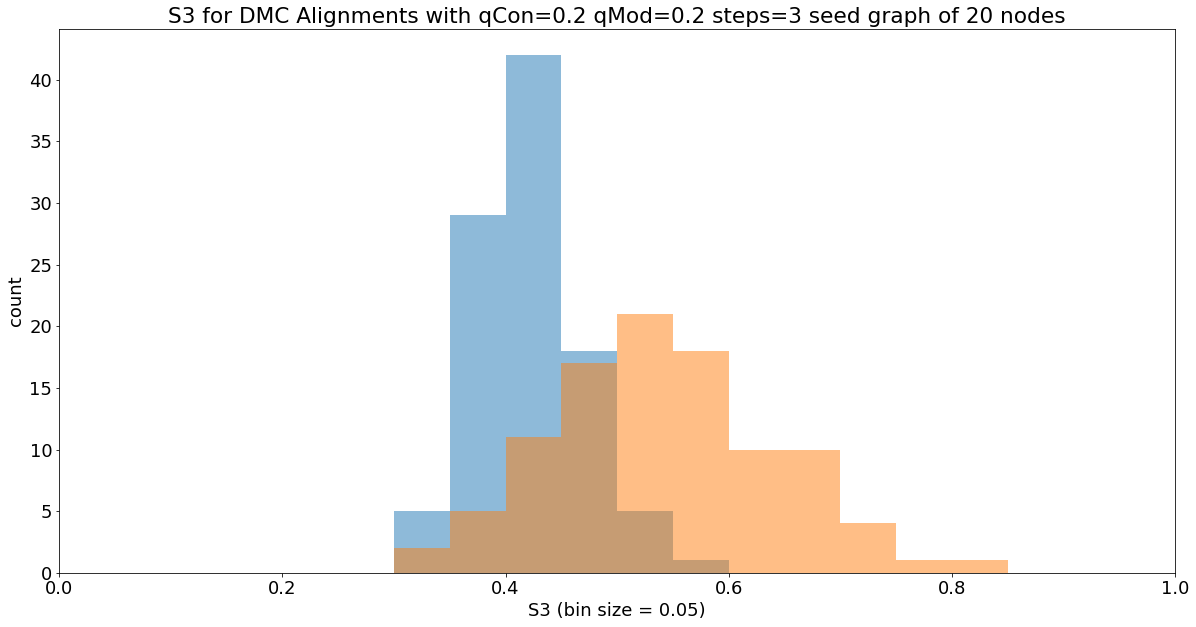

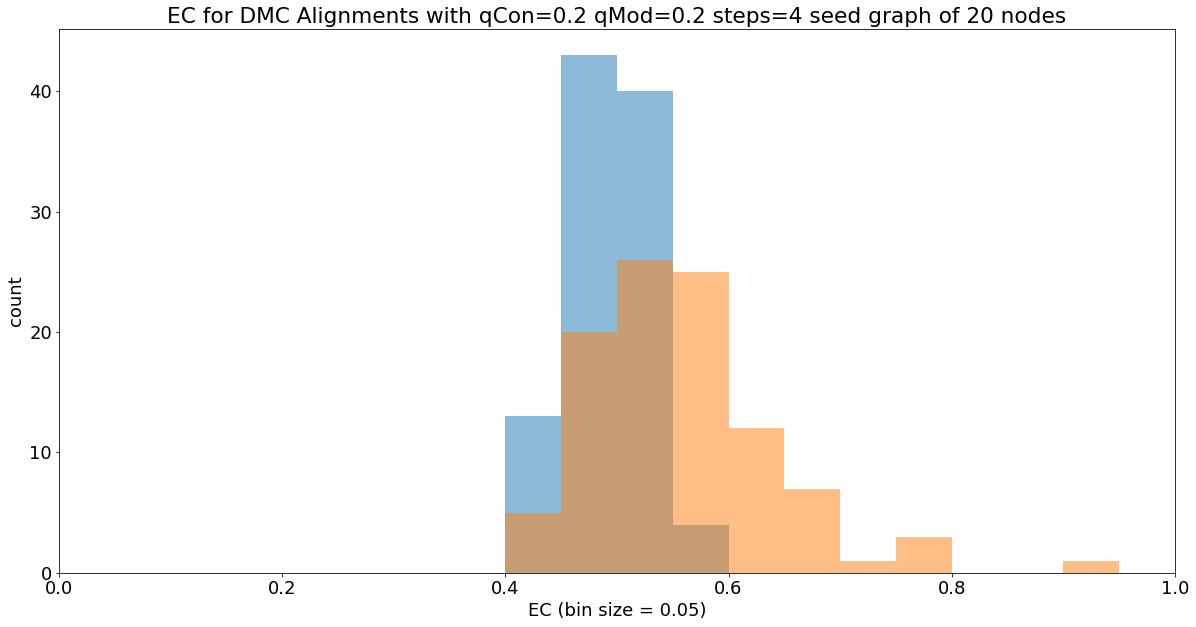

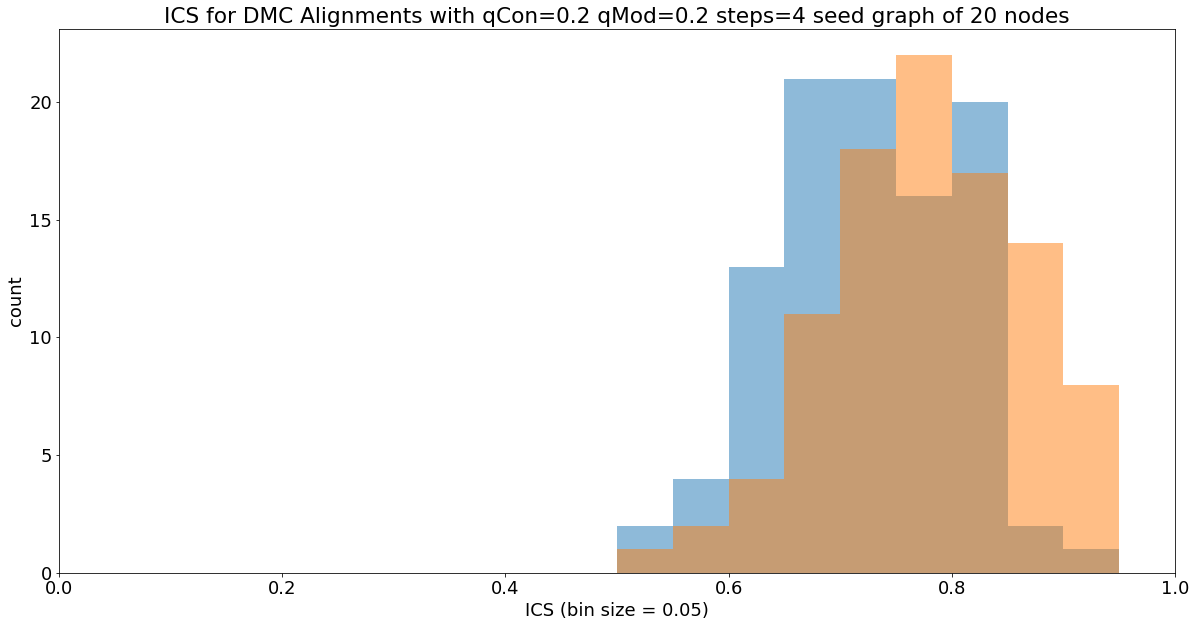

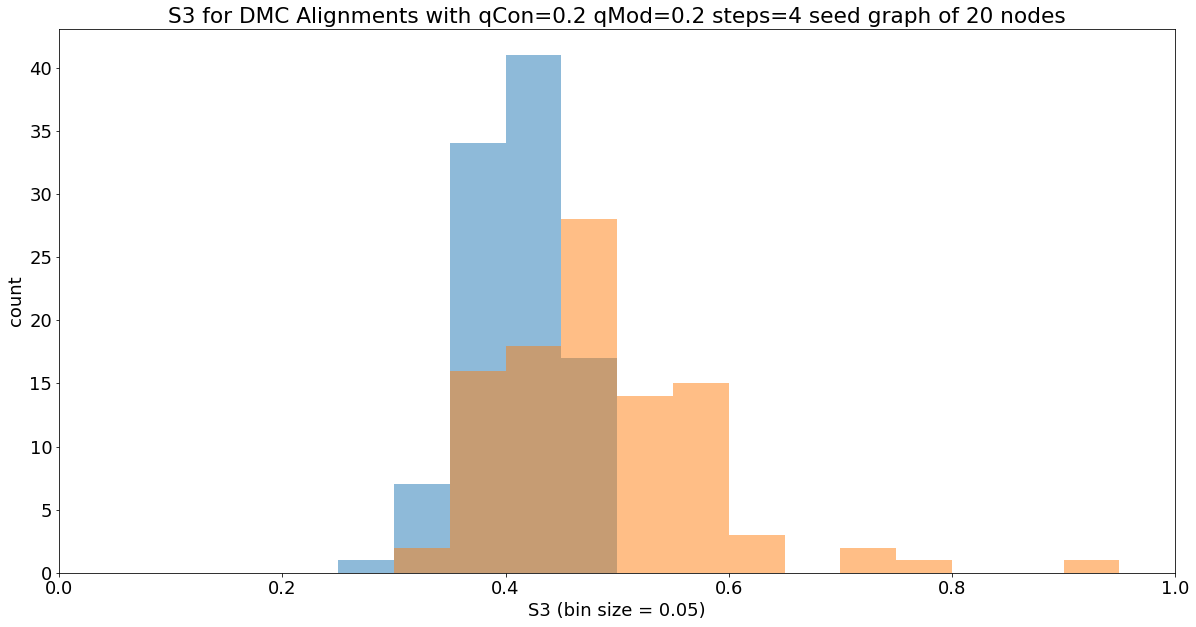

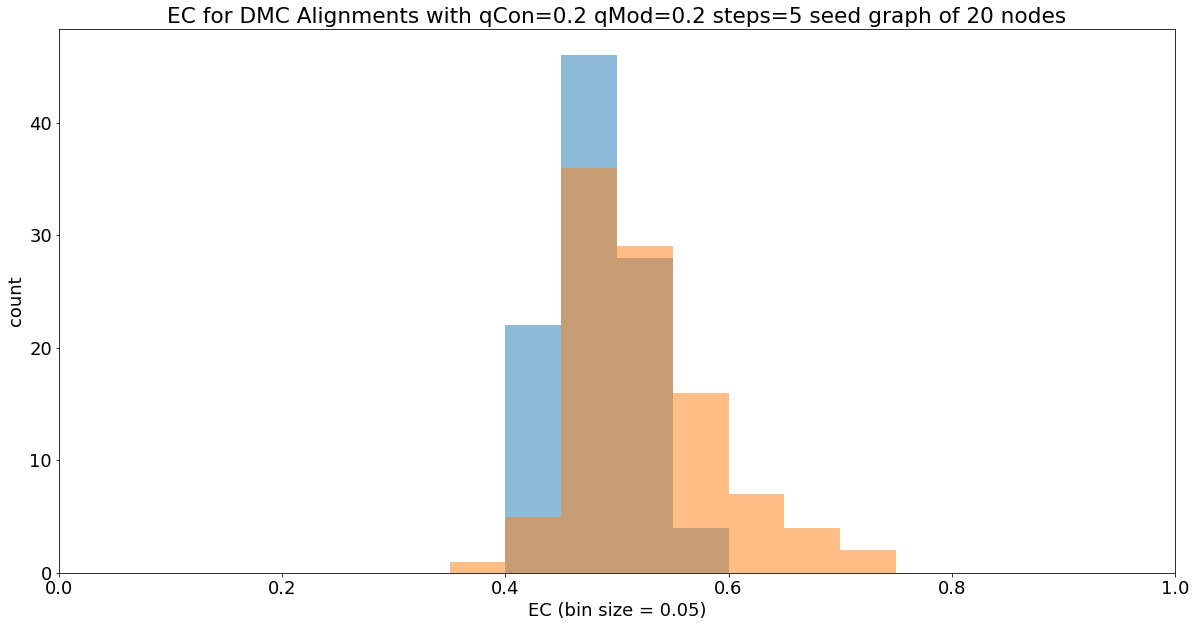

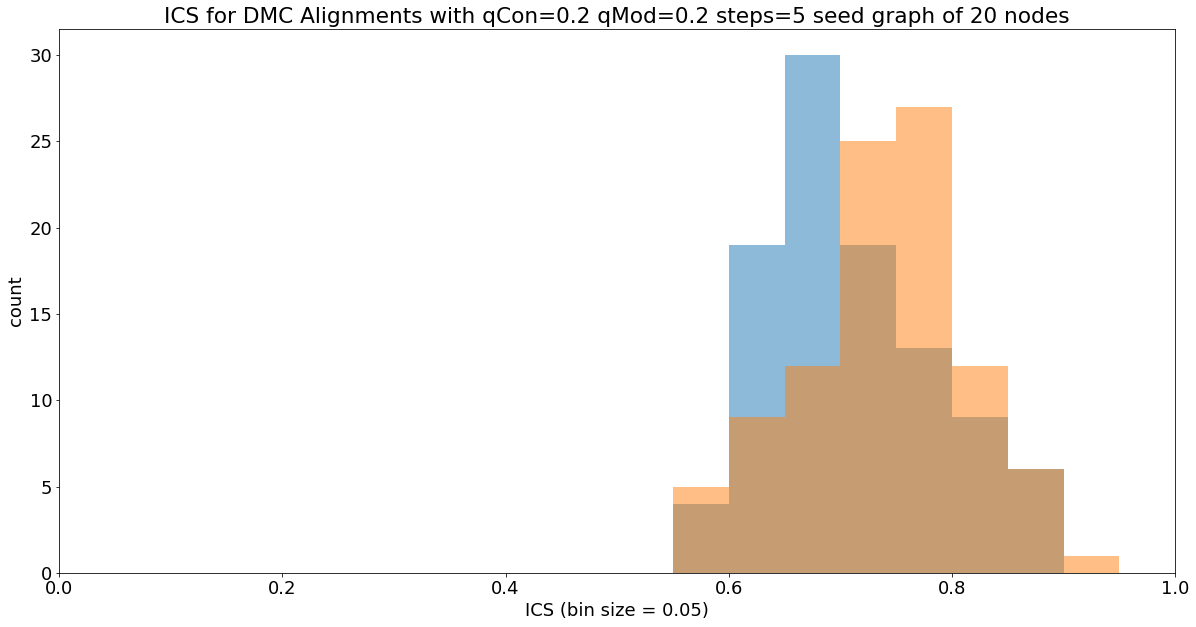

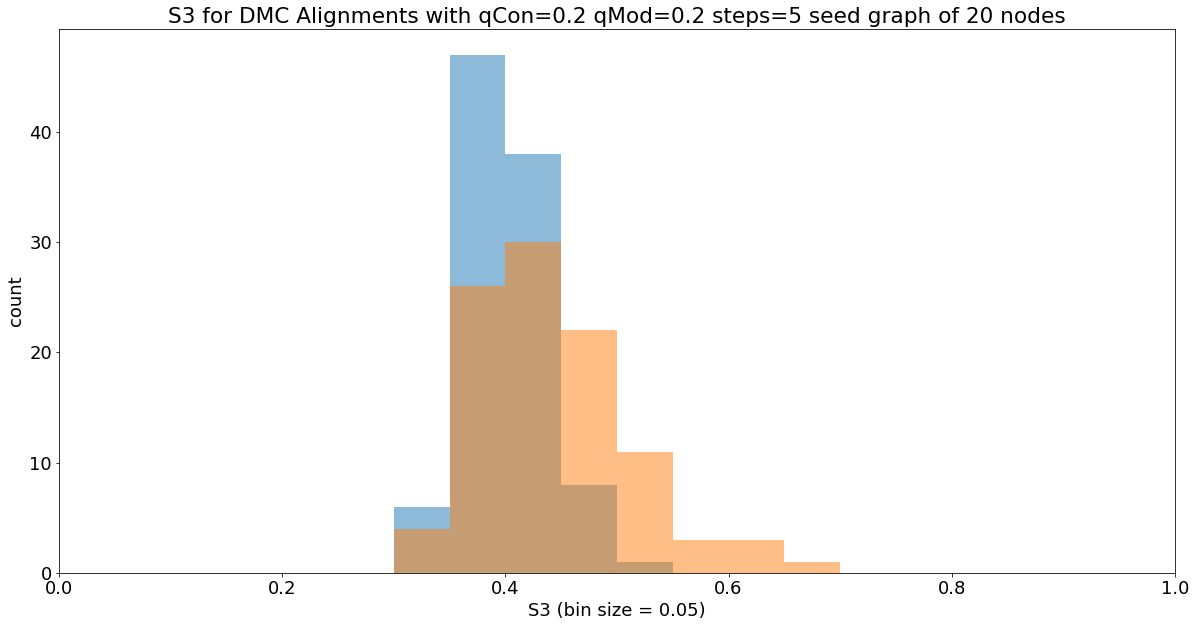

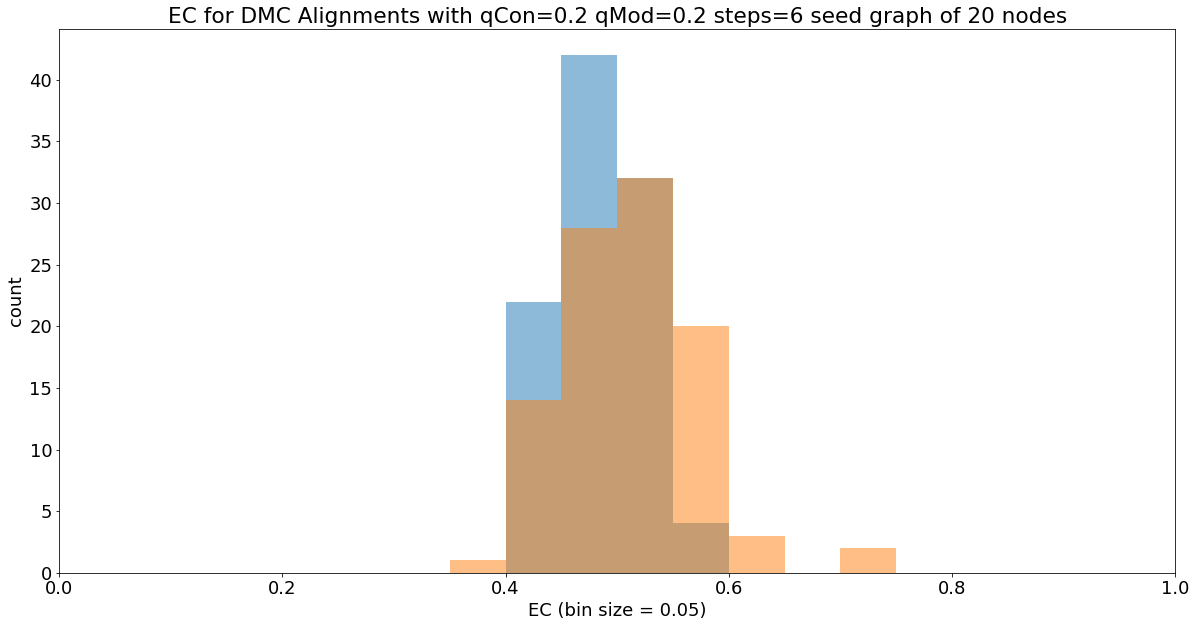

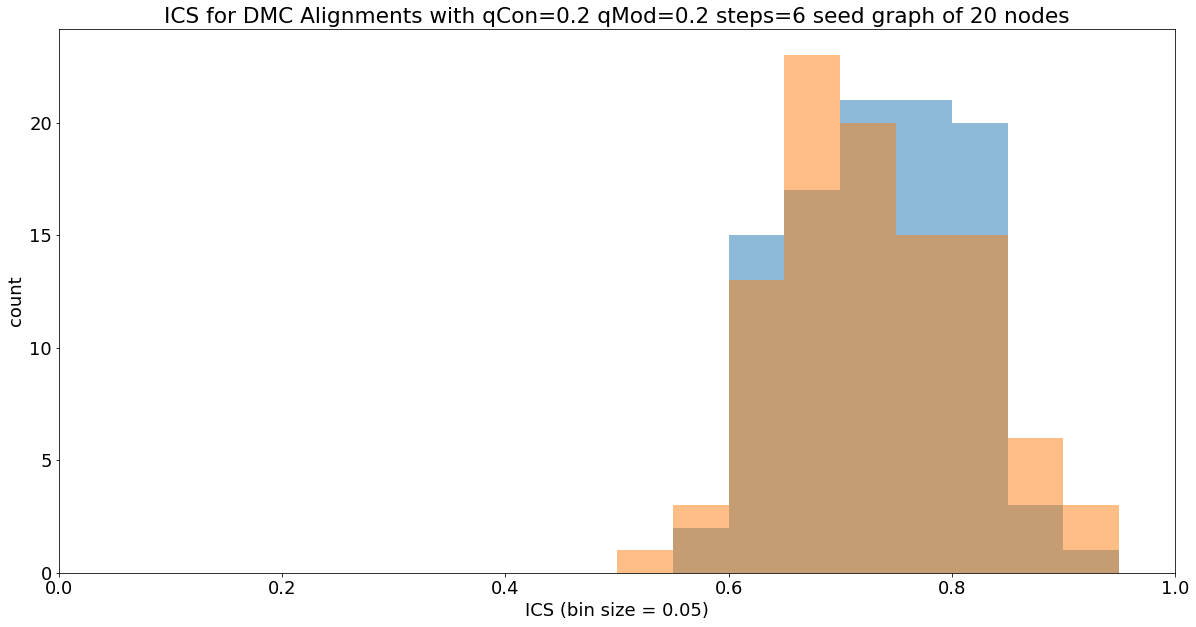

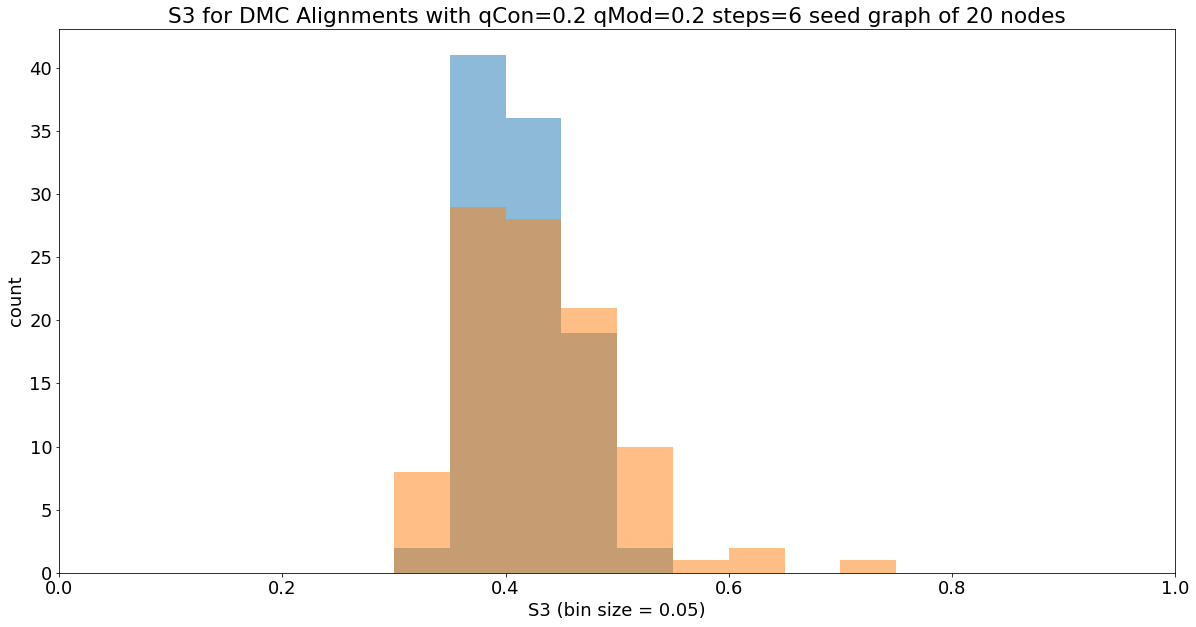

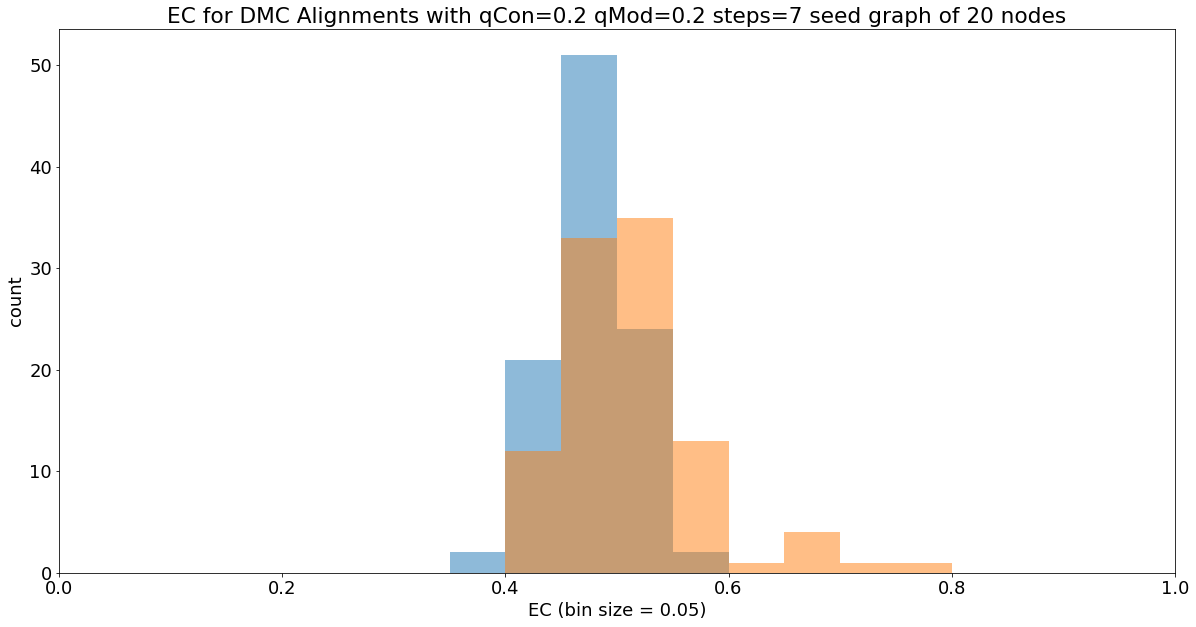

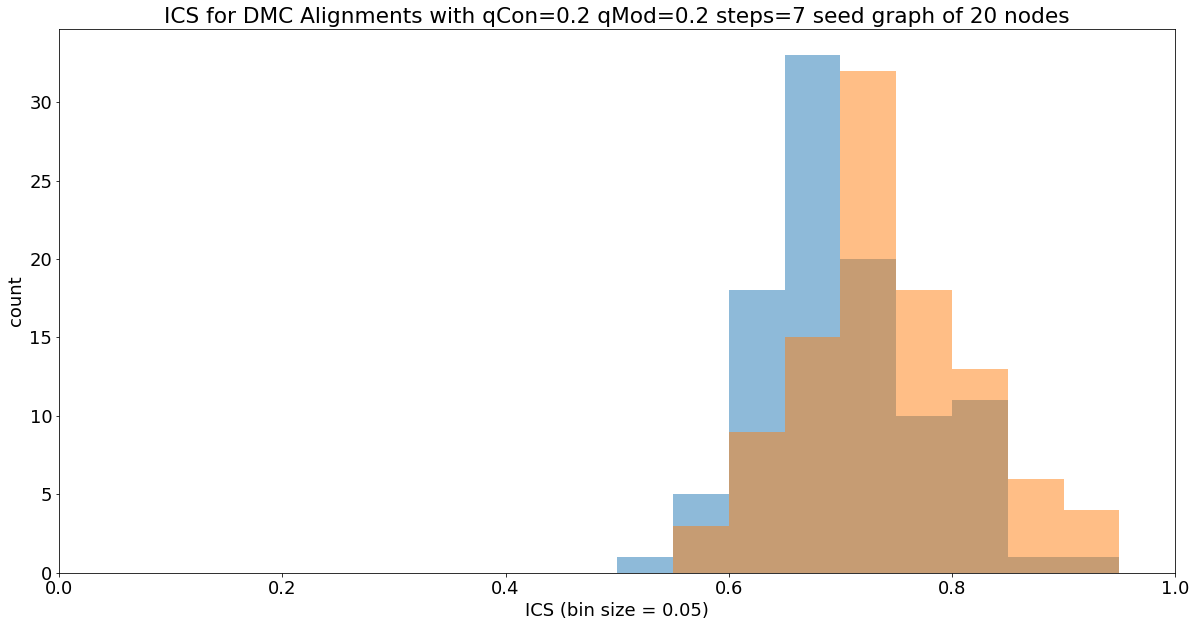

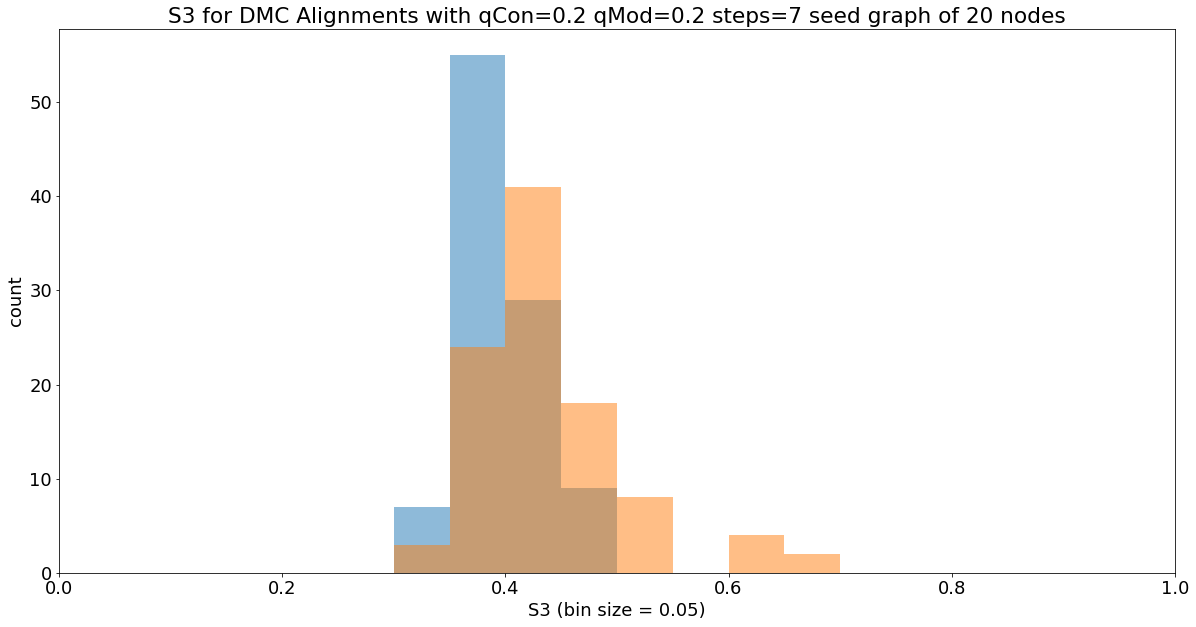

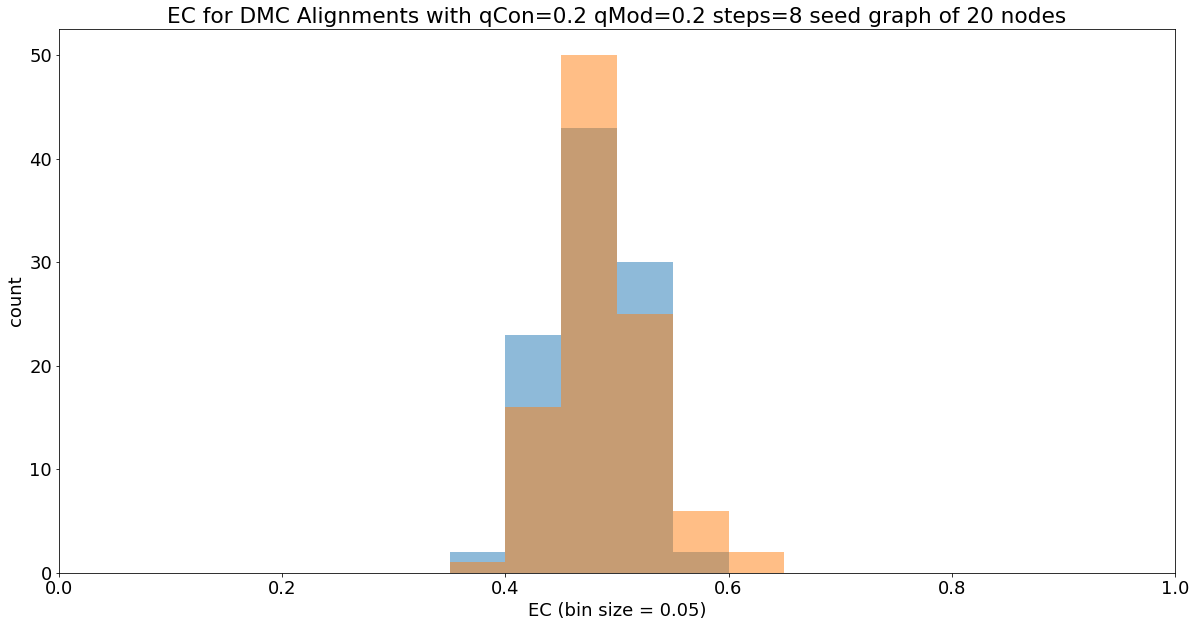

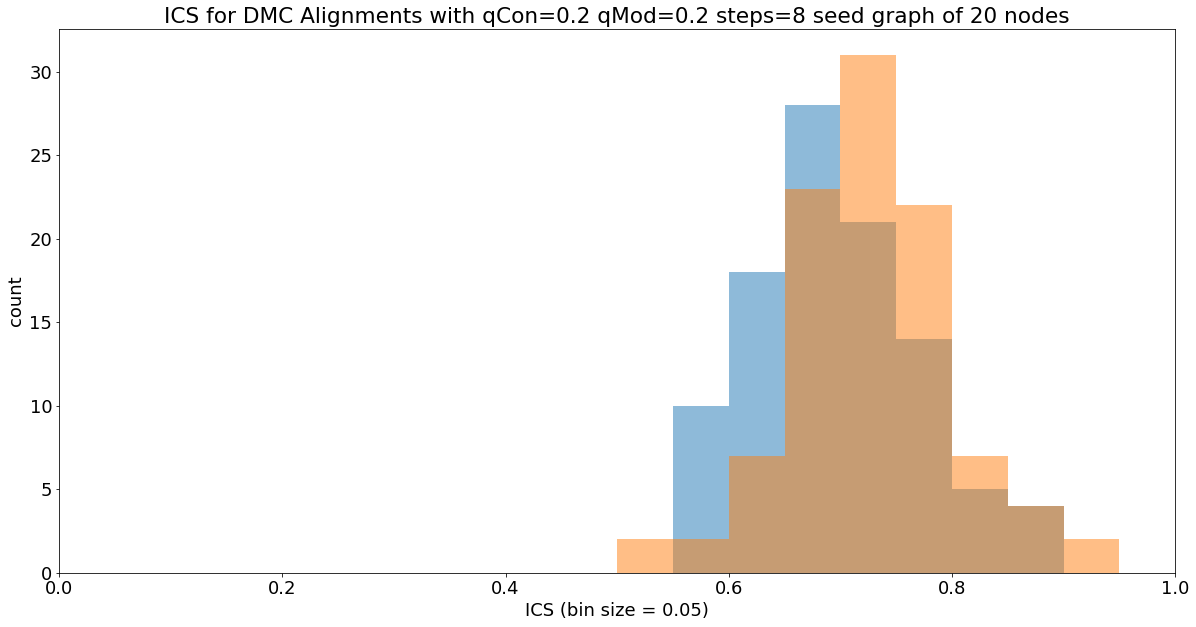

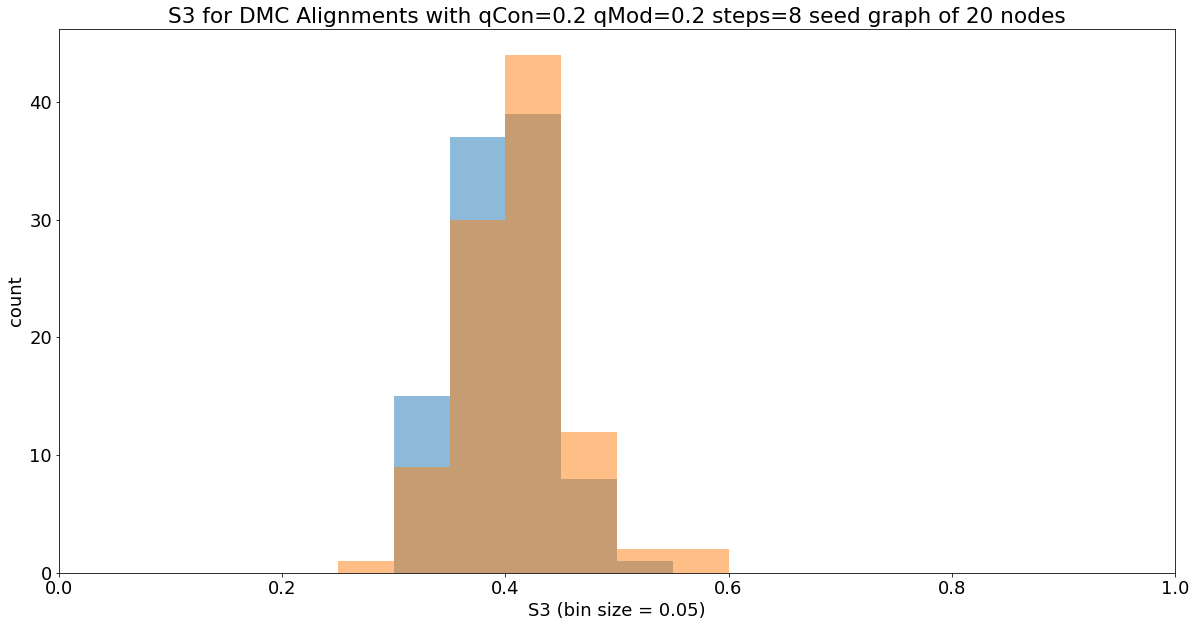

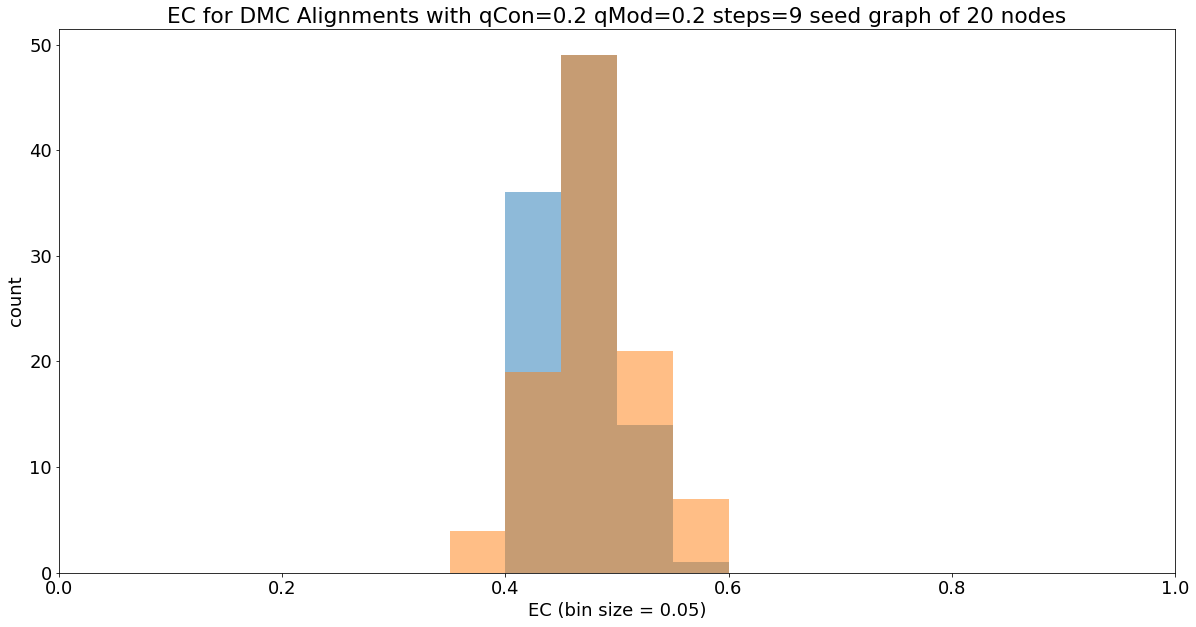

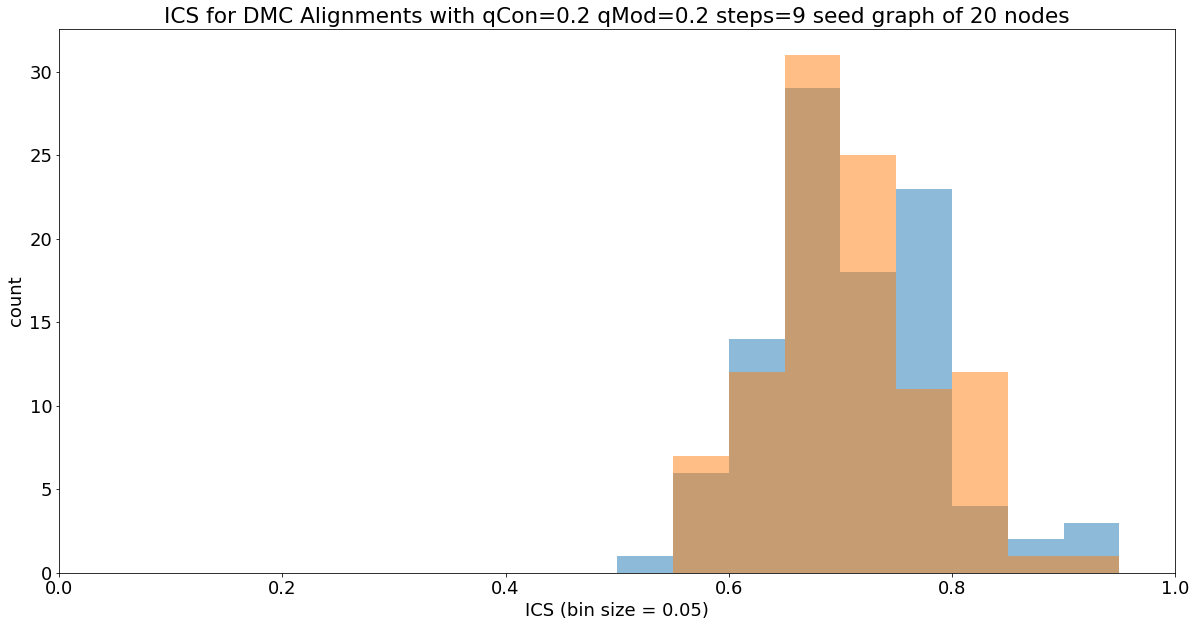

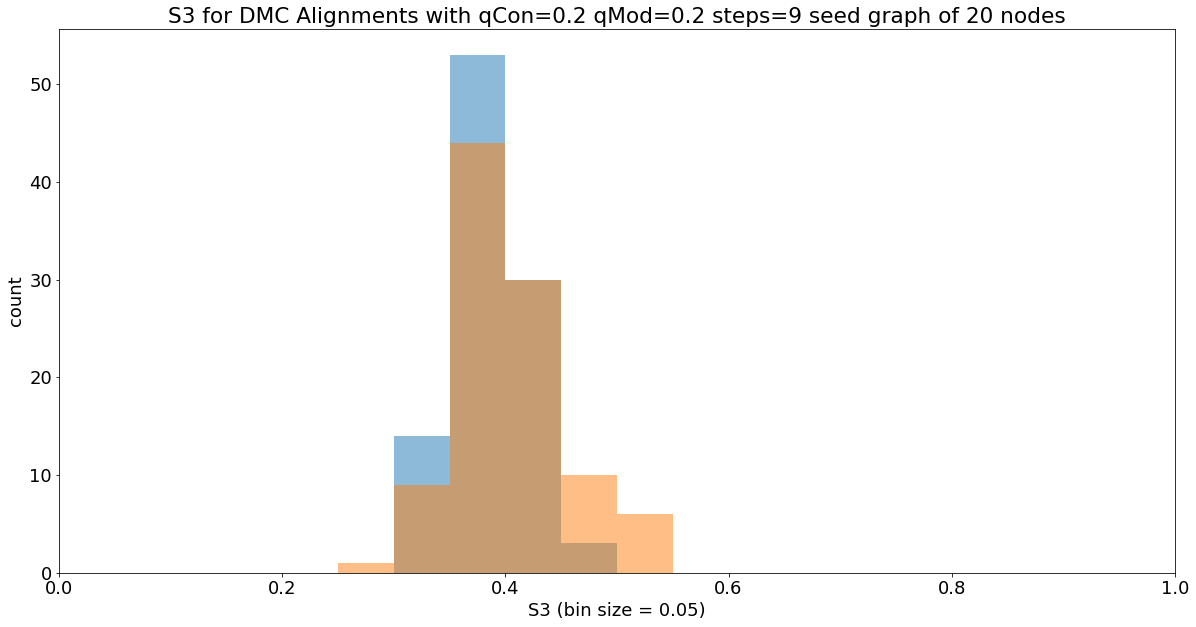

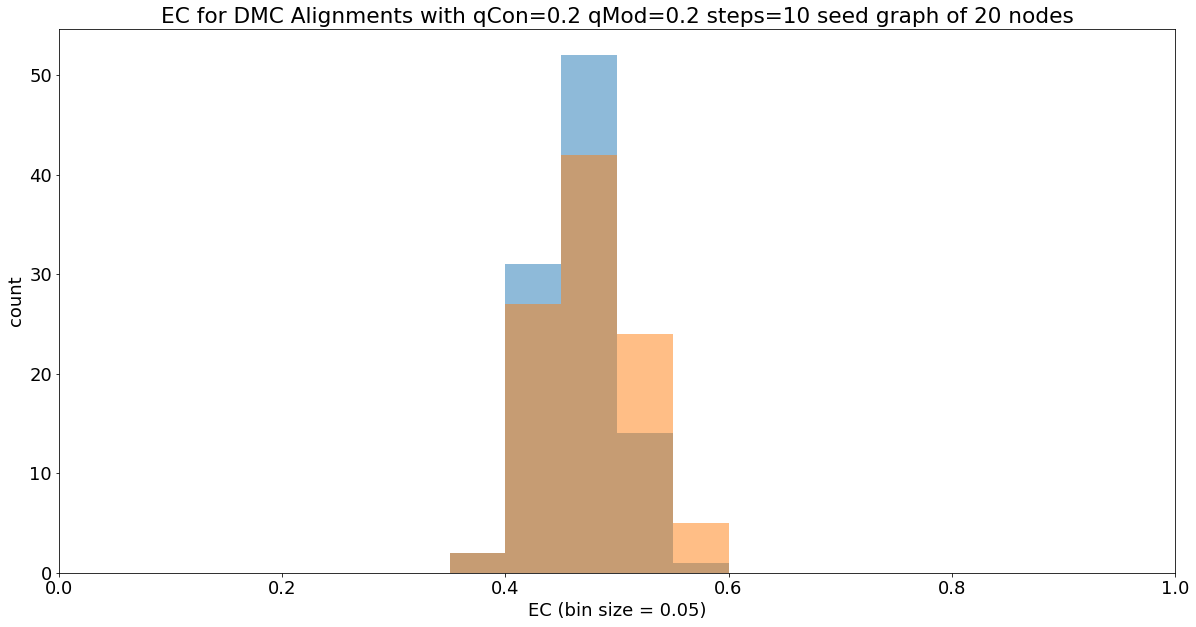

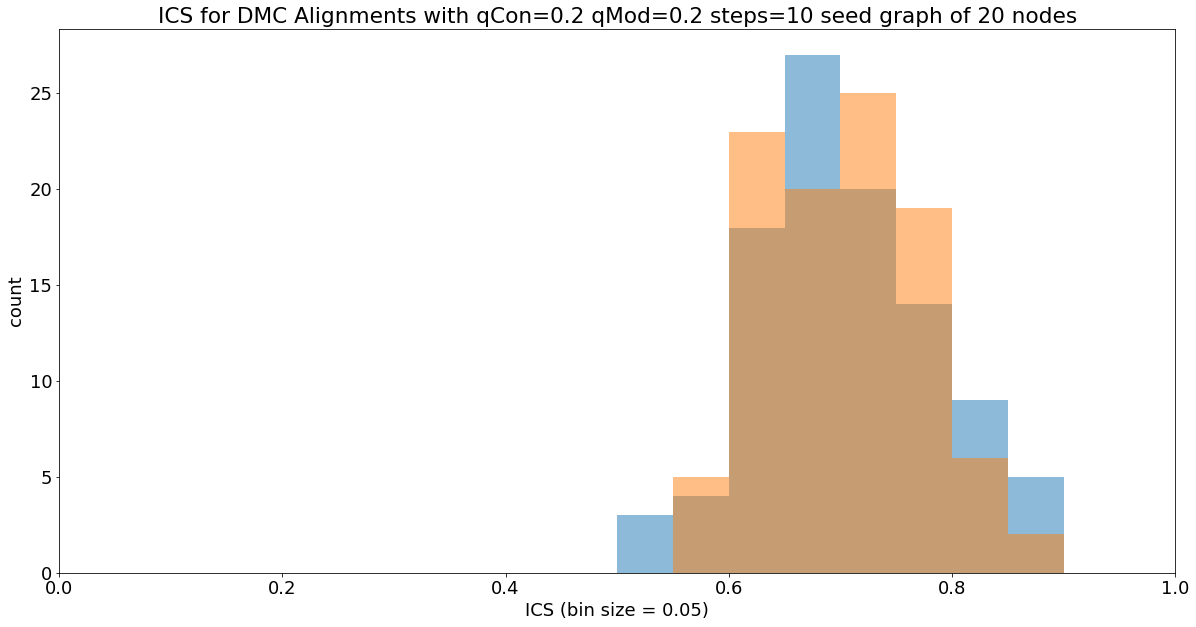

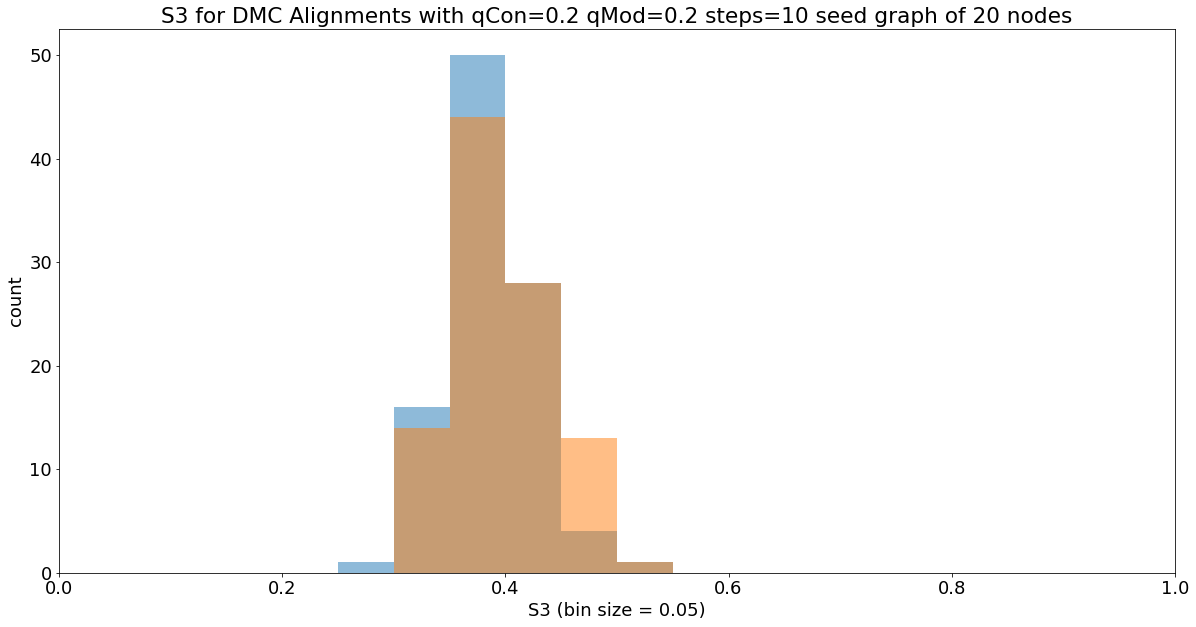

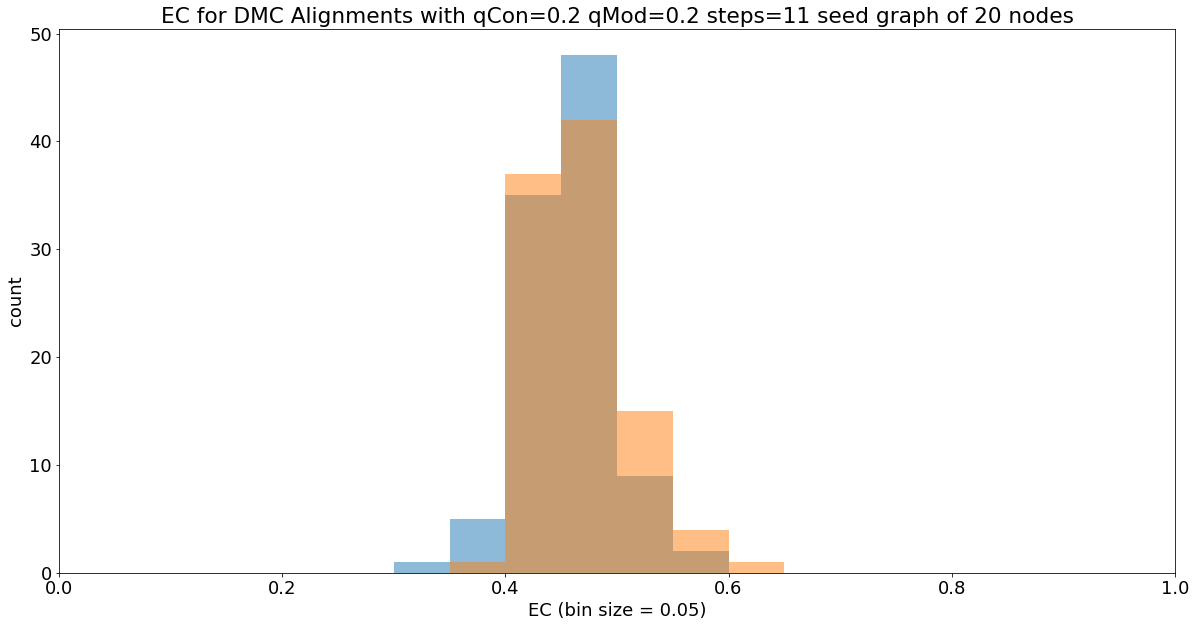

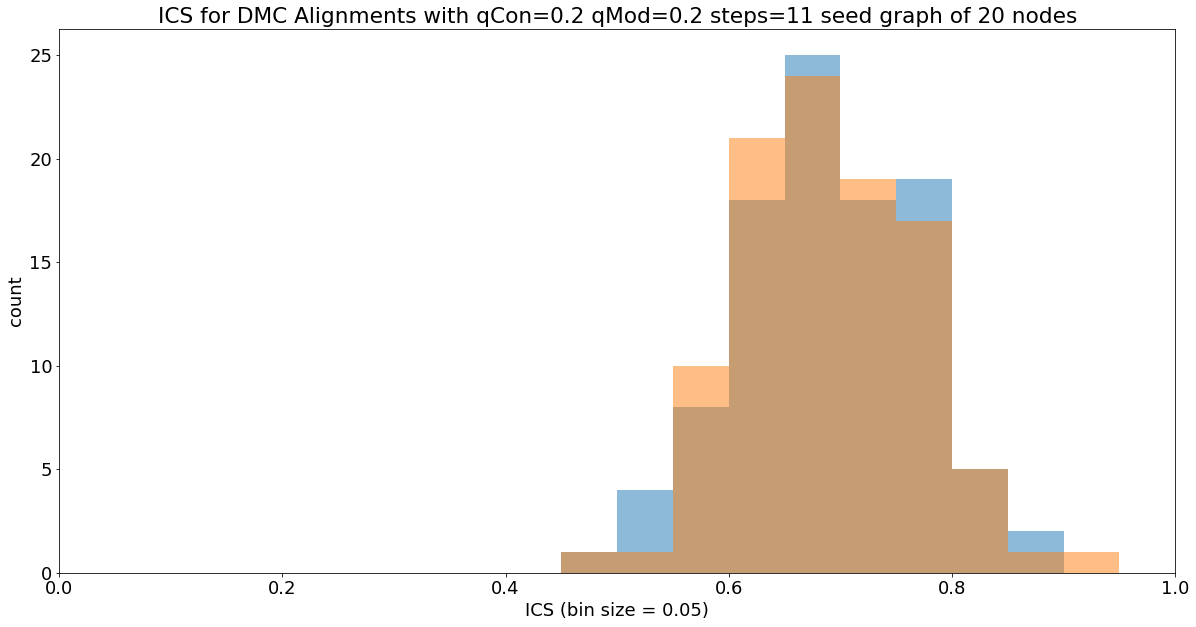

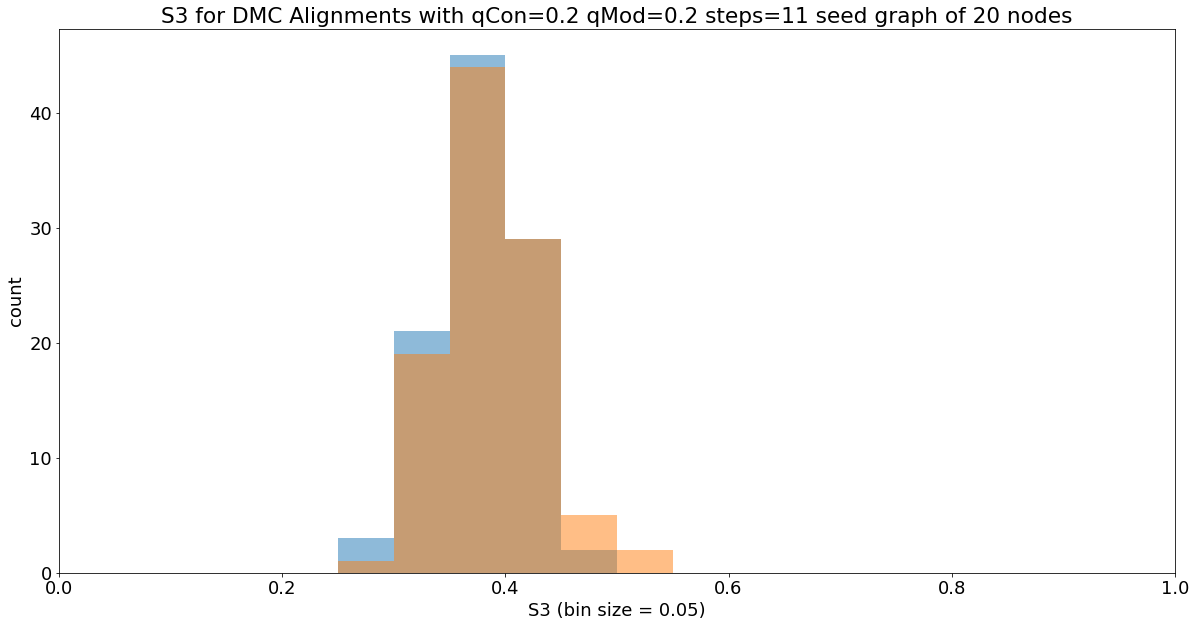

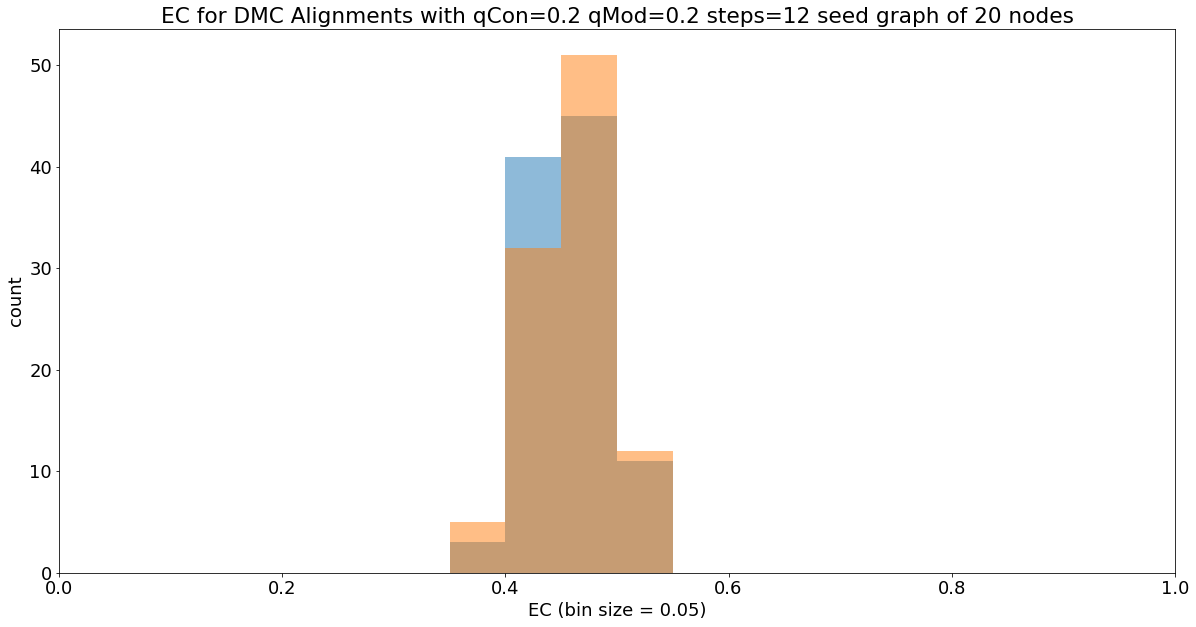

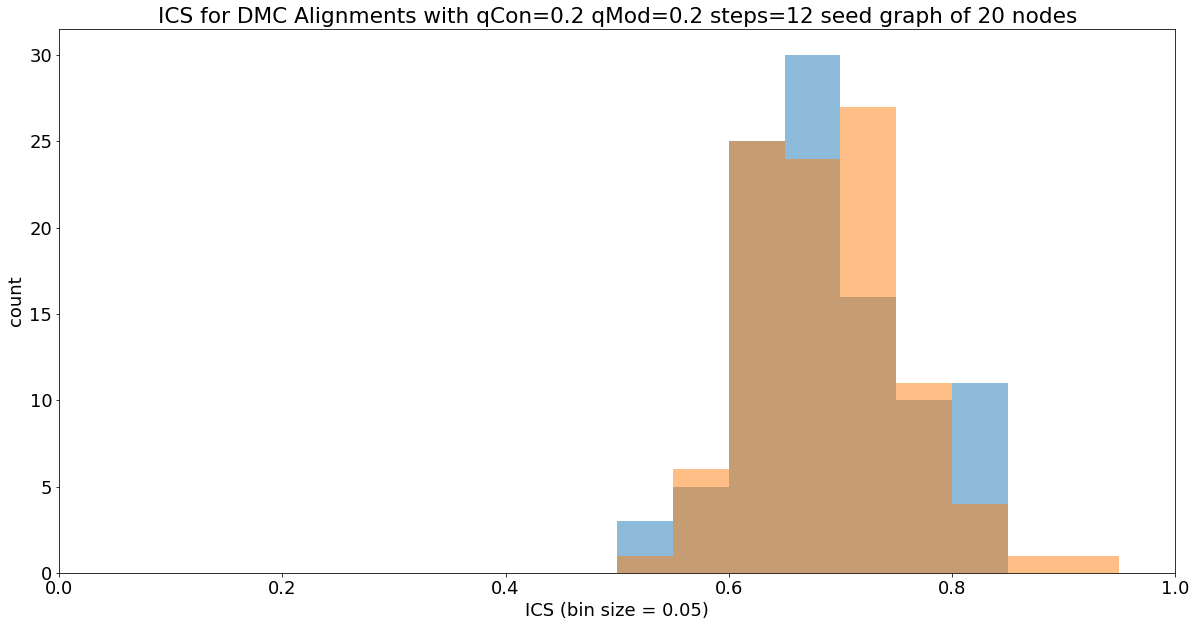

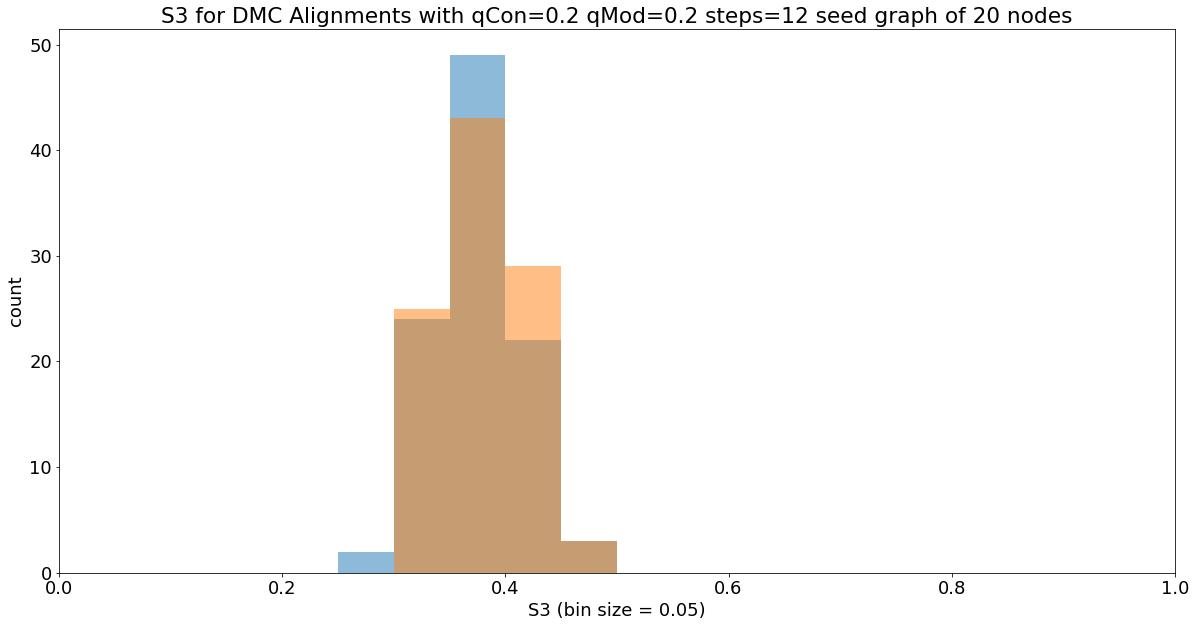

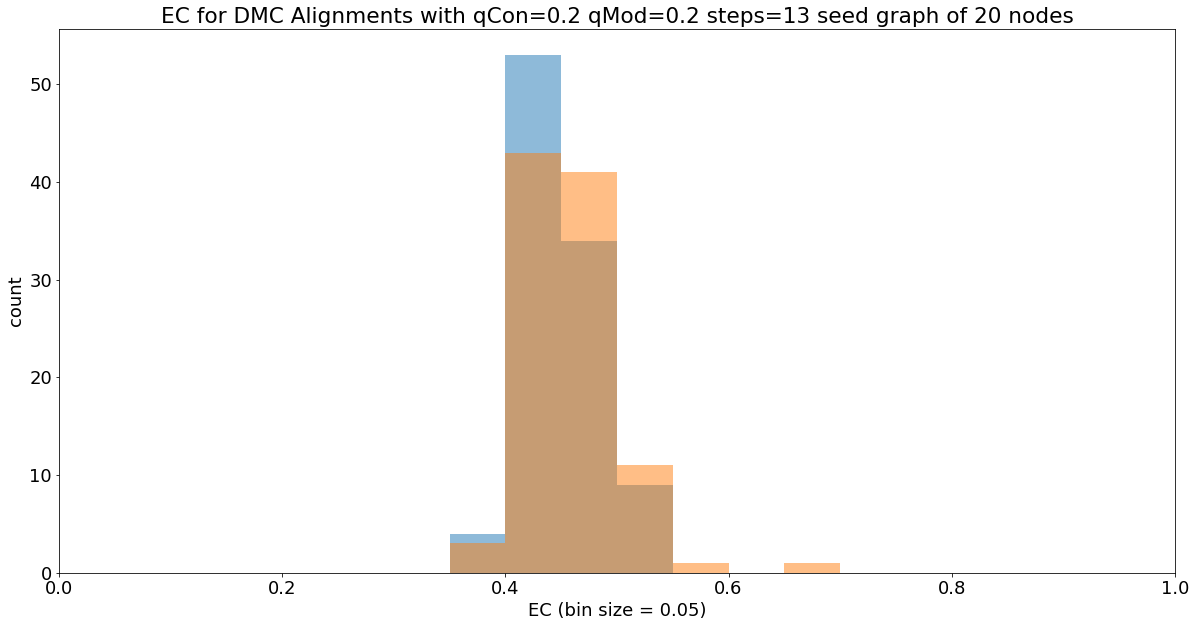

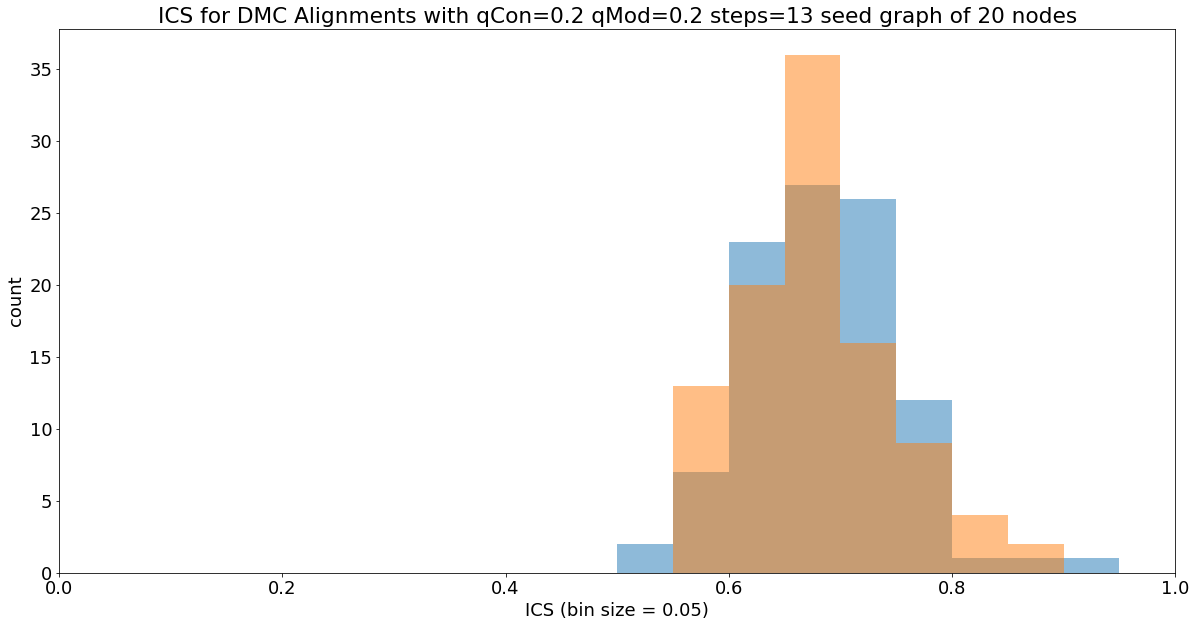

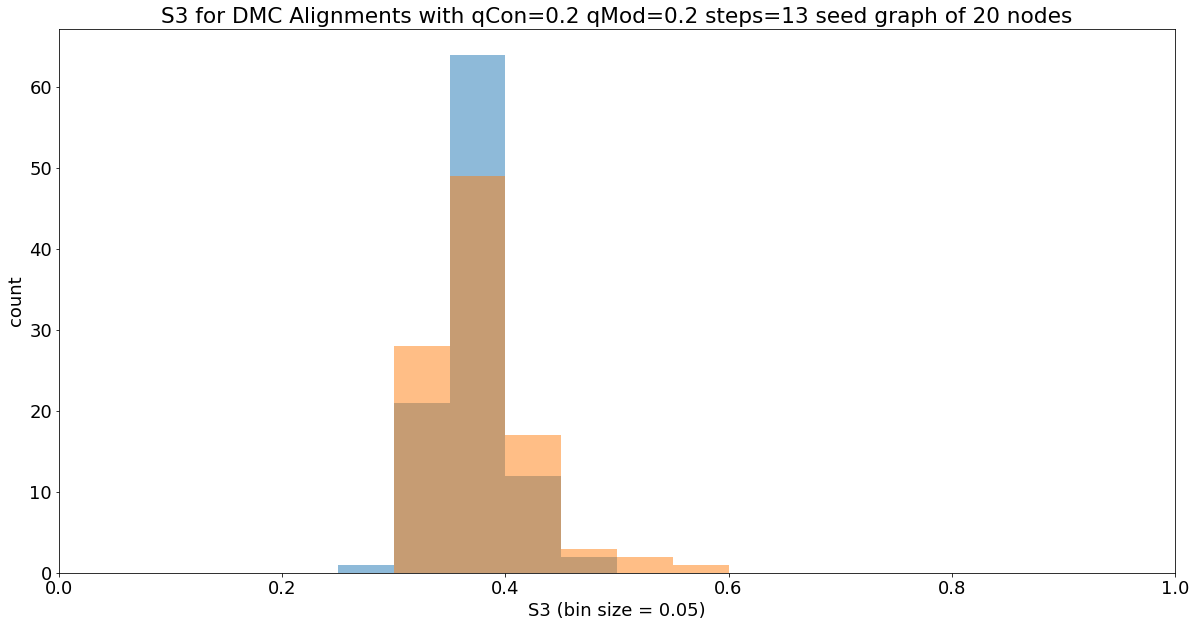

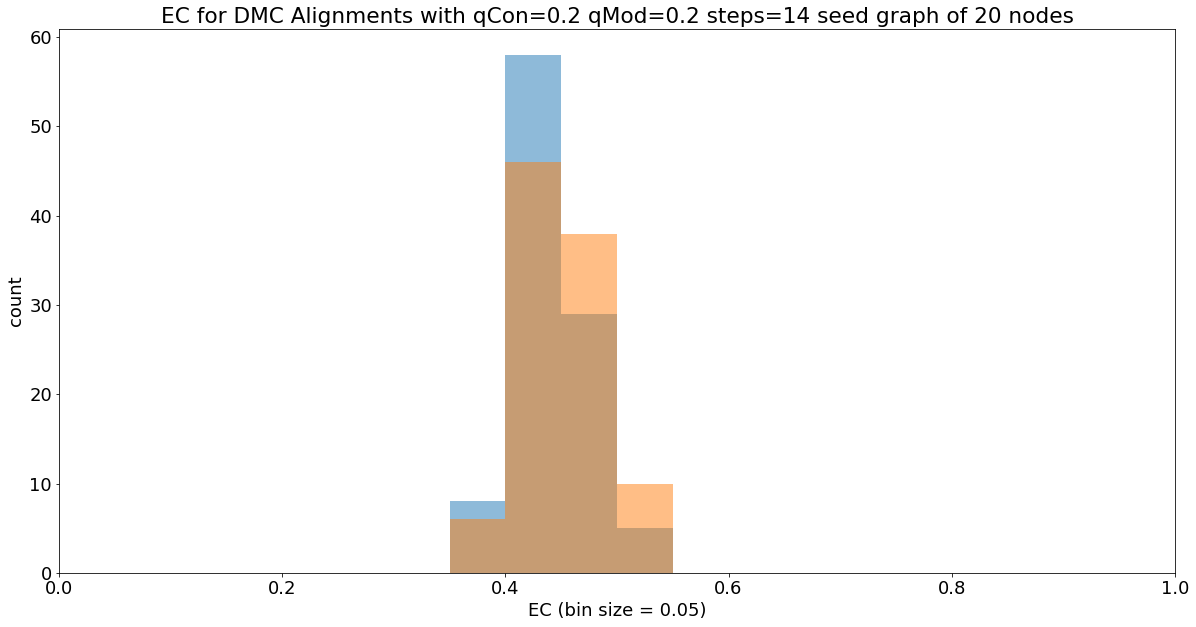

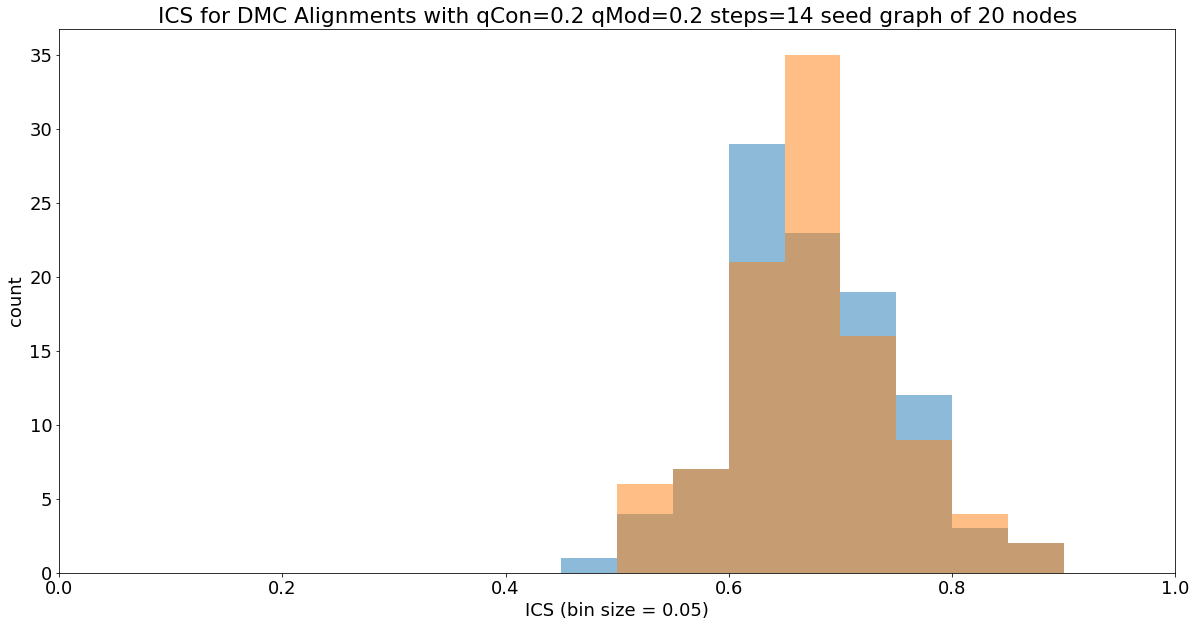

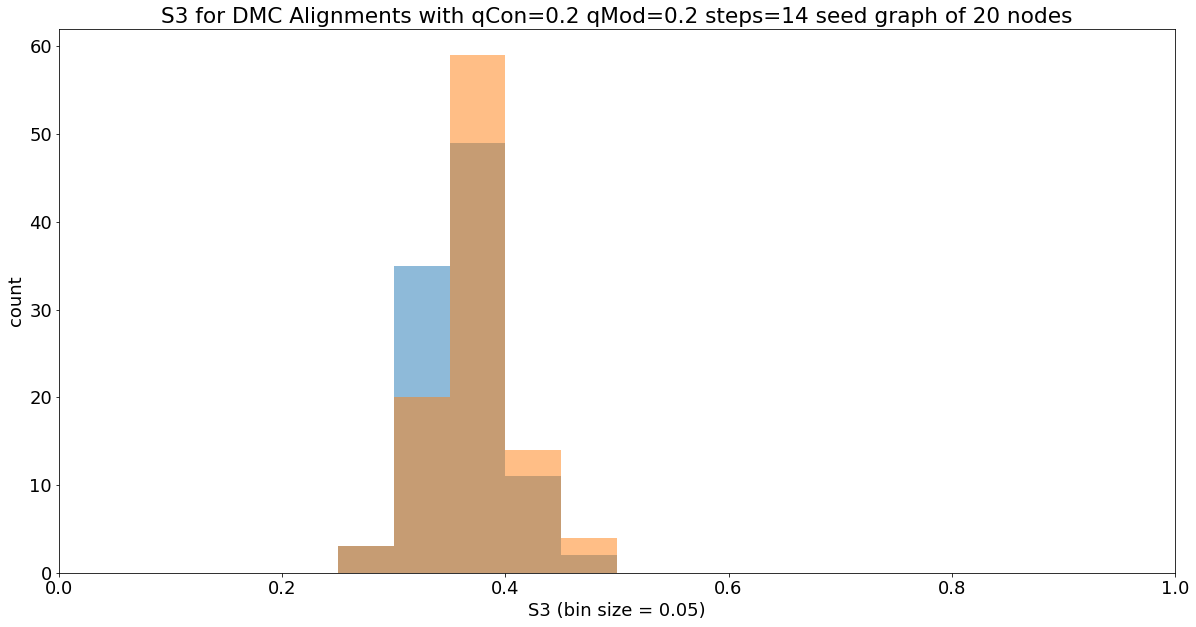

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import gene_functions as gf
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout
from ipywidgets import interact, IntSlider
import ast
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)
qCon=0.2
qMod=0.2
for steps in range(0,15):
    plt.figure(figsize=(20,10))
    data1=ECrandDict[(qCon,qMod,steps)]
    data2=ECevoDict[(qCon,qMod,steps)]
    # fixed bin size
    bins = np.arange(0, 1, 0.05) # fixed bin size

    plt.xlim([0, 1])

    plt.hist(data1, bins=bins, alpha=0.5)
    plt.hist(data2, bins=bins, alpha=0.5)
    
    plt.title('EC for DMC Alignments with qCon='+str(qCon)+' qMod='+str(qMod)+' steps='+str(steps)+' seed graph of 20 nodes')
    plt.xlabel('EC (bin size = 0.05)')
    plt.ylabel('count')
    plt.savefig(str(chr(65+steps))+'EC for DMC Alignments with qCon='+str(qCon)+' qMod='+str(qMod)+' steps='+str(steps)+' seed graph of 20 nodes.png')
    plt.show()

    plt.figure(figsize=(20,10))
    data1=ICSrandDict[(qCon,qMod,steps)]
    data2=ICSevoDict[(qCon,qMod,steps)]
    # fixed bin size
    bins = np.arange(0, 1, 0.05) # fixed bin size

    plt.xlim([0, 1])

    plt.hist(data1, bins=bins, alpha=0.5)
    plt.hist(data2, bins=bins, alpha=0.5)
    
    plt.title('ICS for DMC Alignments with qCon='+str(qCon)+' qMod='+str(qMod)+' steps='+str(steps)+' seed graph of 20 nodes')
    plt.xlabel('ICS (bin size = 0.05)')
    plt.ylabel('count')
    plt.savefig(str(chr(65+steps))+'ICS for DMC Alignments with qCon='+str(qCon)+' qMod='+str(qMod)+' steps='+str(steps)+' seed graph of 20 nodes.png')
    plt.show()

    
    plt.figure(figsize=(20,10))
    data1=S3randDict[(qCon,qMod,steps)]
    data2=S3evoDict[(qCon,qMod,steps)]
    # fixed bin size
    bins = np.arange(0, 1, 0.05) # fixed bin size

    plt.xlim([0, 1])

    plt.hist(data1, bins=bins, alpha=0.5)
    plt.hist(data2, bins=bins, alpha=0.5)
    
    plt.title('S3 for DMC Alignments with qCon='+str(qCon)+' qMod='+str(qMod)+' steps='+str(steps)+' seed graph of 20 nodes')
    plt.xlabel('S3 (bin size = 0.05)')
    plt.ylabel('count')
    plt.savefig(str(chr(65+steps))+'S3 for DMC Alignments with qCon='+str(qCon)+' qMod='+str(qMod)+' steps='+str(steps)+' seed graph of 20 nodes.png')
    plt.show()

In [15]:
chr(65)

'A'

ok


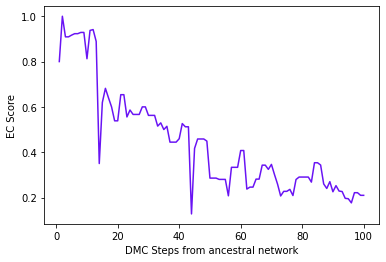

In [16]:
import random
rgb = list(np.random.rand(len(scoreVecVec),3))
#print(list(rgb[1]))
for i in range(0,len(scoreVecVec)):
    print("ok")
    plt.xlabel("DMC Steps from ancestral network")
    plt.ylabel("EC Score")
    plt.plot(childDistVecVec[i],scoreVecVec[i],'-',c=list(rgb[i]))
plt.savefig("plots.pdf")

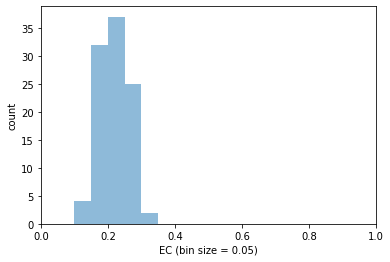

In [47]:
data=scoreVec1
# fixed bin size
bins = np.arange(0, 1, 0.05) # fixed bin size

plt.xlim([0, 1])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('')
plt.xlabel('EC (bin size = 0.05)')
plt.ylabel('count')

plt.show()

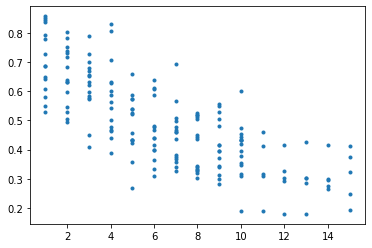

In [6]:
plt.plot(childDistVec,scoreVec,'.')
plt.show()

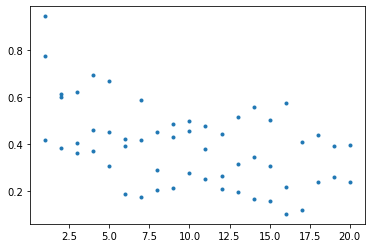

In [16]:
plt.plot(childDistVec1,scoreVec1,'.')
plt.show()

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3)]
4


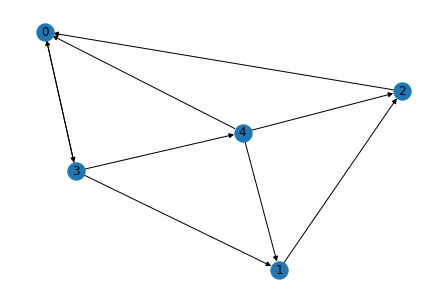

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import gene_functions as gf
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout
n=5
p=0.4
node=4
G_o=gf.gnp_random_graph(n,p,directed=True)
print(G_o.in_degree(node)+G_o.out_degree(node))
origDegree=G_o.in_degree(node)+G_o.out_degree(node)
nx.draw(G_o,with_labels=True)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


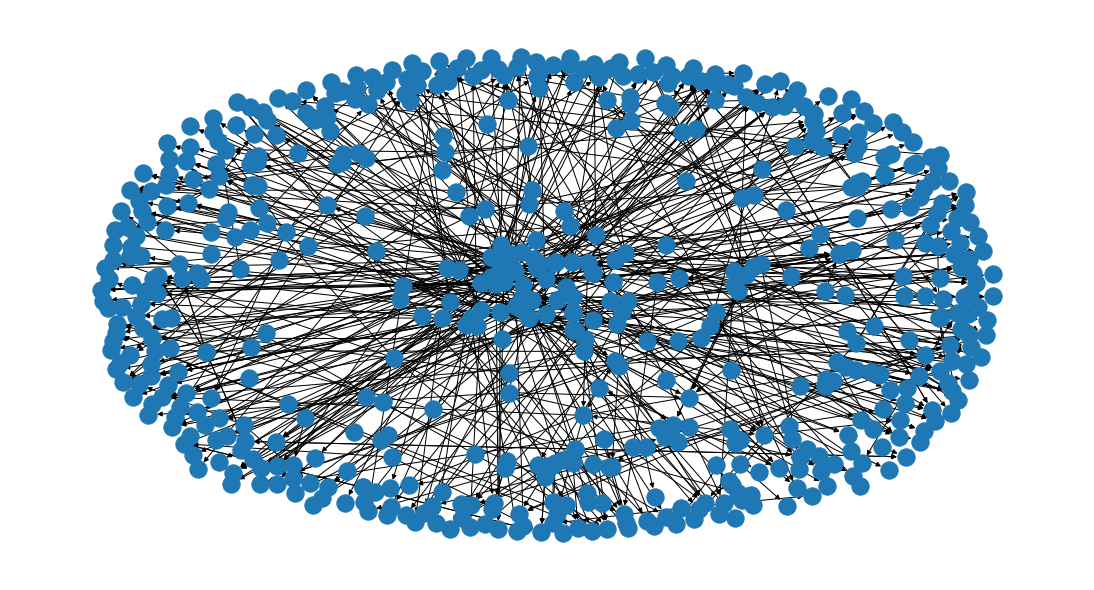

In [2]:
qCon=0
qMod = 0.7
G=G_o
iterations=1000
#G=gf.dmc_modified(G,qCon,qMod,iterations=50)


prod=origDegree

for i in range(0,iterations):
    prod = prod*(1-qMod/(2*(len(list(G.nodes))+i))+(2-qMod)/(2*(len(list(G.nodes))+i)))
    #print(G.out_degree(node)+G.in_degree(node)+(G.out_degree(node)+G.in_degree(node))/len(list(G.nodes))) 
    G=gf.dmc_modified_helper(G,qCon,qMod,iteration=i+1)
    #print(G.out_degree(0)+G.in_degree(0))
    for j in list(G.nodes()):
      if (G.out_degree(j)==0 and G.in_degree(j)==0):
        G.remove_node(j)
      elif G.out_degree(j)==1 and G.in_degree(j)==1 and (j,j) in list(G.edges):
        G.remove_node(j)
    #print(G.out_degree(node)+G.in_degree(node))
    
plt.figure(figsize=(15, 8))
nx.draw(G)
#print(len(list(G.nodes)))
print(len(list(G.nodes)))



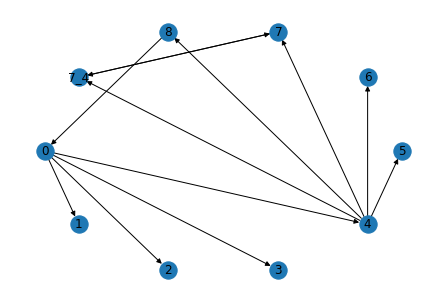

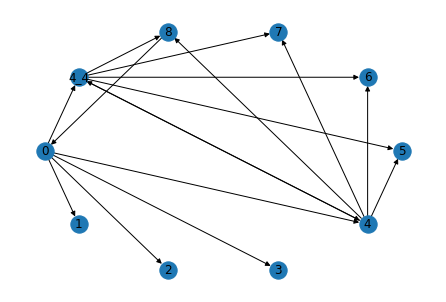

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import gene_functions as gf
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout
r=0
q=1
qCon=0
qMod=1
n=3
p=0.8
G=gf.GRN_seed_graph_ped_pea(0,r,q)


G1,G2=gf.ped_pea_network_birth(G,1,1,r,q,iteration = n)

plt.figure()
nx.draw_shell(G1,with_labels=True)
plt.figure()
nx.draw_shell(G2,with_labels=True)




In [2]:
G1_anc,G2_anc=gf.ancestor_finder_without_alignment_gene_family_separate_ped_pea(G1,G2,r,q,tolerance=1)

list begins
sorting begins
merging begins
(3, '3_4', 2, 0.19999999999999996) 9
chosen (3, '3_4', 2, 0.19999999999999996)
(3, '3_5', 2, 0.19999999999999996) 9
chosen (3, '3_5', 2, 0.19999999999999996)
('3_4', '3_5', 2, 0.19999999999999996) 9
chosen ('3_4', '3_5', 2, 0.19999999999999996)
ay you broke my trigger
out of the merge
(<networkx.classes.digraph.DiGraph object at 0x0000014AE54CC6A0>, <networkx.classes.digraph.DiGraph object at 0x0000014AF55C2190>, 9) 11
list begins
sorting begins
merging begins
(3, '3_5', 2, 0.19999999999999996) 9
chosen (3, '3_5', 2, 0.19999999999999996)
ay you broke my trigger
out of the merge
(<networkx.classes.digraph.DiGraph object at 0x0000014AE54CC6A0>, <networkx.classes.digraph.DiGraph object at 0x0000014AF5716B50>, 9) 11
list begins
sorting begins
merging begins
(6, '6_4', 1, 0.03999999999999998) 9
chosen (6, '6_4', 1, 0.03999999999999998)
ay you broke my trigger
out of the merge
(<networkx.classes.digraph.DiGraph object at 0x0000014AF57295B0>, <network

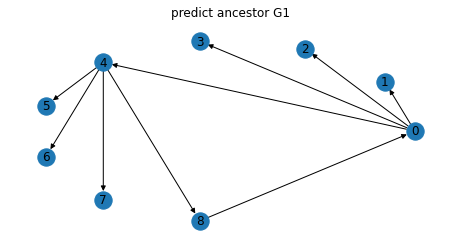

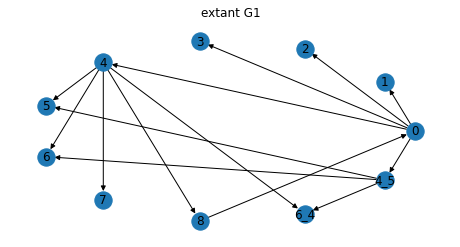

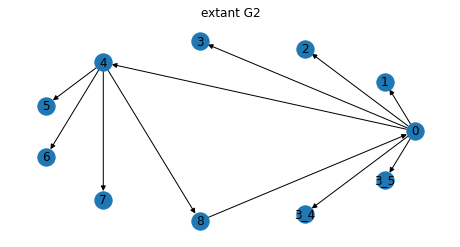

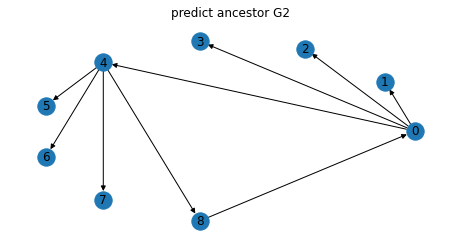

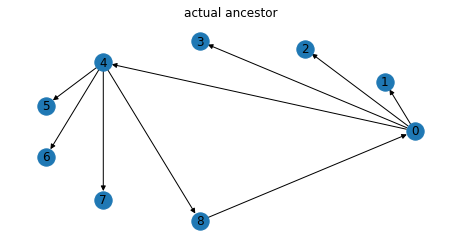

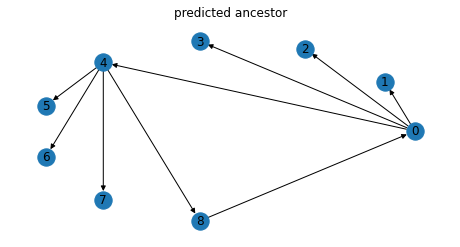

In [3]:
#print(len(G.nodes))
pos = nx.circular_layout(G1)
plt.figure(figsize=(8,4))
plt.title("predict ancestor G1")
nx.draw(G1_anc,with_labels=True,pos=pos)


plt.figure(figsize=(8,4))
plt.title("extant G1")
nx.draw(G1,with_labels=True,pos=pos)

pos = nx.circular_layout(G2)

plt.figure(figsize=(8,4))
plt.title("extant G2")
nx.draw(G2,with_labels=True,pos=pos)

plt.figure(figsize=(8,4))
plt.title("predict ancestor G2")
nx.draw(G2_anc,with_labels=True,pos=pos)

G_int_anc=nx.intersection(G1_anc,G2_anc)

plt.figure(figsize=(8,4))
plt.title("actual ancestor")
nx.draw(G,with_labels=True,pos=pos)
plt.figure(figsize=(8,4))
plt.title("predicted ancestor")
nx.draw(G_int_anc,with_labels=True,pos=pos)

In [22]:

G = nx.read_edgelist("bio-yeast-protein-inter.edges",nodetype=int)

print(G.nodes)
nt = Network('1000px', '1000px',directed=False)

nt.from_nx(G)
nt.show_buttons()
nt.show('nx.html')

[2, 36, 857, 1648, 2010, 2025, 3, 235, 1377, 1489, 4, 672, 1444, 6, 7, 42, 1126, 8, 536, 9, 420, 648, 1646, 10, 1166, 1183, 1621, 11, 614, 680, 1000, 12, 326, 13, 1417, 14, 109, 233, 427, 871, 909, 1057, 1352, 1739, 1754, 15, 123, 366, 687, 1125, 1548, 1715, 1733, 1734, 1735, 1736, 17, 150, 631, 819, 1074, 1843, 18, 482, 1365, 19, 1587, 21, 113, 319, 22, 1093, 1255, 1606, 23, 506, 24, 1219, 1789, 1974, 26, 127, 168, 27, 580, 28, 293, 29, 547, 906, 1536, 1731, 1966, 1967, 30, 1498, 31, 1027, 32, 874, 33, 248, 305, 424, 618, 1169, 1601, 34, 640, 1583, 35, 843, 231, 1007, 1320, 2067, 2068, 37, 249, 393, 509, 691, 900, 929, 1137, 1143, 1382, 1484, 1532, 40, 467, 41, 56, 304, 184, 234, 328, 996, 1015, 1053, 1096, 1296, 1457, 1479, 1631, 1746, 1791, 1923, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 43, 844, 1047, 44, 66, 1399, 45, 46, 920, 48, 784, 1429, 51, 554, 643, 781, 977, 1098, 1388, 52, 1233, 54, 224, 55, 523, 911, 1398, 57, 665, 58, 1165, 59, 60, 61, 395, 978, 63, 64,

[0, 1, '0_1', '1_2', '1_3']
[0, 1, '0_1', '0_2', '1_3']
{0: '0_1', 1: '1_1', '0_1': '0_2', '1_2': '1_2', '1_3': '1_3'}


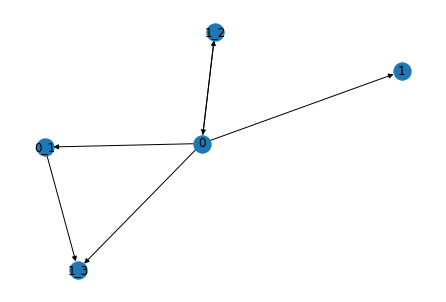

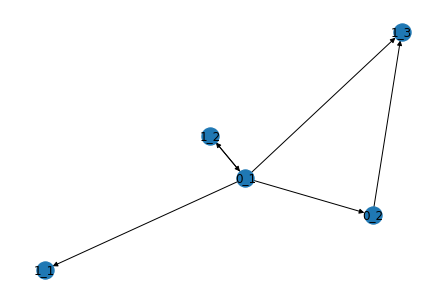

In [2]:
import networkx as nx
from Genetc import gene_functions as gf
from matplotlib import pyplot as plt
G=nx.erdos_renyi_graph(2,0.5)
G=nx.DiGraph(G)
G1,G2=gf.network_birth(G,3,3,0.1,0.4)
nx.draw(G1,with_labels=True)
mapper1=gf.gene_family_relabeller(G1)
mapper2=gf.gene_family_relabeller(G2)
print(mapper1)
G1=nx.relabel_nodes(G1,mapper1)
G2=nx.relabel_nodes(G2,mapper2)
plt.figure()
nx.draw(G1,with_labels=True)

{2: <networkx.classes.digraph.DiGraph object at 0x0000028410554310>, 3: <networkx.classes.digraph.DiGraph object at 0x0000028410541CA0>, 5: <networkx.classes.digraph.DiGraph object at 0x000002847FCD1F70>, 6: <networkx.classes.digraph.DiGraph object at 0x00000284105547F0>}
2 3
g_anc true edge number 469
qMod: 0.4 0
['0', '1', '2', '4', '5', '6', '7', '8', '15', '27', '30', '33', '35', '7_3', '33_5', '5_20', '3', '9', '43', '0_8', '24', '38', '11', '28', '32', '46', '28_1', '46_12', '10', '25', '10_13', '17', '19', '40', '45', '45_18', '16_4', '18', '22', '41', '22_2', '22_10', '20', '31', '49', '31_6', '12', '13', '14', '16', '13_17', '34', '42', '47', '42_9', '34_16', '21', '21_15', '39', '48', '23', '29', '23_14', '33_7', '33_7_11', '33_7_11_19', '44', '26', '37', '36']
['0', '1', '2', '4', '5', '6', '7', '8', '15', '27', '30', '33', '35', '7_3', '33_5', '2_25', '4_27', '3', '9', '43', '0_8', '4_22', '0_26', '24', '38', '11', '28', '32', '46', '28_1', '32_23', '10', '17', '19', '40', 

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


g_anc true edge number 501
['(2, 3)', '(2, 5)', '(2, 6)', '(3, 5)', '(3, 6)', '(5, 6)']


'\nplt.title("Edge Correctness of Estimated Ancestral Networks compared to True Ancestral Networks")\n\n\nplt.xlabel("iteration")\nplt.ylabel("Edge Correctness")\nplt.plot(iterationVec,EC_nf_vec,\'r-\',label="Align then Intersection")\nplt.plot(iterationVec,EC_dmc_vec,\'b-\',label="Zhu-Nakleh Reconstruction")\nplt.plot(iterationVec,EC_orig_vec,\'k-\',label="True Label Intersection")\nplt.plot(iterationVec,EC_unint_vec,\'gold\',label="True Label Unint")\n#plt.plot(iterationVec,EC_find1_vec,\'g-\',label="MyAlg G1")\n#plt.plot(iterationVec,EC_find2_vec,\'y-\',label="MyAlg G2")\nplt.plot(iterationVec,EC_find_int_vec,\'c-\',label="My Algorithm (True Labels)")\nplt.plot(iterationVec,EC_findAl_int_vec,\'m-\',label="My Algorithm (Alignment)")\nplt.plot(iterationVec,EC_true_unint_vec,\'g-\',label="My Algorithm (True unint)")\nplt.plot(iterationVec,EC_align_unint_vec,\'y-\',label="My Algorithm (Align unint)")\n#plt.plot(iterationVec,EC_find_mapped_int_vec,\'m-\',label="MyAlg Alignment")\nplt.leg

<Figure size 864x576 with 0 Axes>

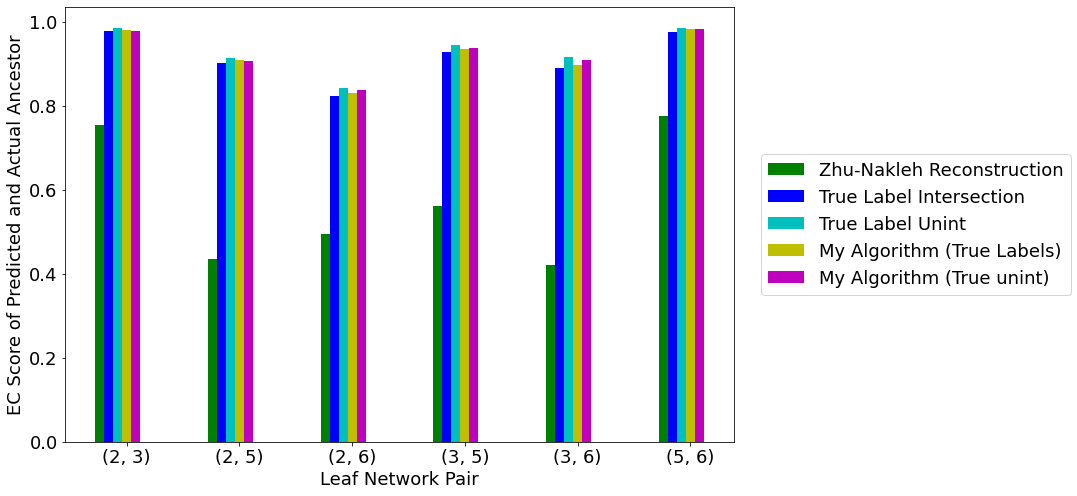

<Figure size 864x576 with 0 Axes>

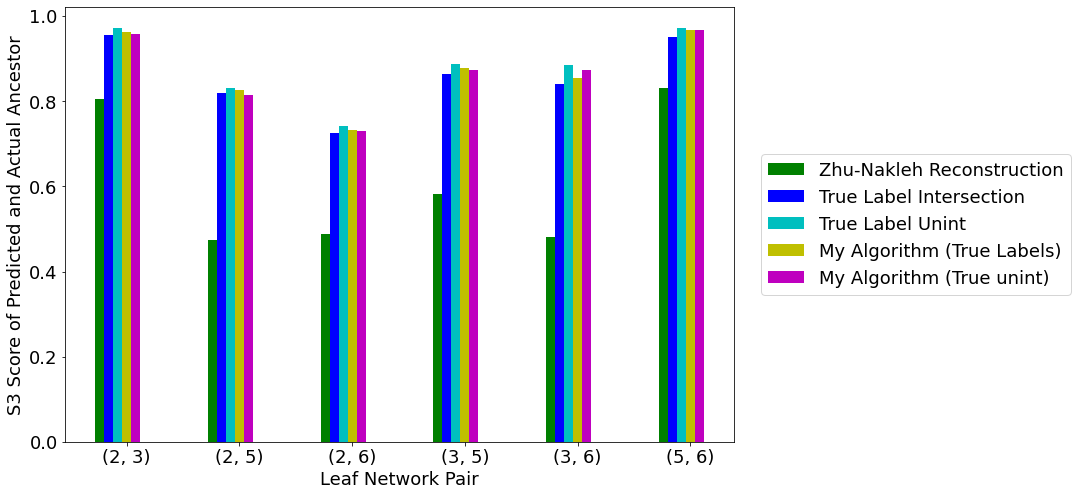

<Figure size 864x576 with 0 Axes>

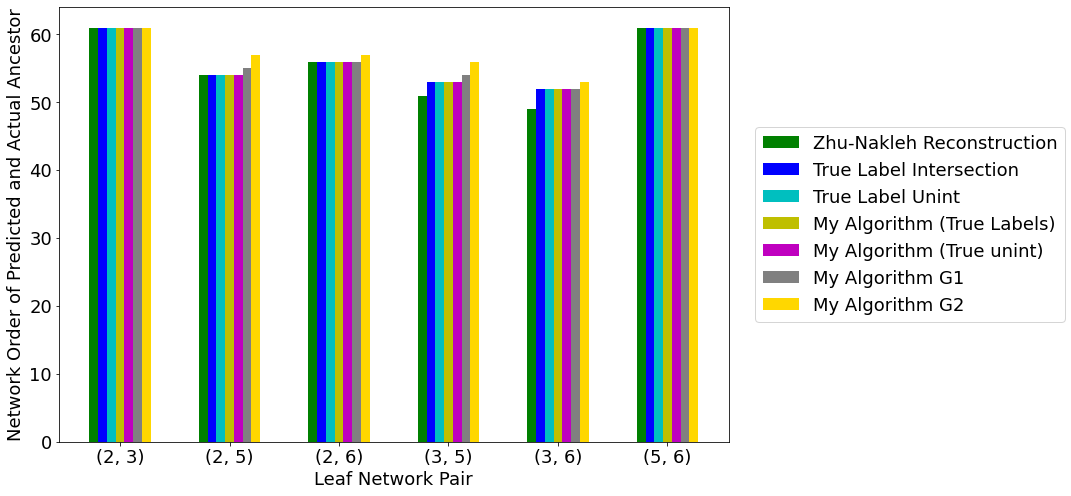

<Figure size 864x576 with 0 Axes>

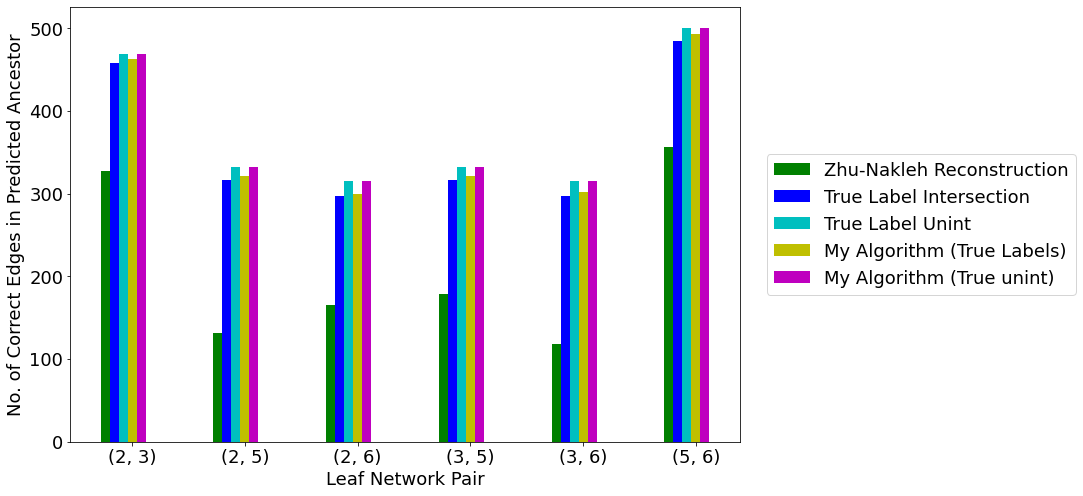

<Figure size 864x576 with 0 Axes>

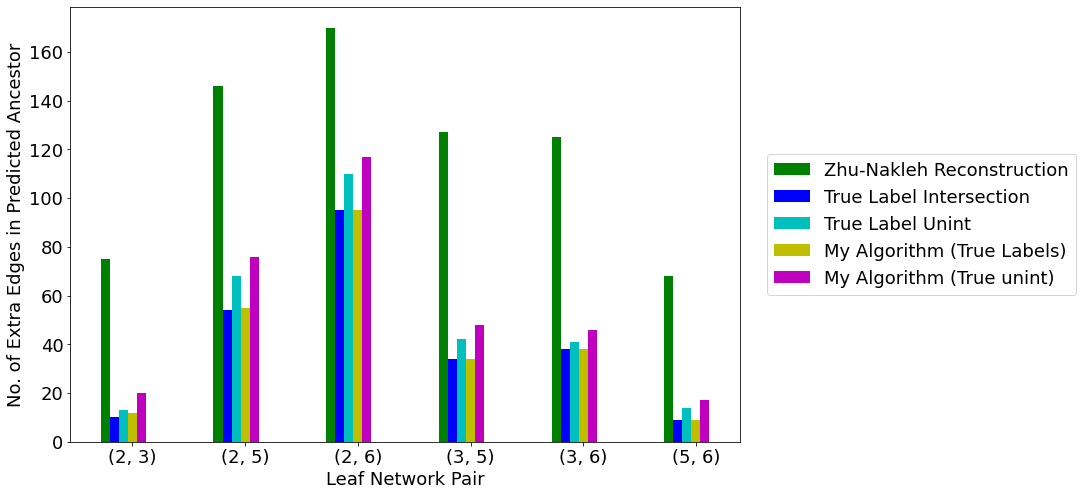

<Figure size 864x576 with 0 Axes>

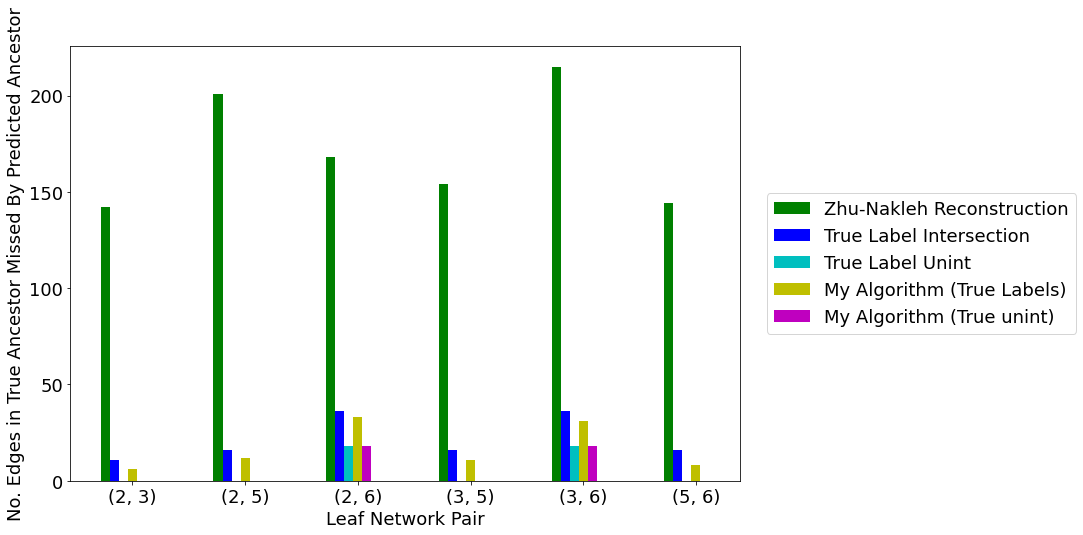

In [1]:
from os import abort
from re import S
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import gene_functions as gf
import scipy as sp
import copy
branchLength=10
algType="gene"

leafGraphs=dict()
internalGraphs=dict()
t=nx.DiGraph()
t.add_edge(0,1)
t.add_edge(1,2)
t.add_edge(1,3)
t.add_edge(0,4)
t.add_edge(4,5)
t.add_edge(4,6)
root = [n for n,d in t.in_degree() if d==0]
leaves = [n for n,d in t.out_degree() if d==0]
for i in range(7):
    if i in leaves:
        leafGraphs[i]= nx.read_edgelist("test_datasets_ancestral/distinct_nodes_test/anc50_2cherry_branch"+str(branchLength)+"/LEAF"+str(i)+"_two_cherry_branchLength"+str(branchLength)+".txt",create_using=nx.DiGraph)
        #leafGraphs[i]= nx.read_edgelist("test_datasets_ancestral/code_quickrun/LEAF"+str(i)+"_two_cherry_branchLength"+str(branchLength)+".txt",create_using=nx.DiGraph)

    else:
        #internalGraphs[i]= nx.read_edgelist("test_datasets_ancestral/code_quickrun/INTERNAL"+str(i)+"_two_cherry_branchLength"+str(branchLength)+".txt",create_using=nx.DiGraph)

        internalGraphs[i]= nx.read_edgelist("test_datasets_ancestral/distinct_nodes_test/anc50_2cherry_branch"+str(branchLength)+"/INTERNAL"+str(i)+"_two_cherry_branchLength"+str(branchLength)+".txt",create_using=nx.DiGraph)
G_anc_dict=dict()
G_anc_dict[(2,3)]=internalGraphs[1]
G_anc_dict[(3,2)]=internalGraphs[1]
G_anc_dict[(5,6)]=internalGraphs[4]
G_anc_dict[(6,5)]=internalGraphs[4]

G_anc_dict[(2,5)]=internalGraphs[0]
G_anc_dict[(5,2)]=internalGraphs[0]
G_anc_dict[(6,2)]=internalGraphs[0]
G_anc_dict[(2,6)]=internalGraphs[0]
G_anc_dict[(3,6)]=internalGraphs[0]
G_anc_dict[(6,3)]=internalGraphs[0]
G_anc_dict[(3,5)]=internalGraphs[0]
G_anc_dict[(5,3)]=internalGraphs[0]

qMod=0.4
qCon=0.1
iterations=1

iterationVec=[i for i in range(iterations)]

S3_nf_vec=dict()
S3_dmc_vec=dict()
S3_orig_vec=dict()
EC_nf_vec=dict()
EC_dmc_vec=dict()
EC_orig_vec=dict()
ICS_nf_vec=dict()
ICS_dmc_vec=dict()
ICS_orig_vec=dict()
new_metric_nf_vec=dict()
new_metric_dmc_vec=dict()
new_metric_orig_vec=dict()
network_order_dmc=dict()
network_order_nf=dict()
network_order_orig=dict()
EC_find1_vec=dict()
ICS_find1_vec=dict()
S3_find1_vec=dict()
network_order_find1=dict()
EC_find2_vec=dict()
ICS_find2_vec=dict()
S3_find2_vec=dict()
network_order_find2=dict()
EC_find_int_vec=dict()
ICS_find_int_vec=dict()
S3_find_int_vec=dict()
network_order_find_int=dict()
EC_find_mapped_int_vec=dict()
ICS_find_mapped_int_vec=dict()
S3_find_mapped_int_vec=dict()
network_order_int_mapped=dict()
EC_findAl1_vec=dict()
ICS_findAl1_vec=dict()
S3_findAl1_vec=dict()
network_order_findAl1=dict()
EC_findAl2_vec=dict()
ICS_findAl2_vec=dict()
S3_findAl2_vec=dict()
network_order_findAl2=dict()
EC_findAl_int_vec=dict()
ICS_findAl_int_vec=dict()
S3_findAl_int_vec=dict()
network_order_findAl_int=dict()
EC_findAl_mapped_int_vec=dict()
ICS_findAl_mapped_int_vec=dict()
S3_findAl_mapped_int_vec=dict()
network_order_int_mapped=dict()
EC_true_unint_vec=dict()
ICS_true_unint_vec=dict()
S3_true_unint_vec=dict()
network_order_true_unint=dict()
EC_align_unint_vec=dict()
ICS_align_unint_vec=dict()
S3_align_unint_vec=dict()
network_order_align_unint=dict()
EC_unint_vec=dict()
ICS_unint_vec=dict()
S3_unint_vec=dict()
network_order_unint=dict()

conserved_dmc_vec=dict()
conserved_orig_vec=dict()
conserved_unint_vec=dict()
conserved_true_unint_vec=dict()
conserved_find_int_vec=dict()
extra_edges_dmc_vec=dict()
extra_edges_orig_vec=dict()
extra_edges_unint_vec=dict()
extra_edges_true_unint_vec=dict()
extra_edges_find_int_vec=dict()
missed_edges_dmc_vec=dict()
missed_edges_orig_vec=dict()
missed_edges_unint_vec=dict()
missed_edges_true_unint_vec=dict()
missed_edges_find_int_vec=dict()
print(leafGraphs)
for l in leafGraphs:
    for m in leafGraphs:
        if m>l:
            print(l,m)
            G1=leafGraphs[l]
            G2=leafGraphs[m]
            G_anc=G_anc_dict[(l,m)] 
            G_anc=gf.label_conserver(G_anc)
            print("g_anc true edge number",len(G_anc.edges()))  
            G1=gf.label_conserver(G1)
            G2=gf.label_conserver(G2)
            
            for k in range(0,iterations):
                print("qMod:",qMod,k)
                #True label My ancestral algorithm

                G1_orig=copy.deepcopy(G1)
                G2_orig=copy.deepcopy(G2)
                mapper1=gf.gene_family_relabeller(G1_orig)
                mapper2=gf.gene_family_relabeller(G2_orig)
                G1_orig=nx.relabel_nodes(G1_orig,mapper1)
                G2_orig=nx.relabel_nodes(G2_orig,mapper2)
                #initial alignment
                '''
                G1_labelless=nx.convert_node_labels_to_integers(G1_orig)
                G2_labelless=nx.convert_node_labels_to_integers(G2_orig)
                G1=nx.convert_node_labels_to_integers(G1_orig)
                G2=nx.convert_node_labels_to_integers(G2_orig)
                alignVec,mapped=gf.NF(G1,G2,32,0.8)
                mapping = dict(alignVec)
                
                G1_mapped=nx.induced_subgraph(G1,list(mapped))
                G1_mapped=nx.relabel_nodes(G1_mapped,mapping)
                '''

                t=1
                tEC=0
                if algType=="orig":
                    G_anc_find1,G_anc_find2=gf.ancestor_finder_without_alignment_the_seventh(G1_orig,G2_orig,qMod,qCon,tolerance=t,toleranceEC=tEC)
                if algType=="core":
                    G_anc_find1,G_anc_find2=gf.ancestor_finder_without_alignment_the_fifth(G1_orig,G2_orig,qMod,qCon,tolerance=t,toleranceEC=tEC)
                if algType=="branch":
                    G_anc_find1,G_anc_find2=gf.ancestor_finder_without_alignment_branching(G1_orig,G2_orig,qMod,qCon,tolerance=t,toleranceEC=tEC)
                if algType=="gene":
                    G_anc_find1,G_anc_find2=gf.ancestor_finder_without_alignment_gene_family_separate(G1_orig,G2_orig,qMod,qCon,tolerance=t,toleranceEC=tEC)
               
                else:
                    exit
                print("ancestor found")
                G_find_int_anc=nx.intersection(G_anc_find1,G_anc_find2)
                print("my alg edge number int",len(G_find_int_anc.edges()))
                G_true_unint=gf.graph_intersection_union(G_anc_find1,G_anc_find2)
                print("my alg edge number unint",len(G_true_unint.edges()))
                mapping=dict()
                for i in list(G_find_int_anc.nodes):
                    mapping[i]=G_anc_find1.nodes[i]['orig_label']

                G_true_unint=nx.relabel_nodes(G_true_unint,mapping)    
                EC_true_unint_vec[str((l,m))]=gf.normalised_ec_score(G_true_unint,G_anc)
                ICS_true_unint_vec[str((l,m))]=gf.ics_score(G_true_unint,G_anc)
                S3_true_unint_vec[str((l,m))]=gf.s3_score(G_true_unint,G_anc)
                conservedEdges=gf.conserved_edges(G_true_unint,G_anc)
                conserved_true_unint_vec[str((l,m))]=conservedEdges
                extra_edges_true_unint_vec[str((l,m))]=len(G_true_unint.edges)-conservedEdges
                missed_edges_true_unint_vec[str((l,m))]=len(G_anc.edges)-conservedEdges
                network_order_true_unint[str((l,m))]=len(G_true_unint.nodes)
                for j in list(G_find_int_anc.nodes()):
                    if (G_find_int_anc.out_degree(j)==0 and G_find_int_anc.in_degree(j)==0):
                        G_find_int_anc.remove_node(j)
                    elif G_find_int_anc.out_degree(j)==1 and G_find_int_anc.in_degree(j)==1 and (j,j) in list(G_find_int_anc.edges):
                        G_find_int_anc.remove_node(j)
                
                
                
                G_find_int_anc=nx.relabel_nodes(G_find_int_anc,mapping)

                EC_find_int_vec[str((l,m))]=gf.normalised_ec_score(G_find_int_anc,G_anc)
                ICS_find_int_vec[str((l,m))]=gf.ics_score(G_find_int_anc,G_anc)
                S3_find_int_vec[str((l,m))]=gf.s3_score(G_find_int_anc,G_anc)
                conservedEdges=gf.conserved_edges(G_find_int_anc,G_anc)
                conserved_find_int_vec[str((l,m))]=conservedEdges
                extra_edges_find_int_vec[str((l,m))]=len(G_find_int_anc.edges)-conservedEdges
                missed_edges_find_int_vec[str((l,m))]=len(G_anc.edges)-conservedEdges
                network_order_find_int[str((l,m))]=len(G_find_int_anc.nodes)

                for j in list(G_anc_find1.nodes()):
                    if (G_anc_find1.out_degree(j)==0 and G_anc_find1.in_degree(j)==0):
                        G_anc_find1.remove_node(j)
                    elif G_anc_find1.out_degree(j)==1 and G_anc_find1.in_degree(j)==1 and (j,j) in list(G_anc_find1.edges):
                        G_anc_find1.remove_node(j)

                mapping=dict()
                for i in list(G_anc_find1.nodes):
                    mapping[i]=G_anc_find1.nodes[i]['orig_label']
                G_find1_anc=nx.relabel_nodes(G_anc_find1,mapping)
                
                EC_find1_vec[str((l,m))]=gf.normalised_ec_score(G_find1_anc,G_anc)
                ICS_find1_vec[str((l,m))]=gf.ics_score(G_find1_anc,G_anc)
                S3_find1_vec[str((l,m))]=gf.s3_score(G_find1_anc,G_anc)
                network_order_find1[str((l,m))]=len(G_find1_anc.nodes)
                
                for j in list(G_anc_find2.nodes()):
                    if (G_anc_find2.out_degree(j)==0 and G_anc_find2.in_degree(j)==0):
                        G_anc_find2.remove_node(j)
                    elif G_anc_find2.out_degree(j)==1 and G_anc_find2.in_degree(j)==1 and (j,j) in list(G_anc_find2.edges):
                        G_anc_find2.remove_node(j)
                
                mapping=dict()
                for i in list(G_anc_find2.nodes):
                    mapping[i]=G_anc_find2.nodes[i]['orig_label']
                G_find2_anc=nx.relabel_nodes(G_anc_find2,mapping)

                EC_find2_vec[str((l,m))]=gf.normalised_ec_score(G_find2_anc,G_anc)
                ICS_find2_vec[str((l,m))]=gf.ics_score(G_find2_anc,G_anc)
                S3_find2_vec[str((l,m))]=gf.s3_score(G_find2_anc,G_anc)
                network_order_find2[str((l,m))]=len(G_find2_anc.nodes)

                nx.write_edgelist(G_find_int_anc,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/myalg_int_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                nx.write_edgelist(G_true_unint,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/myalg_unint_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                nx.write_edgelist(G_find1_anc,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/myalgG"+str(l)+"_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                nx.write_edgelist(G_find2_anc,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/myalgG"+str(m)+"_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                
                #Zhu-Nakleh Reconstruction
                G1_orig=copy.deepcopy(G1)
                G2_orig=copy.deepcopy(G2)
                G_dmc_anc=gf.dmc_anc_rec(G1_orig,G2_orig,qMod,qCon)
                for j in list(G_dmc_anc.nodes()):
                    if (G_dmc_anc.out_degree(j)==0 and G_dmc_anc.in_degree(j)==0):
                        G_dmc_anc.remove_node(j)
                    elif G_dmc_anc.out_degree(j)==1 and G_dmc_anc.in_degree(j)==1 and (j,j) in list(G_dmc_anc.edges):
                        G_dmc_anc.remove_node(j)
                
                EC_dmc_vec[str((l,m))]=gf.normalised_ec_score(G_dmc_anc,G_anc)
                ICS_dmc_vec[str((l,m))]=gf.ics_score(G_dmc_anc,G_anc)
                S3_dmc_vec[str((l,m))]=gf.s3_score(G_dmc_anc,G_anc)
                conservedEdges=gf.conserved_edges(G_dmc_anc,G_anc)
                conserved_dmc_vec[str((l,m))]=conservedEdges
                extra_edges_dmc_vec[str((l,m))]=len(G_dmc_anc.edges)-conservedEdges
                missed_edges_dmc_vec[str((l,m))]=len(G_anc.edges)-conservedEdges
                network_order_dmc[str((l,m))]=len(G_dmc_anc.nodes)
                nx.write_edgelist(G_dmc_anc,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/dmc_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                '''
                #NF Align then intersect
                G1_orig=copy.deepcopy(G1)
                G2_orig=copy.deepcopy(G2)

                G1_labelless=nx.convert_node_labels_to_integers(G1_orig)
                G2_labelless=nx.convert_node_labels_to_integers(G2_orig)
                alignVec,mapped=gf.NF(G1_labelless,G2_labelless,32,0.8)
                mapping = dict(alignVec)

                G1_mapped=nx.induced_subgraph(G1_labelless,list(mapped))
                G1_mapped=nx.relabel_nodes(G1_mapped,mapping)

                G_intersect=nx.intersection(G1_mapped,G2_labelless)

                for j in list(G_intersect.nodes()):
                    if (G_intersect.out_degree(j)==0 and G_intersect.in_degree(j)==0):
                        G_intersect.remove_node(j)
                    elif G_intersect.out_degree(j)==1 and G_intersect.in_degree(j)==1 and (j,j) in list(G_intersect.edges):
                        G_intersect.remove_node(j)

                mapping=dict()
                for i in list(G_intersect.nodes):
                    mapping[i]=G_intersect.nodes[i]['orig_label']
                G_nf_anc=nx.relabel_nodes(G_intersect,mapping)
                
                EC_nf_vec[str((l,m))]=gf.normalised_ec_score(G_nf_anc,G_anc)
                ICS_nf_vec[str((l,m))]=gf.ics_score(G_nf_anc,G_anc)
                S3_nf_vec[str((l,m))]=gf.s3_score(G_nf_anc,G_anc)
                network_order_nf[str((l,m))]=len(G_nf_anc.nodes)
                nx.write_edgelist(G_nf_anc,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/nf_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                '''
                #True Label Intersection
                G1_orig=copy.deepcopy(G1)
                G2_orig=copy.deepcopy(G2)
                G1_orig=nx.relabel_nodes(G1_orig,mapper1)
                G2_orig=nx.relabel_nodes(G2_orig,mapper2)
                
                G_intersect=nx.intersection(G1_orig,G2_orig)
                print("intersect edge number",len(G_intersect.edges()))

                for j in list(G_intersect.nodes()):
                    if (G_intersect.out_degree(j)==0 and G_intersect.in_degree(j)==0):
                        G_intersect.remove_node(j)
                    elif G_intersect.out_degree(j)==1 and G_intersect.in_degree(j)==1 and (j,j) in list(G_intersect.edges):
                        G_intersect.remove_node(j)
                mapping=dict()
                for i in list(G_intersect.nodes):
                    mapping[i]=G1_orig.nodes[i]['orig_label']
                G_intersect=nx.relabel_nodes(G_intersect,mapping)

                G_orig_anc=G_intersect
                
                EC_orig_vec[str((l,m))]=gf.normalised_ec_score(G_orig_anc,G_anc)
                ICS_orig_vec[str((l,m))]=gf.ics_score(G_orig_anc,G_anc)
                S3_orig_vec[str((l,m))]=gf.s3_score(G_orig_anc,G_anc)
                conservedEdges=gf.conserved_edges(G_orig_anc,G_anc)
                conserved_orig_vec[str((l,m))]=conservedEdges
                extra_edges_orig_vec[str((l,m))]=len(G_orig_anc.edges)-conservedEdges
                missed_edges_orig_vec[str((l,m))]=len(G_anc.edges)-conservedEdges
                network_order_orig[str((l,m))]=len(G_orig_anc.nodes)

                G_unint_anc=gf.graph_intersection_union(G1_orig,G2_orig)
                mapping=dict()
                for i in list(G_unint_anc.nodes):
                    mapping[i]=G1_orig.nodes[i]['orig_label']
                G_unint_anc=nx.relabel_nodes(G_unint_anc,mapping)
                EC_unint_vec[str((l,m))]=gf.normalised_ec_score(G_unint_anc,G_anc)
                ICS_unint_vec[str((l,m))]=gf.ics_score(G_unint_anc,G_anc)
                S3_unint_vec[str((l,m))]=gf.s3_score(G_unint_anc,G_anc)
                conservedEdges=gf.conserved_edges(G_unint_anc,G_anc)
                conserved_unint_vec[str((l,m))]=conservedEdges
                extra_edges_unint_vec[str((l,m))]=len(G_unint_anc.edges)-conservedEdges
                missed_edges_unint_vec[str((l,m))]=len(G_anc.edges)-conservedEdges
                network_order_unint[str((l,m))]=len(G_unint_anc.nodes)
                
                nx.write_edgelist(G_orig_anc,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/intersect_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                nx.write_edgelist(G_unint_anc,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/unint_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                print("g_anc true edge number",len(G_anc.edges())) 
                '''
                #Align then apply my algorithm

                G1_orig=copy.deepcopy(G1)
                G2_orig=copy.deepcopy(G2)
                #initial alignment
                
                G1_labelless=nx.convert_node_labels_to_integers(G1_orig)
                G2_labelless=nx.convert_node_labels_to_integers(G2_orig)
                G1_align=nx.convert_node_labels_to_integers(G1_orig)
                G2_align=nx.convert_node_labels_to_integers(G2_orig)
                alignVec,mapped=gf.NF(G1_align,G2_align,32,0.8)
                mapping = dict(alignVec)
                
                G1_mapped=nx.induced_subgraph(G1_align,list(mapped))
                G1_mapped=nx.relabel_nodes(G1_mapped,mapping)
                
                
                tolLike=0
                tolSim=0
                G_anc_find1,G_anc_find2=gf.ancestor_finder_without_alignment_alt_alt_alt_alt(G1_align,G2_align,qMod,qCon,tolerance=tolLike,toleranceEC=tolSim)
                print("ancestor found")
                G_find_int_anc=nx.intersection(G_anc_find1,G_anc_find2)
                print("my alg edge number",len(G_find_int_anc.edges()))
                G_align_unint=gf.graph_intersection_union(G_anc_find1,G_anc_find2)
                print("my alg edge number unint",len(G_align_unint.edges()))
                
                
                for j in list(G_find_int_anc.nodes()):
                    if (G_find_int_anc.out_degree(j)==0 and G_find_int_anc.in_degree(j)==0):
                        G_find_int_anc.remove_node(j)
                    elif G_find_int_anc.out_degree(j)==1 and G_find_int_anc.in_degree(j)==1 and (j,j) in list(G_find_int_anc.edges):
                        G_find_int_anc.remove_node(j)
                
                mapping=dict()
                for i in list(G_find_int_anc.nodes):
                    mapping[i]=G_anc_find1.nodes[i]['orig_label']
                G_find_int_anc=nx.relabel_nodes(G_find_int_anc,mapping)

                EC_findAl_int_vec[str((l,m))]=gf.normalised_ec_score(G_find_int_anc,G_anc)
                ICS_findAl_int_vec[str((l,m))]=gf.ics_score(G_find_int_anc,G_anc)
                S3_findAl_int_vec[str((l,m))]=gf.s3_score(G_find_int_anc,G_anc)
                network_order_findAl_int[str((l,m))]=len(G_find_int_anc.nodes)

                for j in list(G_align_unint.nodes()):
                    if (G_align_unint.out_degree(j)==0 and G_align_unint.in_degree(j)==0):
                        G_align_unint.remove_node(j)
                    elif G_align_unint.out_degree(j)==1 and G_align_unint.in_degree(j)==1 and (j,j) in list(G_align_unint.edges):
                        G_align_unint.remove_node(j)
                
                mapping=dict()
                for i in list(G_align_unint.nodes):
                    mapping[i]=G_anc_find1.nodes[i]['orig_label']
                G_align_unint=nx.relabel_nodes(G_align_unint,mapping)

                EC_align_unint_vec[str((l,m))]=gf.normalised_ec_score(G_align_unint,G_anc)
                ICS_align_unint_vec[str((l,m))]=gf.ics_score(G_align_unint,G_anc)
                S3_align_unint_vec[str((l,m))]=gf.s3_score(G_align_unint,G_anc)
                network_order_align_unint[str((l,m))]=len(G_align_unint.nodes)

                for j in list(G_anc_find1.nodes()):
                    if (G_anc_find1.out_degree(j)==0 and G_anc_find1.in_degree(j)==0):
                        G_anc_find1.remove_node(j)
                    elif G_anc_find1.out_degree(j)==1 and G_anc_find1.in_degree(j)==1 and (j,j) in list(G_anc_find1.edges):
                        G_anc_find1.remove_node(j)

                mapping=dict()
                for i in list(G_anc_find1.nodes):
                    mapping[i]=G_anc_find1.nodes[i]['orig_label']
                G_find1_anc=nx.relabel_nodes(G_anc_find1,mapping)
                
                EC_findAl1_vec[str((l,m))]=gf.normalised_ec_score(G_find1_anc,G_anc)
                ICS_findAl1_vec[str((l,m))]=gf.ics_score(G_find1_anc,G_anc)
                S3_findAl1_vec[str((l,m))]=gf.s3_score(G_find1_anc,G_anc)
                network_order_findAl1[str((l,m))]=len(G_find1_anc.nodes)

                for j in list(G_anc_find2.nodes()):
                    if (G_anc_find2.out_degree(j)==0 and G_anc_find2.in_degree(j)==0):
                        G_anc_find2.remove_node(j)
                    elif G_anc_find2.out_degree(j)==1 and G_anc_find2.in_degree(j)==1 and (j,j) in list(G_anc_find2.edges):
                        G_anc_find2.remove_node(j)
                
                mapping=dict()
                for i in list(G_anc_find2.nodes):
                    mapping[i]=G_anc_find2.nodes[i]['orig_label']
                G_find2_anc=nx.relabel_nodes(G_anc_find2,mapping)

                EC_findAl2_vec[str((l,m))]=gf.normalised_ec_score(G_find2_anc,G_anc)
                ICS_findAl2_vec[str((l,m))]=gf.ics_score(G_find2_anc,G_anc)
                S3_findAl2_vec[str((l,m))]=gf.s3_score(G_find2_anc,G_anc)
                network_order_findAl2[str((l,m))]=len(G_find2_anc.nodes)

                nx.write_edgelist(G_find_int_anc,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/myalg_align_int_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                nx.write_edgelist(G_align_unint,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/myalg_align_unint_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                nx.write_edgelist(G_find1_anc,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/myalgG"+str(l)+"_align_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                nx.write_edgelist(G_find2_anc,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/myalgG"+str(m)+"_align_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                '''
                '''
                G_anc_find1=nx.convert_node_labels_to_integers(G_anc_find1)
                G_anc_find2=nx.convert_node_labels_to_integers(G_anc_find2)
                alignVec,mapped=gf.NF_many_to_one(G_anc_find1,G_anc_find2,32,0.8)
                mapping = dict(alignVec)
                
                G_anc_find1_mapped=nx.induced_subgraph(G_anc_find1,list(mapped))
                G_anc_find1_mapped=nx.relabel_nodes(G_anc_find1_mapped,mapping)

                for j in list(G_anc_find1_mapped.nodes()):
                    if (G_anc_find1_mapped.out_degree(j)==0 and G_anc_find1_mapped.in_degree(j)==0):
                        G_anc_find1_mapped.remove_node(j)
                    elif G_anc_find1_mapped.out_degree(j)==1 and G_anc_find1_mapped.in_degree(j)==1 and (j,j) in list(G_anc_find1_mapped.edges):
                        G_anc_find1_mapped.remove_node(j)
                
                mapping=dict()
                for i in list(G_anc_find1_mapped.nodes):
                    mapping[i]=G_anc_find1_mapped.nodes[i]['orig_label']
                G_anc_find1_mapped=nx.relabel_nodes(G_anc_find1_mapped,mapping)

                EC_find_mapped_int_vec[str((l,m))]=gf.normalised_ec_score(G_anc_find1_mapped,G_anc))
                ICS_find_mapped_int_vec[str((l,m))]=gf.ics_score(G_anc_find1_mapped,G_anc))
                S3_find_mapped_int_vec[str((l,m))]=gf.s3_score(G_anc_find1_mapped,G_anc))
                network_order_int_mapped[str((l,m))]=len(G_anc_find1_mapped.nodes))
                '''
'''                
gf.write_dict_to_file(extra_edges_dmc_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/extra_edges_dmc_vec.txt")
gf.write_dict_to_file(extra_edges_orig_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/extra_edges_orig_vec.txt")
gf.write_dict_to_file(extra_edges_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/extra_edges_unint_vec.txt")
gf.write_dict_to_file(extra_edges_true_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/extra_edges_true_unint_vec.txt")
gf.write_dict_to_file(extra_edges_find_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/extra_edges_find_int_vec.txt")
gf.write_dict_to_file(missed_edges_dmc_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/missed_edges_dmc_vec.txt")
gf.write_dict_to_file(missed_edges_orig_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/missed_edges_orig_vec.txt")
gf.write_dict_to_file(missed_edges_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/missed_edges_unint_vec.txt")
gf.write_dict_to_file(missed_edges_true_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/missed_edges_true_unint_vec.txt")
gf.write_dict_to_file(missed_edges_find_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/missed_edges_find_int_vec.txt")
gf.write_dict_to_file(conserved_dmc_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/conserved_dmc_vec.txt")
gf.write_dict_to_file(conserved_orig_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/conserved_orig_vec.txt")
gf.write_dict_to_file(conserved_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/conserved_unint_vec.txt")
gf.write_dict_to_file(conserved_true_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/conserved_true_unint_vec.txt")
gf.write_dict_to_file(conserved_find_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/conserved_find_int_vec.txt")
gf.write_dict_to_file(S3_nf_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_nf_vec.txt")
gf.write_dict_to_file(S3_dmc_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_dmc_vec.txt")
gf.write_dict_to_file(S3_orig_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_orig_vec.txt")
gf.write_dict_to_file(EC_nf_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_nf_vec.txt")
gf.write_dict_to_file(EC_dmc_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_dmc_vec.txt")
gf.write_dict_to_file(EC_orig_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_orig_vec.txt")
gf.write_dict_to_file(ICS_nf_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_nf_vec.txt")
gf.write_dict_to_file(ICS_dmc_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_dmc_vec.txt")
gf.write_dict_to_file(ICS_orig_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_orig_vec.txt")
gf.write_dict_to_file(network_order_dmc,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_dmc.txt")
gf.write_dict_to_file(network_order_nf,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_nf.txt")
gf.write_dict_to_file(network_order_orig,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_orig.txt")
gf.write_dict_to_file(EC_find1_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_find1_vec.txt")
gf.write_dict_to_file(ICS_find1_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_find1_vec.txt")
gf.write_dict_to_file(S3_find1_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_find1_vec.txt")
gf.write_dict_to_file(network_order_find1,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_find1.txt")
gf.write_dict_to_file(EC_find2_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_find2_vec.txt")
gf.write_dict_to_file(ICS_find2_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_find2_vec.txt")
gf.write_dict_to_file(S3_find2_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_find2_vec.txt")
gf.write_dict_to_file(network_order_find2,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_find2.txt")
gf.write_dict_to_file(EC_find_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_find_int_vec.txt")
gf.write_dict_to_file(ICS_find_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_find_int_vec.txt")
gf.write_dict_to_file(S3_find_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_find_int_vec.txt")
gf.write_dict_to_file(network_order_find_int,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_find_int.txt")
gf.write_dict_to_file(EC_find_mapped_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_find_mapped_int_vec.txt")
gf.write_dict_to_file(ICS_find_mapped_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_find_mapped_int_vec.txt")
gf.write_dict_to_file(S3_find_mapped_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_find_mapped_int_vec.txt")
gf.write_dict_to_file(network_order_int_mapped,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_int_mapped.txt")
gf.write_dict_to_file(EC_findAl1_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_findAl1_vec.txt")
gf.write_dict_to_file(ICS_findAl1_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_findAl1_vec.txt")
gf.write_dict_to_file(S3_findAl1_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_findAl1_vec.txt")
gf.write_dict_to_file(network_order_findAl1,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_findAl1.txt")
gf.write_dict_to_file(EC_findAl2_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_findAl2_vec.txt")
gf.write_dict_to_file(ICS_findAl2_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_findAl2_vec.txt")
gf.write_dict_to_file(S3_findAl2_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_findAl2_vec.txt")
gf.write_dict_to_file(network_order_findAl2,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_findAl2.txt")
gf.write_dict_to_file(EC_findAl_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_findAl_int_vec.txt")
gf.write_dict_to_file(ICS_findAl_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_findAl_int_vec.txt")
gf.write_dict_to_file(S3_findAl_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_findAl_int_vec.txt")
gf.write_dict_to_file(network_order_findAl_int,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_findAl_int.txt")
gf.write_dict_to_file(EC_findAl_mapped_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_findAl_mapped_int_vec.txt")
gf.write_dict_to_file(ICS_findAl_mapped_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_findAl_mapped_int_vec.txt")
gf.write_dict_to_file(S3_findAl_mapped_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_findAl_mapped_int_vec.txt")
gf.write_dict_to_file(network_order_int_mapped,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_int_mapped.txt")
gf.write_dict_to_file(EC_true_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_true_unint_vec.txt")
gf.write_dict_to_file(ICS_true_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_true_unint_vec.txt")
gf.write_dict_to_file(S3_true_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_true_unint_vec.txt")
gf.write_dict_to_file(network_order_true_unint,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_true_unint.txt")
gf.write_dict_to_file(EC_align_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_align_unint_vec.txt")
gf.write_dict_to_file(ICS_align_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_align_unint_vec.txt")
gf.write_dict_to_file(S3_align_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_align_unint_vec.txt")
gf.write_dict_to_file(network_order_align_unint,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_align_unint.txt")
gf.write_dict_to_file(EC_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_unint_vec.txt")
gf.write_dict_to_file(ICS_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_unint_vec.txt")
gf.write_dict_to_file(S3_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_unint_vec.txt")
gf.write_dict_to_file(network_order_unint,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_unint.txt")
'''
pairs_vec=[]

EC_nf=[]
EC_dmc=[]
EC_orig=[]
EC_unint=[]
EC_find_int=[]
EC_findAl_int=[]
EC_true_unint=[]
EC_align_unint=[]

S3_nf=[]
S3_dmc=[]
S3_orig=[]
S3_unint=[]
S3_find_int=[]
S3_findAl_int=[]
S3_true_unint=[]
S3_align_unint=[]

net_order_nf=[]
net_order_dmc=[]
net_order_orig=[]
net_order_find1=[]
net_order_find2=[]
net_order_find_int=[]
net_order_findAl_int=[]
net_order_true_unint=[]
net_order_align_unint=[]
net_order_unint=[]

conserved_dmc=[]
conserved_orig=[]
conserved_unint=[]
conserved_true_unint=[]
conserved_find_int=[]

extra_edges_dmc=[]
extra_edges_orig=[]
extra_edges_unint=[]
extra_edges_true_unint=[]
extra_edges_find_int=[]

missed_edges_dmc=[]
missed_edges_orig=[]
missed_edges_unint=[]
missed_edges_true_unint=[]
missed_edges_find_int=[]

font = {'family' : 'normal',
        'weight' : 'normal',

        'size'   : 18}


plt.rc('font', **font)
for l in leafGraphs:
    for m in leafGraphs:
        if m>l:
            pairs_vec.append(str((l,m)))
            
            #EC_nf.append(EC_nf_vec[str((l,m))])
            EC_dmc.append(EC_dmc_vec[str((l,m))])
            EC_orig.append(EC_orig_vec[str((l,m))])
            EC_unint.append(EC_unint_vec[str((l,m))])
            EC_find_int.append(EC_find_int_vec[str((l,m))])
            #EC_findAl_int.append(EC_findAl_int_vec[str((l,m))])
            EC_true_unint.append(EC_true_unint_vec[str((l,m))])
            #EC_align_unint.append(EC_align_unint_vec[str((l,m))])
            
            #S3_nf.append(S3_nf_vec[str((l,m))])
            S3_dmc.append(S3_dmc_vec[str((l,m))])
            S3_orig.append(S3_orig_vec[str((l,m))])
            S3_unint.append(S3_unint_vec[str((l,m))])
            S3_find_int.append(S3_find_int_vec[str((l,m))])
            #S3_findAl_int.append(S3_findAl_int_vec[str((l,m))])
            S3_true_unint.append(S3_true_unint_vec[str((l,m))])
            #S3_align_unint.append(S3_align_unint_vec[str((l,m))])

            #net_order_nf.append(network_order_nf[str((l,m))])
            net_order_dmc.append(network_order_dmc[str((l,m))])
            net_order_orig.append(network_order_orig[str((l,m))])
            net_order_find1.append(network_order_find1[str((l,m))])
            net_order_find2.append(network_order_find2[str((l,m))])
            net_order_find_int.append(network_order_find_int[str((l,m))])
            #net_order_findAl_int.append(network_order_findAl_int[str((l,m))])
            net_order_true_unint.append(network_order_true_unint[str((l,m))])
            #net_order_align_unint.append(network_order_align_unint[str((l,m))])
            net_order_unint.append(network_order_unint[str((l,m))])
            
            conserved_dmc.append(conserved_dmc_vec[str((l,m))])
            conserved_orig.append(conserved_orig_vec[str((l,m))])
            conserved_unint.append(conserved_unint_vec[str((l,m))])
            conserved_true_unint.append(conserved_true_unint_vec[str((l,m))])
            conserved_find_int.append(conserved_find_int_vec[str((l,m))])

            
            extra_edges_dmc.append(extra_edges_dmc_vec[str((l,m))])
            extra_edges_orig.append(extra_edges_orig_vec[str((l,m))])
            extra_edges_unint.append(extra_edges_unint_vec[str((l,m))])
            extra_edges_true_unint.append(extra_edges_true_unint_vec[str((l,m))])
            extra_edges_find_int.append(extra_edges_find_int_vec[str((l,m))])

            missed_edges_dmc.append(missed_edges_dmc_vec[str((l,m))])
            missed_edges_orig.append(missed_edges_orig_vec[str((l,m))])
            missed_edges_unint.append(missed_edges_unint_vec[str((l,m))])
            missed_edges_true_unint.append(missed_edges_true_unint_vec[str((l,m))])
            missed_edges_find_int.append(missed_edges_find_int_vec[str((l,m))])
            
            
print(pairs_vec)
plt.figure(figsize =(12, 8))
barWidth = 0.08
fig = plt.subplots(figsize =(12, 8))
# Set position of bar on X axis
br1 = np.arange(len(EC_dmc))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
#br7 = [x + barWidth for x in br6]
#br8 = [x + barWidth for x in br7]


# Make the plot
#plt.bar(br1, EC_nf, color ='r', width = barWidth,label ="Align then Intersection")
plt.bar(br1, EC_dmc, color ='g', width = barWidth,label ="Zhu-Nakleh Reconstruction")
plt.bar(br2, EC_orig, color ='b', width = barWidth,label ="True Label Intersection")
plt.bar(br3, EC_unint, color ='c', width = barWidth,label ="True Label Unint")
plt.bar(br4, EC_find_int, color ='y', width = barWidth,label ="My Algorithm (True Labels)")
plt.bar(br5, EC_true_unint, color ='m', width = barWidth,label ="My Algorithm (True unint)")
#plt.bar(br7, EC_findAl_int, color ='k', width = barWidth,label ="My Algorithm (Alignment)")
#plt.bar(br8, EC_align_unint, color ='bisque', width = barWidth,label ="My Algorithm (Align unint)")


# Adding Xticks
plt.xlabel('Leaf Network Pair')
plt.ylabel('EC Score of Predicted and Actual Ancestor')
plt.xticks([r + barWidth+0.16 for r in range(len(EC_dmc))],
        pairs_vec)

# Put a legend to the right of the current axis
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

plt.savefig("test_datasets_ancestral/distinct_nodes_test/anc50_2cherry_branch"+str(branchLength)+"/EC_scores_branchlength"+str(branchLength)+".png",bbox_inches="tight")

plt.figure(figsize =(12, 8))
barWidth = 0.08
fig = plt.subplots(figsize =(12, 8))
# Set position of bar on X axis
br1 = np.arange(len(S3_dmc))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
#br7 = [x + barWidth for x in br6]
#br8 = [x + barWidth for x in br7]


# Make the plot
#plt.bar(br1, S3_nf, color ='r', width = barWidth,label ="Align then Intersection")
plt.bar(br1, S3_dmc, color ='g', width = barWidth,label ="Zhu-Nakleh Reconstruction")
plt.bar(br2, S3_orig, color ='b', width = barWidth,label ="True Label Intersection")
plt.bar(br3, S3_unint, color ='c', width = barWidth,label ="True Label Unint")
plt.bar(br4, S3_find_int, color ='y', width = barWidth,label ="My Algorithm (True Labels)")
#plt.bar(br7, S3_findAl_int, color ='k', width = barWidth,label ="My Algorithm (Alignment)")
plt.bar(br5, S3_true_unint, color ='m', width = barWidth,label ="My Algorithm (True unint)")
#plt.bar(br8, S3_align_unint, color ='bisque', width = barWidth,label ="My Algorithm (Align unint)")


# Adding Xticks
plt.xlabel('Leaf Network Pair')
plt.ylabel('S3 Score of Predicted and Actual Ancestor')
plt.xticks([r + barWidth+0.16 for r in range(len(S3_dmc))],
        pairs_vec)

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.savefig("test_datasets_ancestral/distinct_nodes_test/anc50_2cherry_branch"+str(branchLength)+"/S3_scores_branchlength"+str(branchLength)+".png",bbox_inches='tight')

plt.figure(figsize =(12, 8))
barWidth = 0.08
fig = plt.subplots(figsize =(12, 8))
# Set position of bar on X axis
br1 = np.arange(len(net_order_dmc))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]
br10=[x + barWidth for x in br9]


# Make the plot
#plt.bar(br1, net_order_nf, color ='r', width = barWidth,label ="Align then Intersection")
plt.bar(br1, net_order_dmc, color ='g', width = barWidth,label ="Zhu-Nakleh Reconstruction")
plt.bar(br2, net_order_orig, color ='b', width = barWidth,label ="True Label Intersection")
plt.bar(br3, net_order_unint, color ='c', width = barWidth,label ="True Label Unint")
plt.bar(br4, net_order_find_int, color ='y', width = barWidth,label ="My Algorithm (True Labels)")
#plt.bar(br9, net_order_findAl_int, color ='k', width = barWidth,label ="My Algorithm (Alignment)")
plt.bar(br5, net_order_true_unint, color ='m', width = barWidth,label ="My Algorithm (True unint)")
#plt.bar(br10, net_order_align_unint, color ='bisque', width = barWidth,label ="My Algorithm (Align unint)")
plt.bar(br6, net_order_find1, color ='grey', width = barWidth,label ="My Algorithm G1")
plt.bar(br7, net_order_find2, color ='gold', width = barWidth,label ="My Algorithm G2")

# Adding Xticks
plt.xlabel('Leaf Network Pair')
plt.ylabel('Network Order of Predicted and Actual Ancestor')
plt.xticks([r + barWidth+0.16 for r in range(len(net_order_dmc))],
        pairs_vec)

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.savefig("test_datasets_ancestral/distinct_nodes_test/anc50_2cherry_branch"+str(branchLength)+"/net_order_scores_branchlength"+str(branchLength)+".png",bbox_inches='tight')

plt.figure(figsize =(12, 8))
barWidth = 0.08
fig = plt.subplots(figsize =(12, 8))
# Set position of bar on X axis
br1 = np.arange(len(conserved_dmc))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
#br6 = [x + barWidth for x in br5]
#br7 = [x + barWidth for x in br6]
#br8 = [x + barWidth for x in br7]


# Make the plot
#plt.bar(br6, conserved_nf, color ='r', width = barWidth,label ="Align then Intersection")
plt.bar(br1, conserved_dmc, color ='g', width = barWidth,label ="Zhu-Nakleh Reconstruction")
plt.bar(br2, conserved_orig, color ='b', width = barWidth,label ="True Label Intersection")
plt.bar(br3, conserved_unint, color ='c', width = barWidth,label ="True Label Unint")
plt.bar(br4, conserved_find_int, color ='y', width = barWidth,label ="My Algorithm (True Labels)")
plt.bar(br5, conserved_true_unint, color ='m', width = barWidth,label ="My Algorithm (True unint)")
#plt.bar(br7, EC_findAl_int, color ='k', width = barWidth,label ="My Algorithm (Alignment)")
#plt.bar(br8, EC_align_unint, color ='bisque', width = barWidth,label ="My Algorithm (Align unint)")


# Adding Xticks
plt.xlabel('Leaf Network Pair')
plt.ylabel('No. of Correct Edges in Predicted Ancestor')
plt.xticks([r + barWidth+0.16 for r in range(len(conserved_dmc))],
        pairs_vec)

# Put a legend to the right of the current axis
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

plt.savefig("test_datasets_ancestral/distinct_nodes_test/anc50_2cherry_branch"+str(branchLength)+"/conserved_edges_branchlength"+str(branchLength)+".png",bbox_inches="tight")


plt.figure(figsize =(12, 8))

barWidth = 0.08
fig = plt.subplots(figsize =(12, 8))
# Set position of bar on X axis
br1 = np.arange(len(conserved_dmc))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
#br6 = [x + barWidth for x in br5]
#br7 = [x + barWidth for x in br6]
#br8 = [x + barWidth for x in br7]


# Make the plot
#plt.bar(br6, conserved_nf, color ='r', width = barWidth,label ="Align then Intersection")
plt.bar(br1, extra_edges_dmc, color ='g', width = barWidth,label ="Zhu-Nakleh Reconstruction")
plt.bar(br2, extra_edges_orig, color ='b', width = barWidth,label ="True Label Intersection")
plt.bar(br3, extra_edges_unint, color ='c', width = barWidth,label ="True Label Unint")
plt.bar(br4, extra_edges_find_int, color ='y', width = barWidth,label ="My Algorithm (True Labels)")
plt.bar(br5, extra_edges_true_unint, color ='m', width = barWidth,label ="My Algorithm (True unint)")
#plt.bar(br7, EC_findAl_int, color ='k', width = barWidth,label ="My Algorithm (Alignment)")
#plt.bar(br8, EC_align_unint, color ='bisque', width = barWidth,label ="My Algorithm (Align unint)")


# Adding Xticks
plt.xlabel('Leaf Network Pair')
plt.ylabel('No. of Extra Edges in Predicted Ancestor')
plt.xticks([r + barWidth+0.16 for r in range(len(conserved_dmc))],
        pairs_vec)

# Put a legend to the right of the current axis
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

plt.savefig("test_datasets_ancestral/distinct_nodes_test/anc50_2cherry_branch"+str(branchLength)+"/extra_edges_branchlength"+str(branchLength)+".png",bbox_inches="tight")


plt.figure(figsize =(12, 8))

barWidth = 0.08
fig = plt.subplots(figsize =(12, 8))
# Set position of bar on X axis
br1 = np.arange(len(conserved_dmc))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
#br6 = [x + barWidth for x in br5]
#br7 = [x + barWidth for x in br6]
#br8 = [x + barWidth for x in br7]


# Make the plot
#plt.bar(br6, conserved_nf, color ='r', width = barWidth,label ="Align then Intersection")
plt.bar(br1, missed_edges_dmc, color ='g', width = barWidth,label ="Zhu-Nakleh Reconstruction")
plt.bar(br2, missed_edges_orig, color ='b', width = barWidth,label ="True Label Intersection")
plt.bar(br3, missed_edges_unint, color ='c', width = barWidth,label ="True Label Unint")
plt.bar(br4, missed_edges_find_int, color ='y', width = barWidth,label ="My Algorithm (True Labels)")
plt.bar(br5, missed_edges_true_unint, color ='m', width = barWidth,label ="My Algorithm (True unint)")
#plt.bar(br7, EC_findAl_int, color ='k', width = barWidth,label ="My Algorithm (Alignment)")
#plt.bar(br8, EC_align_unint, color ='bisque', width = barWidth,label ="My Algorithm (Align unint)")


# Adding Xticks
plt.xlabel('Leaf Network Pair')
plt.ylabel('No. Edges in True Ancestor Missed By Predicted Ancestor')
plt.xticks([r + barWidth+0.16 for r in range(len(conserved_dmc))],
        pairs_vec)

# Put a legend to the right of the current axis
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

plt.savefig("test_datasets_ancestral/distinct_nodes_test/anc50_2cherry_branch"+str(branchLength)+"/missed_edges_branchlength"+str(branchLength)+".png",bbox_inches="tight")
gf.write_list_to_file([algType],"test_datasets_ancestral/distinct_nodes_test/anc50_2cherry_branch"+str(branchLength)+"/recent_run")

'''
plt.title("Edge Correctness of Estimated Ancestral Networks compared to True Ancestral Networks")


plt.xlabel("iteration")
plt.ylabel("Edge Correctness")
plt.plot(iterationVec,EC_nf_vec,'r-',label="Align then Intersection")
plt.plot(iterationVec,EC_dmc_vec,'b-',label="Zhu-Nakleh Reconstruction")
plt.plot(iterationVec,EC_orig_vec,'k-',label="True Label Intersection")
plt.plot(iterationVec,EC_unint_vec,'gold',label="True Label Unint")
#plt.plot(iterationVec,EC_find1_vec,'g-',label="MyAlg G1")
#plt.plot(iterationVec,EC_find2_vec,'y-',label="MyAlg G2")
plt.plot(iterationVec,EC_find_int_vec,'c-',label="My Algorithm (True Labels)")
plt.plot(iterationVec,EC_findAl_int_vec,'m-',label="My Algorithm (Alignment)")
plt.plot(iterationVec,EC_true_unint_vec,'g-',label="My Algorithm (True unint)")
plt.plot(iterationVec,EC_align_unint_vec,'y-',label="My Algorithm (Align unint)")
#plt.plot(iterationVec,EC_find_mapped_int_vec,'m-',label="MyAlg Alignment")
plt.legend()

plt.savefig("NFvsDMCAncRec_EC"+str(l)+"_"+str(m)+".png")
plt.show()

plt.figure(figsize=(15,10))
plt.title("Average ICS of Ancestral Networks Estimated by DMC Reconstruction and Net alignment")
plt.xlabel("iteration")
plt.ylabel("Average ICS Score")
plt.plot(iterationVec,ICS_nf_vec,'r-',label="Align then Intersection")
plt.plot(iterationVec,ICS_dmc_vec,'b-',label="DMC Reconstruction")
plt.plot(iterationVec,ICS_orig_vec,'k-',label="Intersection")
plt.plot(iterationVec,ICS_find1_vec,'g-',label="MyAlg G1")
plt.plot(iterationVec,ICS_find2_vec,'y-',label="MyAlg G2")
plt.plot(iterationVec,ICS_find_int_vec,'c-',label="MyAlg Intersection")
#plt.plot(iterationVec,ICS_find_mapped_int_vec,'m-',label="MyAlg Alignment")
plt.legend()

plt.savefig("NFvsDMCAncRec_ICS.png")
plt.show()


plt.figure(figsize=(15,10))
plt.title("S3 of Estimated Ancestral Networks Compared to True Ancestral Networks")
plt.xlabel("iteration")
plt.ylabel("S3")
plt.plot(iterationVec,S3_nf_vec,'r-',label="Align then Intersection")
plt.plot(iterationVec,S3_dmc_vec,'b-',label="Zhu-Naklen Reconstruction")
plt.plot(iterationVec,S3_orig_vec,'k-',label="True Label Intersection")
plt.plot(iterationVec,S3_unint_vec,'gold',label="True Label Unint")
#plt.plot(iterationVec,S3_find1_vec,'g-',label="MyAlg G1")
#plt.plot(iterationVec,S3_find2_vec,'y-',label="MyAlg G2")
plt.plot(iterationVec,S3_find_int_vec,'c-',label="My Algorithm (True Labels)")
plt.plot(iterationVec,S3_findAl_int_vec,'m-',label="My Algorithm (Alignment)")
plt.plot(iterationVec,S3_true_unint_vec,'g-',label="My Algorithm (True unint)")
plt.plot(iterationVec,S3_align_unint_vec,'y-',label="My Algorithm (Align unint)")
#plt.plot(iterationVec,S3_find_mapped_int_vec,'m-',label="MyAlg Alignment")
plt.legend()

plt.savefig("NFvsDMCAncRec_S3"+str(l)+"_"+str(m)+".png")
plt.show()
plt.figure(figsize=(15,10))
plt.title("Network Order of Estimated Ancestral Networks")
plt.xlabel("iteration")
plt.ylabel("Network Order")
plt.plot(iterationVec,network_order_nf,'r-',label="Align then Intersection")
plt.plot(iterationVec,network_order_dmc,'b-',label="Zhu-Nakleh Reconstruction")
plt.plot(iterationVec,network_order_orig,'k-',label="True Label Intersection")
plt.plot(iterationVec,network_order_find1,'g-',label="MyAlg G1")
plt.plot(iterationVec,network_order_find2,'y-',label="MyAlg G2")
plt.plot(iterationVec,network_order_find_int,'c-',label="My Algorithm (True Labels)")
plt.plot(iterationVec,network_order_findAl_int,'m-',label="My Algorithm (Alignment)")
plt.plot(iterationVec,network_order_true_unint,'gold',label="My Algorithm (True unint)")
plt.plot(iterationVec,network_order_align_unint,'gray',label="My Algorithm (Align unint)")
plt.plot(iterationVec,network_order_unint,'bisque',label="True Label unint)")
#plt.plot(iterationVec,network_order_find_mapped_int,'m-',label="MyAlg Alignment")
plt.legend()

plt.savefig("NFvsDMCAncRec_network_order"+str(l)+"_"+str(m)+".png")
'''

{2: <networkx.classes.digraph.DiGraph object at 0x000001A7529C5520>, 3: <networkx.classes.digraph.DiGraph object at 0x000001A752398AC0>, 5: <networkx.classes.digraph.DiGraph object at 0x000001A751CE98B0>, 6: <networkx.classes.digraph.DiGraph object at 0x000001A752398CA0>}
2 3
g_anc true edge number 227
qMod: 0.4 0
list begins
sorting begins
merging begins
('5', '5_31', 1, 0.1296) 222
('5', '5_31_36', 1, 0.1296) 222
('5_8', '5_8_1', 1, 0.1296) 222
('5_31', '5_31_36', 1, 0.1296) 222
('5', '5_31', 2, 0.1296) 222
('5', '5_31_36', 2, 0.1296) 222
('5_8', '5_8_1', 2, 0.1296) 222
('5_31', '5_31_36', 2, 0.1296) 222
('7_2_3_14_39', '7_2_3_14_39_41', 1, 0.07776) 220
('7_2_3_14_39', '7_2_3_14_39_41', 2, 0.07776) 220
('8_1_18', '8_1_18_26', 1, 0.016796159999999997) 218
('5', '5_8_20', 1, 0.0076526627218934905) 222
('5_8', '5_8_20', 1, 0.0076526627218934905) 222
('5_8_20', '5_31', 1, 0.0076526627218934905) 223
('5_8_20', '5_31_36', 1, 0.0076526627218934905) 223
('5_8_20', '5_8_1', 1, 0.0076526627218

'\nplt.title("Edge Correctness of Estimated Ancestral Networks compared to True Ancestral Networks")\n\n\nplt.xlabel("iteration")\nplt.ylabel("Edge Correctness")\nplt.plot(iterationVec,EC_nf_vec,\'r-\',label="Align then Intersection")\nplt.plot(iterationVec,EC_dmc_vec,\'b-\',label="Zhu-Nakleh Reconstruction")\nplt.plot(iterationVec,EC_orig_vec,\'k-\',label="True Label Intersection")\nplt.plot(iterationVec,EC_unint_vec,\'gold\',label="True Label Unint")\n#plt.plot(iterationVec,EC_find1_vec,\'g-\',label="MyAlg G1")\n#plt.plot(iterationVec,EC_find2_vec,\'y-\',label="MyAlg G2")\nplt.plot(iterationVec,EC_find_int_vec,\'c-\',label="My Algorithm (True Labels)")\nplt.plot(iterationVec,EC_findAl_int_vec,\'m-\',label="My Algorithm (Alignment)")\nplt.plot(iterationVec,EC_true_unint_vec,\'g-\',label="My Algorithm (True unint)")\nplt.plot(iterationVec,EC_align_unint_vec,\'y-\',label="My Algorithm (Align unint)")\n#plt.plot(iterationVec,EC_find_mapped_int_vec,\'m-\',label="MyAlg Alignment")\nplt.leg

<Figure size 864x576 with 0 Axes>

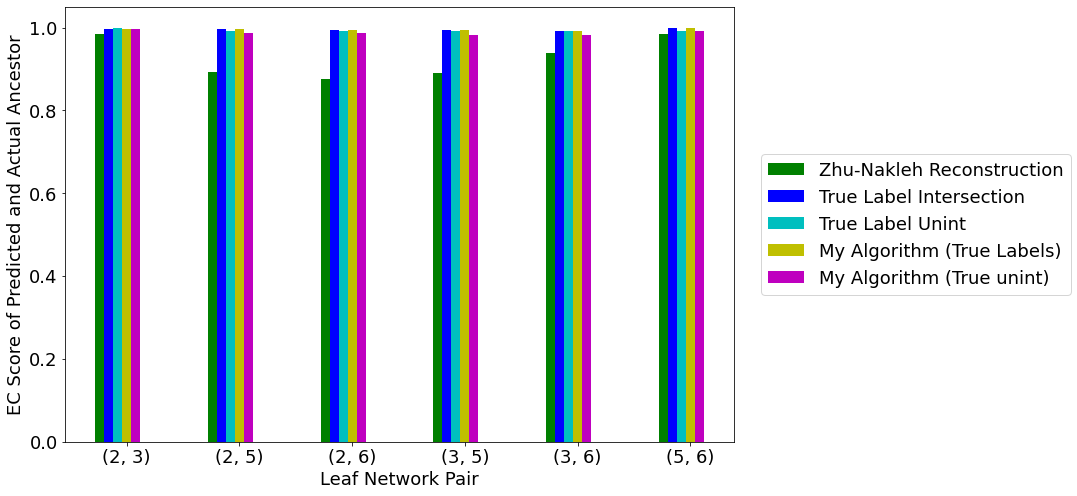

<Figure size 864x576 with 0 Axes>

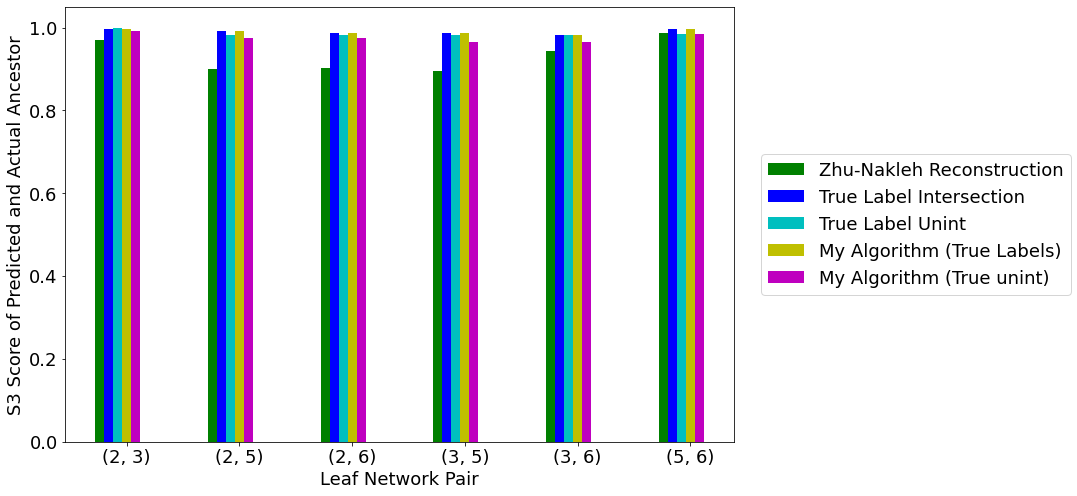

<Figure size 864x576 with 0 Axes>

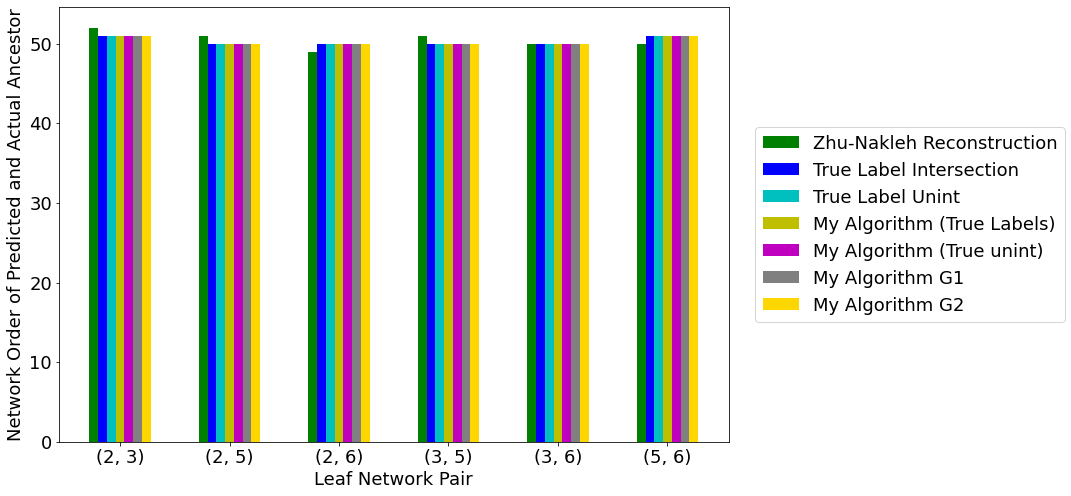

<Figure size 864x576 with 0 Axes>

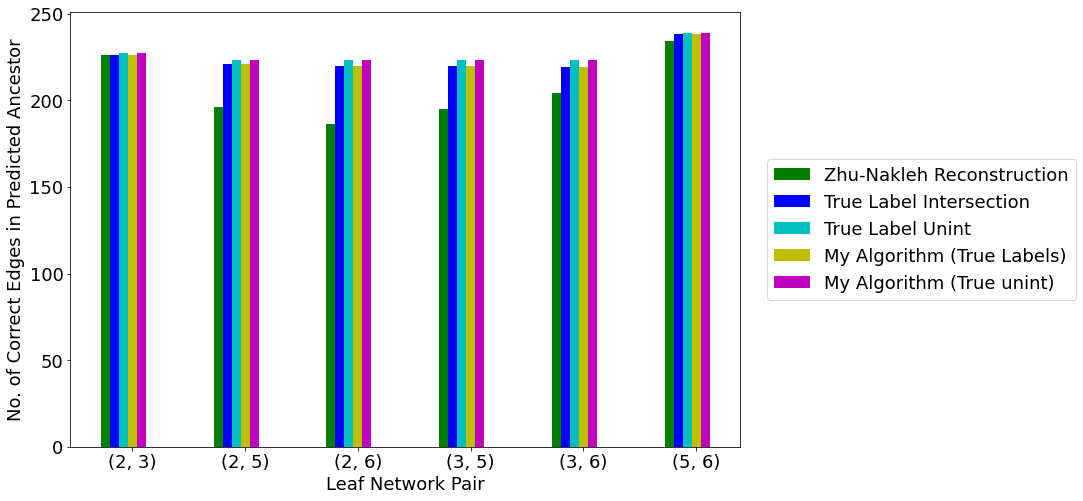

<Figure size 864x576 with 0 Axes>

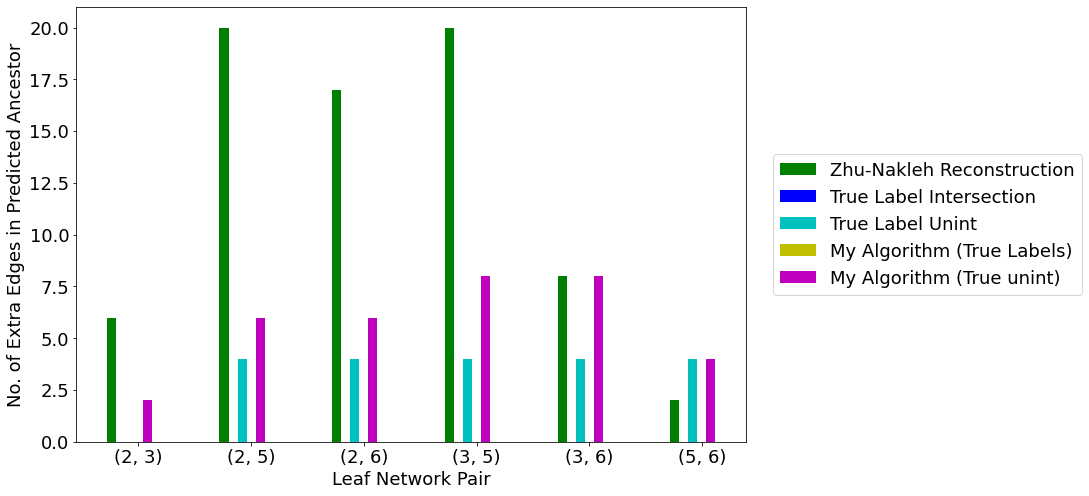

<Figure size 864x576 with 0 Axes>

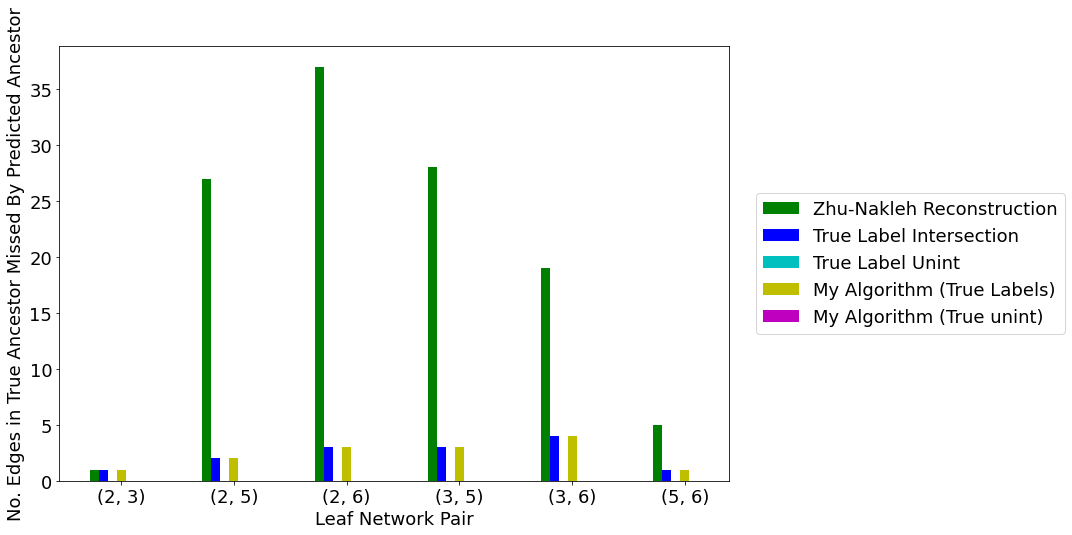

In [2]:
from os import abort
from re import S
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import gene_functions as gf
import scipy as sp
import copy
branchLength=1
algType="gene"

leafGraphs=dict()
internalGraphs=dict()
t=nx.DiGraph()
t.add_edge(0,1)
t.add_edge(1,2)
t.add_edge(1,3)
t.add_edge(0,4)
t.add_edge(4,5)
t.add_edge(4,6)
root = [n for n,d in t.in_degree() if d==0]
leaves = [n for n,d in t.out_degree() if d==0]
for i in range(7):
    if i in leaves:
        leafGraphs[i]= nx.read_edgelist("test_datasets_ancestral/regulatory_test_ped_pea_r04/anc50_2cherry_branch"+str(branchLength)+"/LEAF"+str(i)+"_two_cherry_branchLength"+str(branchLength)+".txt",create_using=nx.DiGraph)
        #leafGraphs[i]= nx.read_edgelist("test_datasets_ancestral/code_quickrun/LEAF"+str(i)+"_two_cherry_branchLength"+str(branchLength)+".txt",create_using=nx.DiGraph)

    else:
        #internalGraphs[i]= nx.read_edgelist("test_datasets_ancestral/code_quickrun/INTERNAL"+str(i)+"_two_cherry_branchLength"+str(branchLength)+".txt",create_using=nx.DiGraph)

        internalGraphs[i]= nx.read_edgelist("test_datasets_ancestral/regulatory_test_ped_pea_r04/anc50_2cherry_branch"+str(branchLength)+"/INTERNAL"+str(i)+"_two_cherry_branchLength"+str(branchLength)+".txt",create_using=nx.DiGraph)
G_anc_dict=dict()
G_anc_dict[(2,3)]=internalGraphs[1]
G_anc_dict[(3,2)]=internalGraphs[1]
G_anc_dict[(5,6)]=internalGraphs[4]
G_anc_dict[(6,5)]=internalGraphs[4]

G_anc_dict[(2,5)]=internalGraphs[0]
G_anc_dict[(5,2)]=internalGraphs[0]
G_anc_dict[(6,2)]=internalGraphs[0]
G_anc_dict[(2,6)]=internalGraphs[0]
G_anc_dict[(3,6)]=internalGraphs[0]
G_anc_dict[(6,3)]=internalGraphs[0]
G_anc_dict[(3,5)]=internalGraphs[0]
G_anc_dict[(5,3)]=internalGraphs[0]

qMod=0.4
qCon=0.1
r=0.4
q=0.4
iterations=1

iterationVec=[i for i in range(iterations)]

S3_nf_vec=dict()
S3_dmc_vec=dict()
S3_orig_vec=dict()
EC_nf_vec=dict()
EC_dmc_vec=dict()
EC_orig_vec=dict()
ICS_nf_vec=dict()
ICS_dmc_vec=dict()
ICS_orig_vec=dict()
new_metric_nf_vec=dict()
new_metric_dmc_vec=dict()
new_metric_orig_vec=dict()
network_order_dmc=dict()
network_order_nf=dict()
network_order_orig=dict()
EC_find1_vec=dict()
ICS_find1_vec=dict()
S3_find1_vec=dict()
network_order_find1=dict()
EC_find2_vec=dict()
ICS_find2_vec=dict()
S3_find2_vec=dict()
network_order_find2=dict()
EC_find_int_vec=dict()
ICS_find_int_vec=dict()
S3_find_int_vec=dict()
network_order_find_int=dict()
EC_find_mapped_int_vec=dict()
ICS_find_mapped_int_vec=dict()
S3_find_mapped_int_vec=dict()
network_order_int_mapped=dict()
EC_findAl1_vec=dict()
ICS_findAl1_vec=dict()
S3_findAl1_vec=dict()
network_order_findAl1=dict()
EC_findAl2_vec=dict()
ICS_findAl2_vec=dict()
S3_findAl2_vec=dict()
network_order_findAl2=dict()
EC_findAl_int_vec=dict()
ICS_findAl_int_vec=dict()
S3_findAl_int_vec=dict()
network_order_findAl_int=dict()
EC_findAl_mapped_int_vec=dict()
ICS_findAl_mapped_int_vec=dict()
S3_findAl_mapped_int_vec=dict()
network_order_int_mapped=dict()
EC_true_unint_vec=dict()
ICS_true_unint_vec=dict()
S3_true_unint_vec=dict()
network_order_true_unint=dict()
EC_align_unint_vec=dict()
ICS_align_unint_vec=dict()
S3_align_unint_vec=dict()
network_order_align_unint=dict()
EC_unint_vec=dict()
ICS_unint_vec=dict()
S3_unint_vec=dict()
network_order_unint=dict()

conserved_dmc_vec=dict()
conserved_orig_vec=dict()
conserved_unint_vec=dict()
conserved_true_unint_vec=dict()
conserved_find_int_vec=dict()
extra_edges_dmc_vec=dict()
extra_edges_orig_vec=dict()
extra_edges_unint_vec=dict()
extra_edges_true_unint_vec=dict()
extra_edges_find_int_vec=dict()
missed_edges_dmc_vec=dict()
missed_edges_orig_vec=dict()
missed_edges_unint_vec=dict()
missed_edges_true_unint_vec=dict()
missed_edges_find_int_vec=dict()
print(leafGraphs)
for l in leafGraphs:
    for m in leafGraphs:
        if m>l:
            print(l,m)
            G1=leafGraphs[l]
            G2=leafGraphs[m]
            G_anc=G_anc_dict[(l,m)] 
            G_anc=gf.label_conserver(G_anc)
            print("g_anc true edge number",len(G_anc.edges()))  
            G1=gf.label_conserver(G1)
            G2=gf.label_conserver(G2)
            
            for k in range(0,iterations):
                print("qMod:",qMod,k)
                #True label My ancestral algorithm

                G1_orig=copy.deepcopy(G1)
                G2_orig=copy.deepcopy(G2)
                #mapper1=gf.gene_family_relabeller(G1_orig)
                #mapper2=gf.gene_family_relabeller(G2_orig)
                #G1_orig=nx.relabel_nodes(G1_orig,mapper1)
                #G2_orig=nx.relabel_nodes(G2_orig,mapper2)
                #initial alignment
                '''
                G1_labelless=nx.convert_node_labels_to_integers(G1_orig)
                G2_labelless=nx.convert_node_labels_to_integers(G2_orig)
                G1=nx.convert_node_labels_to_integers(G1_orig)
                G2=nx.convert_node_labels_to_integers(G2_orig)
                alignVec,mapped=gf.NF(G1,G2,32,0.8)
                mapping = dict(alignVec)
                
                G1_mapped=nx.induced_subgraph(G1,list(mapped))
                G1_mapped=nx.relabel_nodes(G1_mapped,mapping)
                '''

                t=1
                tEC=0
                if algType=="orig":
                    G_anc_find1,G_anc_find2=gf.ancestor_finder_without_alignment_the_seventh(G1_orig,G2_orig,qMod,qCon,tolerance=t,toleranceEC=tEC)
                if algType=="core":
                    G_anc_find1,G_anc_find2=gf.ancestor_finder_without_alignment_the_fifth(G1_orig,G2_orig,qMod,qCon,tolerance=t,toleranceEC=tEC)
                if algType=="branch":
                    G_anc_find1,G_anc_find2=gf.ancestor_finder_without_alignment_branching(G1_orig,G2_orig,qMod,qCon,tolerance=t,toleranceEC=tEC)
                if algType=="gene":
                    G_anc_find1,G_anc_find2=gf.ancestor_finder_without_alignment_gene_family_separate_ped_pea(G1_orig,G2_orig,r,q,tolerance=t,toleranceEC=tEC)
               
                else:
                    exit
                print("ancestor found")
                G_find_int_anc=nx.intersection(G_anc_find1,G_anc_find2)
                print("my alg edge number int",len(G_find_int_anc.edges()))
                G_true_unint=gf.graph_intersection_union(G_anc_find1,G_anc_find2)
                print("my alg edge number unint",len(G_true_unint.edges()))
                mapping=dict()
                for i in list(G_find_int_anc.nodes):
                    mapping[i]=G_anc_find1.nodes[i]['orig_label']
                for j in list(G_true_unint.nodes()):
                    if (G_true_unint.out_degree(j)==0 and G_true_unint.in_degree(j)==0):
                        G_true_unint.remove_node(j)
                    elif G_true_unint.out_degree(j)==1 and G_true_unint.in_degree(j)==1 and (j,j) in list(G_find_int_anc.edges):
                        G_true_unint.remove_node(j)
                G_true_unint=nx.relabel_nodes(G_true_unint,mapping)    
                EC_true_unint_vec[str((l,m))]=gf.normalised_ec_score(G_true_unint,G_anc)
                ICS_true_unint_vec[str((l,m))]=gf.ics_score(G_true_unint,G_anc)
                S3_true_unint_vec[str((l,m))]=gf.s3_score(G_true_unint,G_anc)
                conservedEdges=gf.conserved_edges(G_true_unint,G_anc)
                conserved_true_unint_vec[str((l,m))]=conservedEdges
                extra_edges_true_unint_vec[str((l,m))]=len(G_true_unint.edges)-conservedEdges
                missed_edges_true_unint_vec[str((l,m))]=len(G_anc.edges)-conservedEdges
                network_order_true_unint[str((l,m))]=len(G_true_unint.nodes)
                for j in list(G_find_int_anc.nodes()):
                    if (G_find_int_anc.out_degree(j)==0 and G_find_int_anc.in_degree(j)==0):
                        G_find_int_anc.remove_node(j)
                    elif G_find_int_anc.out_degree(j)==1 and G_find_int_anc.in_degree(j)==1 and (j,j) in list(G_find_int_anc.edges):
                        G_find_int_anc.remove_node(j)
                
                
                
                G_find_int_anc=nx.relabel_nodes(G_find_int_anc,mapping)

                EC_find_int_vec[str((l,m))]=gf.normalised_ec_score(G_find_int_anc,G_anc)
                ICS_find_int_vec[str((l,m))]=gf.ics_score(G_find_int_anc,G_anc)
                S3_find_int_vec[str((l,m))]=gf.s3_score(G_find_int_anc,G_anc)
                conservedEdges=gf.conserved_edges(G_find_int_anc,G_anc)
                conserved_find_int_vec[str((l,m))]=conservedEdges
                extra_edges_find_int_vec[str((l,m))]=len(G_find_int_anc.edges)-conservedEdges
                missed_edges_find_int_vec[str((l,m))]=len(G_anc.edges)-conservedEdges
                network_order_find_int[str((l,m))]=len(G_find_int_anc.nodes)

                for j in list(G_anc_find1.nodes()):
                    if (G_anc_find1.out_degree(j)==0 and G_anc_find1.in_degree(j)==0):
                        G_anc_find1.remove_node(j)
                    elif G_anc_find1.out_degree(j)==1 and G_anc_find1.in_degree(j)==1 and (j,j) in list(G_anc_find1.edges):
                        G_anc_find1.remove_node(j)

                mapping=dict()
                for i in list(G_anc_find1.nodes):
                    mapping[i]=G_anc_find1.nodes[i]['orig_label']
                G_find1_anc=nx.relabel_nodes(G_anc_find1,mapping)
                
                EC_find1_vec[str((l,m))]=gf.normalised_ec_score(G_find1_anc,G_anc)
                ICS_find1_vec[str((l,m))]=gf.ics_score(G_find1_anc,G_anc)
                S3_find1_vec[str((l,m))]=gf.s3_score(G_find1_anc,G_anc)
                network_order_find1[str((l,m))]=len(G_find1_anc.nodes)
                
                for j in list(G_anc_find2.nodes()):
                    if (G_anc_find2.out_degree(j)==0 and G_anc_find2.in_degree(j)==0):
                        G_anc_find2.remove_node(j)
                    elif G_anc_find2.out_degree(j)==1 and G_anc_find2.in_degree(j)==1 and (j,j) in list(G_anc_find2.edges):
                        G_anc_find2.remove_node(j)
                
                mapping=dict()
                for i in list(G_anc_find2.nodes):
                    mapping[i]=G_anc_find2.nodes[i]['orig_label']
                G_find2_anc=nx.relabel_nodes(G_anc_find2,mapping)

                EC_find2_vec[str((l,m))]=gf.normalised_ec_score(G_find2_anc,G_anc)
                ICS_find2_vec[str((l,m))]=gf.ics_score(G_find2_anc,G_anc)
                S3_find2_vec[str((l,m))]=gf.s3_score(G_find2_anc,G_anc)
                network_order_find2[str((l,m))]=len(G_find2_anc.nodes)

                nx.write_edgelist(G_find_int_anc,"test_datasets_ancestral/regulatory_test_ped_pea_r04/anc50_2cherry_branch"+str(branchLength)+"/myalg_int_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                nx.write_edgelist(G_true_unint,"test_datasets_ancestral/regulatory_test_ped_pea_r04/anc50_2cherry_branch"+str(branchLength)+"/myalg_unint_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                nx.write_edgelist(G_find1_anc,"test_datasets_ancestral/regulatory_test_ped_pea_r04/anc50_2cherry_branch"+str(branchLength)+"/myalgG"+str(l)+"_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                nx.write_edgelist(G_find2_anc,"test_datasets_ancestral/regulatory_test_ped_pea_r04/anc50_2cherry_branch"+str(branchLength)+"/myalgG"+str(m)+"_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                
                #Zhu-Nakleh Reconstruction
                G1_orig=copy.deepcopy(G1)
                G2_orig=copy.deepcopy(G2)
                G_dmc_anc=gf.dmc_anc_rec(G1_orig,G2_orig,qMod,qCon)
                for j in list(G_dmc_anc.nodes()):
                    if (G_dmc_anc.out_degree(j)==0 and G_dmc_anc.in_degree(j)==0):
                        G_dmc_anc.remove_node(j)
                    elif G_dmc_anc.out_degree(j)==1 and G_dmc_anc.in_degree(j)==1 and (j,j) in list(G_dmc_anc.edges):
                        G_dmc_anc.remove_node(j)
                
                EC_dmc_vec[str((l,m))]=gf.normalised_ec_score(G_dmc_anc,G_anc)
                ICS_dmc_vec[str((l,m))]=gf.ics_score(G_dmc_anc,G_anc)
                S3_dmc_vec[str((l,m))]=gf.s3_score(G_dmc_anc,G_anc)
                conservedEdges=gf.conserved_edges(G_dmc_anc,G_anc)
                conserved_dmc_vec[str((l,m))]=conservedEdges
                extra_edges_dmc_vec[str((l,m))]=len(G_dmc_anc.edges)-conservedEdges
                missed_edges_dmc_vec[str((l,m))]=len(G_anc.edges)-conservedEdges
                network_order_dmc[str((l,m))]=len(G_dmc_anc.nodes)
                nx.write_edgelist(G_dmc_anc,"test_datasets_ancestral/regulatory_test_ped_pea_r04/anc50_2cherry_branch"+str(branchLength)+"/dmc_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                '''
                #NF Align then intersect
                G1_orig=copy.deepcopy(G1)
                G2_orig=copy.deepcopy(G2)

                G1_labelless=nx.convert_node_labels_to_integers(G1_orig)
                G2_labelless=nx.convert_node_labels_to_integers(G2_orig)
                alignVec,mapped=gf.NF(G1_labelless,G2_labelless,32,0.8)
                mapping = dict(alignVec)

                G1_mapped=nx.induced_subgraph(G1_labelless,list(mapped))
                G1_mapped=nx.relabel_nodes(G1_mapped,mapping)

                G_intersect=nx.intersection(G1_mapped,G2_labelless)

                for j in list(G_intersect.nodes()):
                    if (G_intersect.out_degree(j)==0 and G_intersect.in_degree(j)==0):
                        G_intersect.remove_node(j)
                    elif G_intersect.out_degree(j)==1 and G_intersect.in_degree(j)==1 and (j,j) in list(G_intersect.edges):
                        G_intersect.remove_node(j)

                mapping=dict()
                for i in list(G_intersect.nodes):
                    mapping[i]=G_intersect.nodes[i]['orig_label']
                G_nf_anc=nx.relabel_nodes(G_intersect,mapping)
                
                EC_nf_vec[str((l,m))]=gf.normalised_ec_score(G_nf_anc,G_anc)
                ICS_nf_vec[str((l,m))]=gf.ics_score(G_nf_anc,G_anc)
                S3_nf_vec[str((l,m))]=gf.s3_score(G_nf_anc,G_anc)
                network_order_nf[str((l,m))]=len(G_nf_anc.nodes)
                nx.write_edgelist(G_nf_anc,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/nf_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                '''
                #True Label Intersection
                G1_orig=copy.deepcopy(G1)
                G2_orig=copy.deepcopy(G2)
                #G1_orig=nx.relabel_nodes(G1_orig,mapper1)
                #G2_orig=nx.relabel_nodes(G2_orig,mapper2)
                
                G_intersect=nx.intersection(G1_orig,G2_orig)
                print("intersect edge number",len(G_intersect.edges()))

                for j in list(G_intersect.nodes()):
                    if (G_intersect.out_degree(j)==0 and G_intersect.in_degree(j)==0):
                        G_intersect.remove_node(j)
                    elif G_intersect.out_degree(j)==1 and G_intersect.in_degree(j)==1 and (j,j) in list(G_intersect.edges):
                        G_intersect.remove_node(j)
                mapping=dict()
                for i in list(G_intersect.nodes):
                    mapping[i]=G1_orig.nodes[i]['orig_label']
                G_intersect=nx.relabel_nodes(G_intersect,mapping)

                G_orig_anc=G_intersect
                
                EC_orig_vec[str((l,m))]=gf.normalised_ec_score(G_orig_anc,G_anc)
                ICS_orig_vec[str((l,m))]=gf.ics_score(G_orig_anc,G_anc)
                S3_orig_vec[str((l,m))]=gf.s3_score(G_orig_anc,G_anc)
                conservedEdges=gf.conserved_edges(G_orig_anc,G_anc)
                conserved_orig_vec[str((l,m))]=conservedEdges
                extra_edges_orig_vec[str((l,m))]=len(G_orig_anc.edges)-conservedEdges
                missed_edges_orig_vec[str((l,m))]=len(G_anc.edges)-conservedEdges
                network_order_orig[str((l,m))]=len(G_orig_anc.nodes)

                G_unint_anc=gf.graph_intersection_union(G1_orig,G2_orig)
                mapping=dict()
                for i in list(G_unint_anc.nodes):
                    mapping[i]=G1_orig.nodes[i]['orig_label']
                for j in list(G_unint_anc.nodes()):
                    if (G_unint_anc.out_degree(j)==0 and G_unint_anc.in_degree(j)==0):
                        G_unint_anc.remove_node(j)
                    elif G_unint_anc.out_degree(j)==1 and G_unint_anc.in_degree(j)==1 and (j,j) in list(G_unint_anc.edges):
                        G_unint_anc.remove_node(j)
                G_unint_anc=nx.relabel_nodes(G_unint_anc,mapping)
                EC_unint_vec[str((l,m))]=gf.normalised_ec_score(G_unint_anc,G_anc)
                ICS_unint_vec[str((l,m))]=gf.ics_score(G_unint_anc,G_anc)
                S3_unint_vec[str((l,m))]=gf.s3_score(G_unint_anc,G_anc)
                conservedEdges=gf.conserved_edges(G_unint_anc,G_anc)
                conserved_unint_vec[str((l,m))]=conservedEdges
                extra_edges_unint_vec[str((l,m))]=len(G_unint_anc.edges)-conservedEdges
                missed_edges_unint_vec[str((l,m))]=len(G_anc.edges)-conservedEdges
                network_order_unint[str((l,m))]=len(G_unint_anc.nodes)
                
                nx.write_edgelist(G_orig_anc,"test_datasets_ancestral/regulatory_test_ped_pea_r04/anc50_2cherry_branch"+str(branchLength)+"/intersect_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                nx.write_edgelist(G_unint_anc,"test_datasets_ancestral/regulatory_test_ped_pea_r04/anc50_2cherry_branch"+str(branchLength)+"/unint_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                print("g_anc true edge number",len(G_anc.edges())) 
                '''
                #Align then apply my algorithm

                G1_orig=copy.deepcopy(G1)
                G2_orig=copy.deepcopy(G2)
                #initial alignment
                
                G1_labelless=nx.convert_node_labels_to_integers(G1_orig)
                G2_labelless=nx.convert_node_labels_to_integers(G2_orig)
                G1_align=nx.convert_node_labels_to_integers(G1_orig)
                G2_align=nx.convert_node_labels_to_integers(G2_orig)
                alignVec,mapped=gf.NF(G1_align,G2_align,32,0.8)
                mapping = dict(alignVec)
                
                G1_mapped=nx.induced_subgraph(G1_align,list(mapped))
                G1_mapped=nx.relabel_nodes(G1_mapped,mapping)
                
                
                tolLike=0
                tolSim=0
                G_anc_find1,G_anc_find2=gf.ancestor_finder_without_alignment_alt_alt_alt_alt(G1_align,G2_align,qMod,qCon,tolerance=tolLike,toleranceEC=tolSim)
                print("ancestor found")
                G_find_int_anc=nx.intersection(G_anc_find1,G_anc_find2)
                print("my alg edge number",len(G_find_int_anc.edges()))
                G_align_unint=gf.graph_intersection_union(G_anc_find1,G_anc_find2)
                print("my alg edge number unint",len(G_align_unint.edges()))
                
                
                for j in list(G_find_int_anc.nodes()):
                    if (G_find_int_anc.out_degree(j)==0 and G_find_int_anc.in_degree(j)==0):
                        G_find_int_anc.remove_node(j)
                    elif G_find_int_anc.out_degree(j)==1 and G_find_int_anc.in_degree(j)==1 and (j,j) in list(G_find_int_anc.edges):
                        G_find_int_anc.remove_node(j)
                
                mapping=dict()
                for i in list(G_find_int_anc.nodes):
                    mapping[i]=G_anc_find1.nodes[i]['orig_label']
                G_find_int_anc=nx.relabel_nodes(G_find_int_anc,mapping)

                EC_findAl_int_vec[str((l,m))]=gf.normalised_ec_score(G_find_int_anc,G_anc)
                ICS_findAl_int_vec[str((l,m))]=gf.ics_score(G_find_int_anc,G_anc)
                S3_findAl_int_vec[str((l,m))]=gf.s3_score(G_find_int_anc,G_anc)
                network_order_findAl_int[str((l,m))]=len(G_find_int_anc.nodes)

                for j in list(G_align_unint.nodes()):
                    if (G_align_unint.out_degree(j)==0 and G_align_unint.in_degree(j)==0):
                        G_align_unint.remove_node(j)
                    elif G_align_unint.out_degree(j)==1 and G_align_unint.in_degree(j)==1 and (j,j) in list(G_align_unint.edges):
                        G_align_unint.remove_node(j)
                
                mapping=dict()
                for i in list(G_align_unint.nodes):
                    mapping[i]=G_anc_find1.nodes[i]['orig_label']
                G_align_unint=nx.relabel_nodes(G_align_unint,mapping)

                EC_align_unint_vec[str((l,m))]=gf.normalised_ec_score(G_align_unint,G_anc)
                ICS_align_unint_vec[str((l,m))]=gf.ics_score(G_align_unint,G_anc)
                S3_align_unint_vec[str((l,m))]=gf.s3_score(G_align_unint,G_anc)
                network_order_align_unint[str((l,m))]=len(G_align_unint.nodes)

                for j in list(G_anc_find1.nodes()):
                    if (G_anc_find1.out_degree(j)==0 and G_anc_find1.in_degree(j)==0):
                        G_anc_find1.remove_node(j)
                    elif G_anc_find1.out_degree(j)==1 and G_anc_find1.in_degree(j)==1 and (j,j) in list(G_anc_find1.edges):
                        G_anc_find1.remove_node(j)

                mapping=dict()
                for i in list(G_anc_find1.nodes):
                    mapping[i]=G_anc_find1.nodes[i]['orig_label']
                G_find1_anc=nx.relabel_nodes(G_anc_find1,mapping)
                
                EC_findAl1_vec[str((l,m))]=gf.normalised_ec_score(G_find1_anc,G_anc)
                ICS_findAl1_vec[str((l,m))]=gf.ics_score(G_find1_anc,G_anc)
                S3_findAl1_vec[str((l,m))]=gf.s3_score(G_find1_anc,G_anc)
                network_order_findAl1[str((l,m))]=len(G_find1_anc.nodes)

                for j in list(G_anc_find2.nodes()):
                    if (G_anc_find2.out_degree(j)==0 and G_anc_find2.in_degree(j)==0):
                        G_anc_find2.remove_node(j)
                    elif G_anc_find2.out_degree(j)==1 and G_anc_find2.in_degree(j)==1 and (j,j) in list(G_anc_find2.edges):
                        G_anc_find2.remove_node(j)
                
                mapping=dict()
                for i in list(G_anc_find2.nodes):
                    mapping[i]=G_anc_find2.nodes[i]['orig_label']
                G_find2_anc=nx.relabel_nodes(G_anc_find2,mapping)

                EC_findAl2_vec[str((l,m))]=gf.normalised_ec_score(G_find2_anc,G_anc)
                ICS_findAl2_vec[str((l,m))]=gf.ics_score(G_find2_anc,G_anc)
                S3_findAl2_vec[str((l,m))]=gf.s3_score(G_find2_anc,G_anc)
                network_order_findAl2[str((l,m))]=len(G_find2_anc.nodes)

                nx.write_edgelist(G_find_int_anc,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/myalg_align_int_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                nx.write_edgelist(G_align_unint,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/myalg_align_unint_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                nx.write_edgelist(G_find1_anc,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/myalgG"+str(l)+"_align_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                nx.write_edgelist(G_find2_anc,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/myalgG"+str(m)+"_align_anc_graphs_"+str(l)+"_"+str(m)+".txt")
                '''
                '''
                G_anc_find1=nx.convert_node_labels_to_integers(G_anc_find1)
                G_anc_find2=nx.convert_node_labels_to_integers(G_anc_find2)
                alignVec,mapped=gf.NF_many_to_one(G_anc_find1,G_anc_find2,32,0.8)
                mapping = dict(alignVec)
                
                G_anc_find1_mapped=nx.induced_subgraph(G_anc_find1,list(mapped))
                G_anc_find1_mapped=nx.relabel_nodes(G_anc_find1_mapped,mapping)

                for j in list(G_anc_find1_mapped.nodes()):
                    if (G_anc_find1_mapped.out_degree(j)==0 and G_anc_find1_mapped.in_degree(j)==0):
                        G_anc_find1_mapped.remove_node(j)
                    elif G_anc_find1_mapped.out_degree(j)==1 and G_anc_find1_mapped.in_degree(j)==1 and (j,j) in list(G_anc_find1_mapped.edges):
                        G_anc_find1_mapped.remove_node(j)
                
                mapping=dict()
                for i in list(G_anc_find1_mapped.nodes):
                    mapping[i]=G_anc_find1_mapped.nodes[i]['orig_label']
                G_anc_find1_mapped=nx.relabel_nodes(G_anc_find1_mapped,mapping)

                EC_find_mapped_int_vec[str((l,m))]=gf.normalised_ec_score(G_anc_find1_mapped,G_anc))
                ICS_find_mapped_int_vec[str((l,m))]=gf.ics_score(G_anc_find1_mapped,G_anc))
                S3_find_mapped_int_vec[str((l,m))]=gf.s3_score(G_anc_find1_mapped,G_anc))
                network_order_int_mapped[str((l,m))]=len(G_anc_find1_mapped.nodes))
                '''
'''                
gf.write_dict_to_file(extra_edges_dmc_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/extra_edges_dmc_vec.txt")
gf.write_dict_to_file(extra_edges_orig_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/extra_edges_orig_vec.txt")
gf.write_dict_to_file(extra_edges_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/extra_edges_unint_vec.txt")
gf.write_dict_to_file(extra_edges_true_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/extra_edges_true_unint_vec.txt")
gf.write_dict_to_file(extra_edges_find_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/extra_edges_find_int_vec.txt")
gf.write_dict_to_file(missed_edges_dmc_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/missed_edges_dmc_vec.txt")
gf.write_dict_to_file(missed_edges_orig_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/missed_edges_orig_vec.txt")
gf.write_dict_to_file(missed_edges_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/missed_edges_unint_vec.txt")
gf.write_dict_to_file(missed_edges_true_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/missed_edges_true_unint_vec.txt")
gf.write_dict_to_file(missed_edges_find_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/missed_edges_find_int_vec.txt")
gf.write_dict_to_file(conserved_dmc_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/conserved_dmc_vec.txt")
gf.write_dict_to_file(conserved_orig_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/conserved_orig_vec.txt")
gf.write_dict_to_file(conserved_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/conserved_unint_vec.txt")
gf.write_dict_to_file(conserved_true_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/conserved_true_unint_vec.txt")
gf.write_dict_to_file(conserved_find_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/conserved_find_int_vec.txt")
gf.write_dict_to_file(S3_nf_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_nf_vec.txt")
gf.write_dict_to_file(S3_dmc_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_dmc_vec.txt")
gf.write_dict_to_file(S3_orig_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_orig_vec.txt")
gf.write_dict_to_file(EC_nf_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_nf_vec.txt")
gf.write_dict_to_file(EC_dmc_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_dmc_vec.txt")
gf.write_dict_to_file(EC_orig_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_orig_vec.txt")
gf.write_dict_to_file(ICS_nf_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_nf_vec.txt")
gf.write_dict_to_file(ICS_dmc_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_dmc_vec.txt")
gf.write_dict_to_file(ICS_orig_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_orig_vec.txt")
gf.write_dict_to_file(network_order_dmc,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_dmc.txt")
gf.write_dict_to_file(network_order_nf,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_nf.txt")
gf.write_dict_to_file(network_order_orig,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_orig.txt")
gf.write_dict_to_file(EC_find1_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_find1_vec.txt")
gf.write_dict_to_file(ICS_find1_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_find1_vec.txt")
gf.write_dict_to_file(S3_find1_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_find1_vec.txt")
gf.write_dict_to_file(network_order_find1,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_find1.txt")
gf.write_dict_to_file(EC_find2_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_find2_vec.txt")
gf.write_dict_to_file(ICS_find2_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_find2_vec.txt")
gf.write_dict_to_file(S3_find2_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_find2_vec.txt")
gf.write_dict_to_file(network_order_find2,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_find2.txt")
gf.write_dict_to_file(EC_find_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_find_int_vec.txt")
gf.write_dict_to_file(ICS_find_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_find_int_vec.txt")
gf.write_dict_to_file(S3_find_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_find_int_vec.txt")
gf.write_dict_to_file(network_order_find_int,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_find_int.txt")
gf.write_dict_to_file(EC_find_mapped_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_find_mapped_int_vec.txt")
gf.write_dict_to_file(ICS_find_mapped_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_find_mapped_int_vec.txt")
gf.write_dict_to_file(S3_find_mapped_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_find_mapped_int_vec.txt")
gf.write_dict_to_file(network_order_int_mapped,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_int_mapped.txt")
gf.write_dict_to_file(EC_findAl1_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_findAl1_vec.txt")
gf.write_dict_to_file(ICS_findAl1_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_findAl1_vec.txt")
gf.write_dict_to_file(S3_findAl1_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_findAl1_vec.txt")
gf.write_dict_to_file(network_order_findAl1,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_findAl1.txt")
gf.write_dict_to_file(EC_findAl2_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_findAl2_vec.txt")
gf.write_dict_to_file(ICS_findAl2_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_findAl2_vec.txt")
gf.write_dict_to_file(S3_findAl2_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_findAl2_vec.txt")
gf.write_dict_to_file(network_order_findAl2,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_findAl2.txt")
gf.write_dict_to_file(EC_findAl_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_findAl_int_vec.txt")
gf.write_dict_to_file(ICS_findAl_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_findAl_int_vec.txt")
gf.write_dict_to_file(S3_findAl_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_findAl_int_vec.txt")
gf.write_dict_to_file(network_order_findAl_int,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_findAl_int.txt")
gf.write_dict_to_file(EC_findAl_mapped_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_findAl_mapped_int_vec.txt")
gf.write_dict_to_file(ICS_findAl_mapped_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_findAl_mapped_int_vec.txt")
gf.write_dict_to_file(S3_findAl_mapped_int_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_findAl_mapped_int_vec.txt")
gf.write_dict_to_file(network_order_int_mapped,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_int_mapped.txt")
gf.write_dict_to_file(EC_true_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_true_unint_vec.txt")
gf.write_dict_to_file(ICS_true_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_true_unint_vec.txt")
gf.write_dict_to_file(S3_true_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_true_unint_vec.txt")
gf.write_dict_to_file(network_order_true_unint,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_true_unint.txt")
gf.write_dict_to_file(EC_align_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_align_unint_vec.txt")
gf.write_dict_to_file(ICS_align_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_align_unint_vec.txt")
gf.write_dict_to_file(S3_align_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_align_unint_vec.txt")
gf.write_dict_to_file(network_order_align_unint,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_align_unint.txt")
gf.write_dict_to_file(EC_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/EC_unint_vec.txt")
gf.write_dict_to_file(ICS_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/ICS_unint_vec.txt")
gf.write_dict_to_file(S3_unint_vec,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/S3_unint_vec.txt")
gf.write_dict_to_file(network_order_unint,"test_datasets_ancestral/anc50_2cherry_branch"+str(branchLength)+"/network_order_unint.txt")
'''
pairs_vec=[]

EC_nf=[]
EC_dmc=[]
EC_orig=[]
EC_unint=[]
EC_find_int=[]
EC_findAl_int=[]
EC_true_unint=[]
EC_align_unint=[]

S3_nf=[]
S3_dmc=[]
S3_orig=[]
S3_unint=[]
S3_find_int=[]
S3_findAl_int=[]
S3_true_unint=[]
S3_align_unint=[]

net_order_nf=[]
net_order_dmc=[]
net_order_orig=[]
net_order_find1=[]
net_order_find2=[]
net_order_find_int=[]
net_order_findAl_int=[]
net_order_true_unint=[]
net_order_align_unint=[]
net_order_unint=[]

conserved_dmc=[]
conserved_orig=[]
conserved_unint=[]
conserved_true_unint=[]
conserved_find_int=[]

extra_edges_dmc=[]
extra_edges_orig=[]
extra_edges_unint=[]
extra_edges_true_unint=[]
extra_edges_find_int=[]

missed_edges_dmc=[]
missed_edges_orig=[]
missed_edges_unint=[]
missed_edges_true_unint=[]
missed_edges_find_int=[]

font = {'family' : 'normal',
        'weight' : 'normal',

        'size'   : 18}


plt.rc('font', **font)
for l in leafGraphs:
    for m in leafGraphs:
        if m>l:
            pairs_vec.append(str((l,m)))
            
            #EC_nf.append(EC_nf_vec[str((l,m))])
            EC_dmc.append(EC_dmc_vec[str((l,m))])
            EC_orig.append(EC_orig_vec[str((l,m))])
            EC_unint.append(EC_unint_vec[str((l,m))])
            EC_find_int.append(EC_find_int_vec[str((l,m))])
            #EC_findAl_int.append(EC_findAl_int_vec[str((l,m))])
            EC_true_unint.append(EC_true_unint_vec[str((l,m))])
            #EC_align_unint.append(EC_align_unint_vec[str((l,m))])
            
            #S3_nf.append(S3_nf_vec[str((l,m))])
            S3_dmc.append(S3_dmc_vec[str((l,m))])
            S3_orig.append(S3_orig_vec[str((l,m))])
            S3_unint.append(S3_unint_vec[str((l,m))])
            S3_find_int.append(S3_find_int_vec[str((l,m))])
            #S3_findAl_int.append(S3_findAl_int_vec[str((l,m))])
            S3_true_unint.append(S3_true_unint_vec[str((l,m))])
            #S3_align_unint.append(S3_align_unint_vec[str((l,m))])

            #net_order_nf.append(network_order_nf[str((l,m))])
            net_order_dmc.append(network_order_dmc[str((l,m))])
            net_order_orig.append(network_order_orig[str((l,m))])
            net_order_find1.append(network_order_find1[str((l,m))])
            net_order_find2.append(network_order_find2[str((l,m))])
            net_order_find_int.append(network_order_find_int[str((l,m))])
            #net_order_findAl_int.append(network_order_findAl_int[str((l,m))])
            net_order_true_unint.append(network_order_true_unint[str((l,m))])
            #net_order_align_unint.append(network_order_align_unint[str((l,m))])
            net_order_unint.append(network_order_unint[str((l,m))])
            
            conserved_dmc.append(conserved_dmc_vec[str((l,m))])
            conserved_orig.append(conserved_orig_vec[str((l,m))])
            conserved_unint.append(conserved_unint_vec[str((l,m))])
            conserved_true_unint.append(conserved_true_unint_vec[str((l,m))])
            conserved_find_int.append(conserved_find_int_vec[str((l,m))])

            
            extra_edges_dmc.append(extra_edges_dmc_vec[str((l,m))])
            extra_edges_orig.append(extra_edges_orig_vec[str((l,m))])
            extra_edges_unint.append(extra_edges_unint_vec[str((l,m))])
            extra_edges_true_unint.append(extra_edges_true_unint_vec[str((l,m))])
            extra_edges_find_int.append(extra_edges_find_int_vec[str((l,m))])

            missed_edges_dmc.append(missed_edges_dmc_vec[str((l,m))])
            missed_edges_orig.append(missed_edges_orig_vec[str((l,m))])
            missed_edges_unint.append(missed_edges_unint_vec[str((l,m))])
            missed_edges_true_unint.append(missed_edges_true_unint_vec[str((l,m))])
            missed_edges_find_int.append(missed_edges_find_int_vec[str((l,m))])
            
            
print(pairs_vec)
plt.figure(figsize =(12, 8))
barWidth = 0.08
fig = plt.subplots(figsize =(12, 8))
# Set position of bar on X axis
br1 = np.arange(len(EC_dmc))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
#br7 = [x + barWidth for x in br6]
#br8 = [x + barWidth for x in br7]


# Make the plot
#plt.bar(br1, EC_nf, color ='r', width = barWidth,label ="Align then Intersection")
plt.bar(br1, EC_dmc, color ='g', width = barWidth,label ="Zhu-Nakleh Reconstruction")
plt.bar(br2, EC_orig, color ='b', width = barWidth,label ="True Label Intersection")
plt.bar(br3, EC_unint, color ='c', width = barWidth,label ="True Label Unint")
plt.bar(br4, EC_find_int, color ='y', width = barWidth,label ="My Algorithm (True Labels)")
plt.bar(br5, EC_true_unint, color ='m', width = barWidth,label ="My Algorithm (True unint)")
#plt.bar(br7, EC_findAl_int, color ='k', width = barWidth,label ="My Algorithm (Alignment)")
#plt.bar(br8, EC_align_unint, color ='bisque', width = barWidth,label ="My Algorithm (Align unint)")


# Adding Xticks
plt.xlabel('Leaf Network Pair')
plt.ylabel('EC Score of Predicted and Actual Ancestor')
plt.xticks([r + barWidth+0.16 for r in range(len(EC_dmc))],
        pairs_vec)

# Put a legend to the right of the current axis
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

plt.savefig("test_datasets_ancestral/regulatory_test_ped_pea_r04/anc50_2cherry_branch"+str(branchLength)+"/EC_scores_branchlength"+str(branchLength)+".png",bbox_inches="tight")

plt.figure(figsize =(12, 8))
barWidth = 0.08
fig = plt.subplots(figsize =(12, 8))
# Set position of bar on X axis
br1 = np.arange(len(S3_dmc))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
#br7 = [x + barWidth for x in br6]
#br8 = [x + barWidth for x in br7]


# Make the plot
#plt.bar(br1, S3_nf, color ='r', width = barWidth,label ="Align then Intersection")
plt.bar(br1, S3_dmc, color ='g', width = barWidth,label ="Zhu-Nakleh Reconstruction")
plt.bar(br2, S3_orig, color ='b', width = barWidth,label ="True Label Intersection")
plt.bar(br3, S3_unint, color ='c', width = barWidth,label ="True Label Unint")
plt.bar(br4, S3_find_int, color ='y', width = barWidth,label ="My Algorithm (True Labels)")
#plt.bar(br7, S3_findAl_int, color ='k', width = barWidth,label ="My Algorithm (Alignment)")
plt.bar(br5, S3_true_unint, color ='m', width = barWidth,label ="My Algorithm (True unint)")
#plt.bar(br8, S3_align_unint, color ='bisque', width = barWidth,label ="My Algorithm (Align unint)")


# Adding Xticks
plt.xlabel('Leaf Network Pair')
plt.ylabel('S3 Score of Predicted and Actual Ancestor')
plt.xticks([r + barWidth+0.16 for r in range(len(S3_dmc))],
        pairs_vec)

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.savefig("test_datasets_ancestral/regulatory_test_ped_pea_r04/anc50_2cherry_branch"+str(branchLength)+"/S3_scores_branchlength"+str(branchLength)+".png",bbox_inches='tight')

plt.figure(figsize =(12, 8))
barWidth = 0.08
fig = plt.subplots(figsize =(12, 8))
# Set position of bar on X axis
br1 = np.arange(len(net_order_dmc))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]
br10=[x + barWidth for x in br9]


# Make the plot
#plt.bar(br1, net_order_nf, color ='r', width = barWidth,label ="Align then Intersection")
plt.bar(br1, net_order_dmc, color ='g', width = barWidth,label ="Zhu-Nakleh Reconstruction")
plt.bar(br2, net_order_orig, color ='b', width = barWidth,label ="True Label Intersection")
plt.bar(br3, net_order_unint, color ='c', width = barWidth,label ="True Label Unint")
plt.bar(br4, net_order_find_int, color ='y', width = barWidth,label ="My Algorithm (True Labels)")
#plt.bar(br9, net_order_findAl_int, color ='k', width = barWidth,label ="My Algorithm (Alignment)")
plt.bar(br5, net_order_true_unint, color ='m', width = barWidth,label ="My Algorithm (True unint)")
#plt.bar(br10, net_order_align_unint, color ='bisque', width = barWidth,label ="My Algorithm (Align unint)")
plt.bar(br6, net_order_find1, color ='grey', width = barWidth,label ="My Algorithm G1")
plt.bar(br7, net_order_find2, color ='gold', width = barWidth,label ="My Algorithm G2")

# Adding Xticks
plt.xlabel('Leaf Network Pair')
plt.ylabel('Network Order of Predicted and Actual Ancestor')
plt.xticks([r + barWidth+0.16 for r in range(len(net_order_dmc))],
        pairs_vec)

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.savefig("test_datasets_ancestral/regulatory_test_ped_pea_r04/anc50_2cherry_branch"+str(branchLength)+"/net_order_scores_branchlength"+str(branchLength)+".png",bbox_inches='tight')

plt.figure(figsize =(12, 8))
barWidth = 0.08
fig = plt.subplots(figsize =(12, 8))
# Set position of bar on X axis
br1 = np.arange(len(conserved_dmc))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
#br6 = [x + barWidth for x in br5]
#br7 = [x + barWidth for x in br6]
#br8 = [x + barWidth for x in br7]


# Make the plot
#plt.bar(br6, conserved_nf, color ='r', width = barWidth,label ="Align then Intersection")
plt.bar(br1, conserved_dmc, color ='g', width = barWidth,label ="Zhu-Nakleh Reconstruction")
plt.bar(br2, conserved_orig, color ='b', width = barWidth,label ="True Label Intersection")
plt.bar(br3, conserved_unint, color ='c', width = barWidth,label ="True Label Unint")
plt.bar(br4, conserved_find_int, color ='y', width = barWidth,label ="My Algorithm (True Labels)")
plt.bar(br5, conserved_true_unint, color ='m', width = barWidth,label ="My Algorithm (True unint)")
#plt.bar(br7, EC_findAl_int, color ='k', width = barWidth,label ="My Algorithm (Alignment)")
#plt.bar(br8, EC_align_unint, color ='bisque', width = barWidth,label ="My Algorithm (Align unint)")


# Adding Xticks
plt.xlabel('Leaf Network Pair')
plt.ylabel('No. of Correct Edges in Predicted Ancestor')
plt.xticks([r + barWidth+0.16 for r in range(len(conserved_dmc))],
        pairs_vec)

# Put a legend to the right of the current axis
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

plt.savefig("test_datasets_ancestral/regulatory_test_ped_pea_r04/anc50_2cherry_branch"+str(branchLength)+"/conserved_edges_branchlength"+str(branchLength)+".png",bbox_inches="tight")


plt.figure(figsize =(12, 8))

barWidth = 0.08
fig = plt.subplots(figsize =(12, 8))
# Set position of bar on X axis
br1 = np.arange(len(conserved_dmc))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
#br6 = [x + barWidth for x in br5]
#br7 = [x + barWidth for x in br6]
#br8 = [x + barWidth for x in br7]


# Make the plot
#plt.bar(br6, conserved_nf, color ='r', width = barWidth,label ="Align then Intersection")
plt.bar(br1, extra_edges_dmc, color ='g', width = barWidth,label ="Zhu-Nakleh Reconstruction")
plt.bar(br2, extra_edges_orig, color ='b', width = barWidth,label ="True Label Intersection")
plt.bar(br3, extra_edges_unint, color ='c', width = barWidth,label ="True Label Unint")
plt.bar(br4, extra_edges_find_int, color ='y', width = barWidth,label ="My Algorithm (True Labels)")
plt.bar(br5, extra_edges_true_unint, color ='m', width = barWidth,label ="My Algorithm (True unint)")
#plt.bar(br7, EC_findAl_int, color ='k', width = barWidth,label ="My Algorithm (Alignment)")
#plt.bar(br8, EC_align_unint, color ='bisque', width = barWidth,label ="My Algorithm (Align unint)")


# Adding Xticks
plt.xlabel('Leaf Network Pair')
plt.ylabel('No. of Extra Edges in Predicted Ancestor')
plt.xticks([r + barWidth+0.16 for r in range(len(conserved_dmc))],
        pairs_vec)

# Put a legend to the right of the current axis
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

plt.savefig("test_datasets_ancestral/regulatory_test_ped_pea_r04/anc50_2cherry_branch"+str(branchLength)+"/extra_edges_branchlength"+str(branchLength)+".png",bbox_inches="tight")


plt.figure(figsize =(12, 8))

barWidth = 0.08
fig = plt.subplots(figsize =(12, 8))
# Set position of bar on X axis
br1 = np.arange(len(conserved_dmc))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
#br6 = [x + barWidth for x in br5]
#br7 = [x + barWidth for x in br6]
#br8 = [x + barWidth for x in br7]


# Make the plot
#plt.bar(br6, conserved_nf, color ='r', width = barWidth,label ="Align then Intersection")
plt.bar(br1, missed_edges_dmc, color ='g', width = barWidth,label ="Zhu-Nakleh Reconstruction")
plt.bar(br2, missed_edges_orig, color ='b', width = barWidth,label ="True Label Intersection")
plt.bar(br3, missed_edges_unint, color ='c', width = barWidth,label ="True Label Unint")
plt.bar(br4, missed_edges_find_int, color ='y', width = barWidth,label ="My Algorithm (True Labels)")
plt.bar(br5, missed_edges_true_unint, color ='m', width = barWidth,label ="My Algorithm (True unint)")
#plt.bar(br7, EC_findAl_int, color ='k', width = barWidth,label ="My Algorithm (Alignment)")
#plt.bar(br8, EC_align_unint, color ='bisque', width = barWidth,label ="My Algorithm (Align unint)")


# Adding Xticks
plt.xlabel('Leaf Network Pair')
plt.ylabel('No. Edges in True Ancestor Missed By Predicted Ancestor')
plt.xticks([r + barWidth+0.16 for r in range(len(conserved_dmc))],
        pairs_vec)

# Put a legend to the right of the current axis
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

plt.savefig("test_datasets_ancestral/regulatory_test_ped_pea_r04/anc50_2cherry_branch"+str(branchLength)+"/missed_edges_branchlength"+str(branchLength)+".png",bbox_inches="tight")
gf.write_list_to_file([algType],"test_datasets_ancestral/regulatory_test_ped_pea_r04/anc50_2cherry_branch"+str(branchLength)+"/recent_run")

'''
plt.title("Edge Correctness of Estimated Ancestral Networks compared to True Ancestral Networks")


plt.xlabel("iteration")
plt.ylabel("Edge Correctness")
plt.plot(iterationVec,EC_nf_vec,'r-',label="Align then Intersection")
plt.plot(iterationVec,EC_dmc_vec,'b-',label="Zhu-Nakleh Reconstruction")
plt.plot(iterationVec,EC_orig_vec,'k-',label="True Label Intersection")
plt.plot(iterationVec,EC_unint_vec,'gold',label="True Label Unint")
#plt.plot(iterationVec,EC_find1_vec,'g-',label="MyAlg G1")
#plt.plot(iterationVec,EC_find2_vec,'y-',label="MyAlg G2")
plt.plot(iterationVec,EC_find_int_vec,'c-',label="My Algorithm (True Labels)")
plt.plot(iterationVec,EC_findAl_int_vec,'m-',label="My Algorithm (Alignment)")
plt.plot(iterationVec,EC_true_unint_vec,'g-',label="My Algorithm (True unint)")
plt.plot(iterationVec,EC_align_unint_vec,'y-',label="My Algorithm (Align unint)")
#plt.plot(iterationVec,EC_find_mapped_int_vec,'m-',label="MyAlg Alignment")
plt.legend()

plt.savefig("NFvsDMCAncRec_EC"+str(l)+"_"+str(m)+".png")
plt.show()

plt.figure(figsize=(15,10))
plt.title("Average ICS of Ancestral Networks Estimated by DMC Reconstruction and Net alignment")
plt.xlabel("iteration")
plt.ylabel("Average ICS Score")
plt.plot(iterationVec,ICS_nf_vec,'r-',label="Align then Intersection")
plt.plot(iterationVec,ICS_dmc_vec,'b-',label="DMC Reconstruction")
plt.plot(iterationVec,ICS_orig_vec,'k-',label="Intersection")
plt.plot(iterationVec,ICS_find1_vec,'g-',label="MyAlg G1")
plt.plot(iterationVec,ICS_find2_vec,'y-',label="MyAlg G2")
plt.plot(iterationVec,ICS_find_int_vec,'c-',label="MyAlg Intersection")
#plt.plot(iterationVec,ICS_find_mapped_int_vec,'m-',label="MyAlg Alignment")
plt.legend()

plt.savefig("NFvsDMCAncRec_ICS.png")
plt.show()


plt.figure(figsize=(15,10))
plt.title("S3 of Estimated Ancestral Networks Compared to True Ancestral Networks")
plt.xlabel("iteration")
plt.ylabel("S3")
plt.plot(iterationVec,S3_nf_vec,'r-',label="Align then Intersection")
plt.plot(iterationVec,S3_dmc_vec,'b-',label="Zhu-Naklen Reconstruction")
plt.plot(iterationVec,S3_orig_vec,'k-',label="True Label Intersection")
plt.plot(iterationVec,S3_unint_vec,'gold',label="True Label Unint")
#plt.plot(iterationVec,S3_find1_vec,'g-',label="MyAlg G1")
#plt.plot(iterationVec,S3_find2_vec,'y-',label="MyAlg G2")
plt.plot(iterationVec,S3_find_int_vec,'c-',label="My Algorithm (True Labels)")
plt.plot(iterationVec,S3_findAl_int_vec,'m-',label="My Algorithm (Alignment)")
plt.plot(iterationVec,S3_true_unint_vec,'g-',label="My Algorithm (True unint)")
plt.plot(iterationVec,S3_align_unint_vec,'y-',label="My Algorithm (Align unint)")
#plt.plot(iterationVec,S3_find_mapped_int_vec,'m-',label="MyAlg Alignment")
plt.legend()

plt.savefig("NFvsDMCAncRec_S3"+str(l)+"_"+str(m)+".png")
plt.show()
plt.figure(figsize=(15,10))
plt.title("Network Order of Estimated Ancestral Networks")
plt.xlabel("iteration")
plt.ylabel("Network Order")
plt.plot(iterationVec,network_order_nf,'r-',label="Align then Intersection")
plt.plot(iterationVec,network_order_dmc,'b-',label="Zhu-Nakleh Reconstruction")
plt.plot(iterationVec,network_order_orig,'k-',label="True Label Intersection")
plt.plot(iterationVec,network_order_find1,'g-',label="MyAlg G1")
plt.plot(iterationVec,network_order_find2,'y-',label="MyAlg G2")
plt.plot(iterationVec,network_order_find_int,'c-',label="My Algorithm (True Labels)")
plt.plot(iterationVec,network_order_findAl_int,'m-',label="My Algorithm (Alignment)")
plt.plot(iterationVec,network_order_true_unint,'gold',label="My Algorithm (True unint)")
plt.plot(iterationVec,network_order_align_unint,'gray',label="My Algorithm (Align unint)")
plt.plot(iterationVec,network_order_unint,'bisque',label="True Label unint)")
#plt.plot(iterationVec,network_order_find_mapped_int,'m-',label="MyAlg Alignment")
plt.legend()

plt.savefig("NFvsDMCAncRec_network_order"+str(l)+"_"+str(m)+".png")
'''